## ANALISIS PERBANDINGAN CITRA INDERAJA UNTUK PEMODELAN SPASIAL LAMUN (STUDI KASUS: PERAIRAN BARA, BULUKUMBA)

## Tampilkan Citra Komposit Sentinel dan Landsat

Pustaka siap.
Versi NumPy: 1.26.4
Versi Rasterio: 1.4.3
Membuka Landsat8_BaraBulukumba_2023_JulSep_Full_Area.tif
Membuka Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif
Memplot Landsat 8...
Memplot Sentinel-2...
Sentinel-2 min: 0.01759999990463257, max: 0.6241999864578247
Sentinel-2 shape: (56, 112, 3)


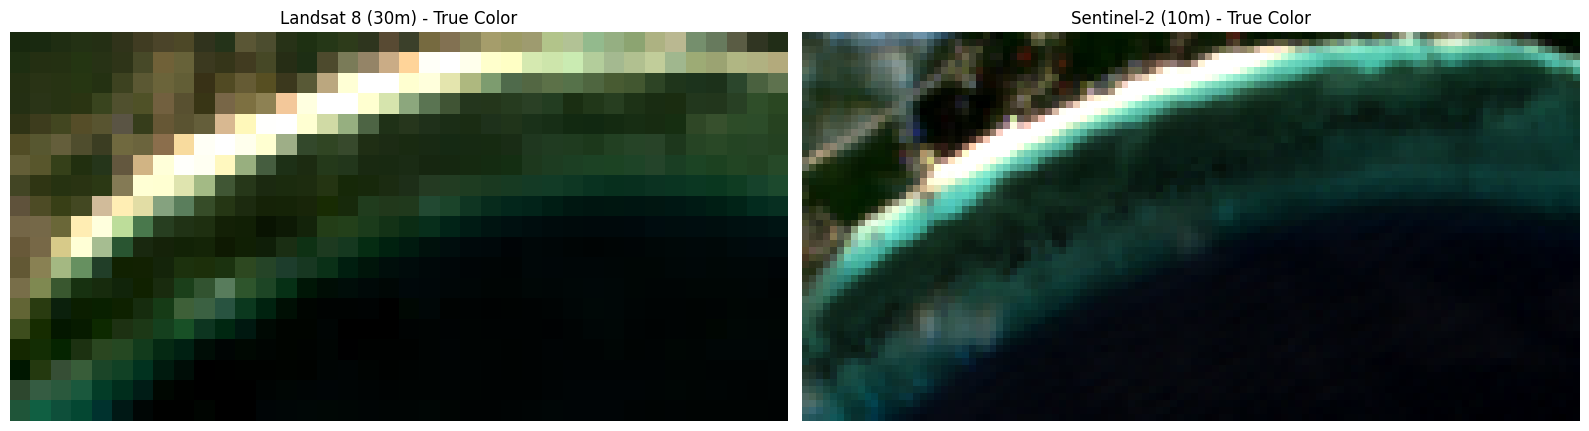

Plot selesai.


In [3]:
#import data yang dibutuhkan
#Tampilkan Citra Kompositnya
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show # Fungsi khusus untuk plot raster
import warnings
import numpy as np

print("Pustaka siap.")
print(f"Versi NumPy: {np.__version__}")
print(f"Versi Rasterio: {rasterio.__version__}")

# Matikan peringatan yang tidak penting dari rasterio
warnings.filterwarnings('ignore', category=rasterio.errors.NotGeoreferencedWarning)

# =================================================================
# 2. Tentukan Path (Lokasi File)
# =================================================================
# File TIF ada di folder yang sama dengan notebook
path_tif_l8 = "Landsat8_BaraBulukumba_2023_JulSep_Full_Area.tif"
path_tif_s2 = "Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif"

print(f"Membuka {path_tif_l8}")
print(f"Membuka {path_tif_s2}")

# =================================================================
# 3. Buka File TIF dan Buat Plot
# =================================================================

# Kita akan membuka file menggunakan 'with' agar file otomatis tertutup
try:
    with rasterio.open(path_tif_l8) as l8_dataset:
        with rasterio.open(path_tif_s2) as s2_dataset:
            
            # Buat 2 petak plot (1 baris, 2 kolom)
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
            
            # --- Plot 1: Landsat 8 ---
            # Tampilkan band 4 (Red), 3 (Green), 2 (Blue)
            print("Memplot Landsat 8...")
            
            # Baca band yang diinginkan
            l8_red = l8_dataset.read(4)
            l8_green = l8_dataset.read(3) 
            l8_blue = l8_dataset.read(2)
            
            # Stack band menjadi RGB
            l8_rgb = np.dstack((l8_red, l8_green, l8_blue))
            
            # Normalisasi untuk tampilan yang lebih baik
            l8_rgb_normalized = np.clip(l8_rgb / 0.3, 0, 1)
            
            # Tampilkan citra
            ax1.imshow(l8_rgb_normalized)
            ax1.set_title("Landsat 8 (30m) - True Color")
            ax1.axis('off')
            
            # --- Plot 2: Sentinel-2 ---
            # Tampilkan band 4 (Red), 3 (Green), 2 (Blue)
            print("Memplot Sentinel-2...")
            
            # Baca band yang diinginkan
            s2_red = s2_dataset.read(4)
            s2_green = s2_dataset.read(3)
            s2_blue = s2_dataset.read(2)
            
            # Stack band menjadi RGB
            s2_rgb = np.dstack((s2_red, s2_green, s2_blue))
            
            # DEBUG: Print nilai untuk Sentinel-2
            print(f"Sentinel-2 min: {s2_rgb.min()}, max: {s2_rgb.max()}")
            print(f"Sentinel-2 shape: {s2_rgb.shape}")
            
            # Auto-scaling dengan percentiles untuk Sentinel-2
            p2, p98 = np.percentile(s2_rgb, (2, 98))
            s2_rgb_normalized = np.clip((s2_rgb - p2) / (p98 - p2), 0, 1)
            
            # Atau coba dengan nilai vmax yang lebih kecil
            # s2_rgb_normalized = np.clip(s2_rgb / 2000, 0, 1)  # Coba nilai lebih kecil
            
            # Tampilkan citra
            ax2.imshow(s2_rgb_normalized)
            ax2.set_title("Sentinel-2 (10m) - True Color")
            ax2.axis('off')
            
            plt.tight_layout() # Merapikan tata letak
            plt.show() # Tampilkan plot di bawah sel

except Exception as e:
    print(f"ERROR: Terjadi kesalahan. Periksa nama file Anda.")
    print(e)

print("Plot selesai.")

## ANALISIS PIXEL CITRA LANDSAT 8 DAN SENTINEL-2

ANALISIS PIXEL CITRA LANDSAT 8 DAN SENTINEL-2
Memulai analisis...

ANALISIS LANDSAT 8
------------------------------
Dimensi: 38 x 19 pixel
Jumlah Band: 17
Pixel per Band: 722
Total Pixel Semua Band: 12274

INFORMASI SETIAP BAND:
Band 1:
 - Tipe data: float32
 - Nilai min/max: 0.0000, 0.2751
 - Nilai rata-rata: 0.0321
 - Pixel valid: 722 dari 722
 - Persentase valid: 100.0%
 - Resolusi: (0.00026949458523585647, 0.00026949458523585647)
 - CRS: EPSG:4326
Band 2:
 - Tipe data: float32
 - Nilai min/max: 0.0000, 0.3277
 - Nilai rata-rata: 0.0463
 - Pixel valid: 722 dari 722
 - Persentase valid: 100.0%
 - Resolusi: (0.00026949458523585647, 0.00026949458523585647)
 - CRS: EPSG:4326
Band 3:
 - Tipe data: float32
 - Nilai min/max: 0.0000, 0.4198
 - Nilai rata-rata: 0.0722
 - Pixel valid: 722 dari 722
 - Persentase valid: 100.0%
 - Resolusi: (0.00026949458523585647, 0.00026949458523585647)
 - CRS: EPSG:4326
Band 4:
 - Tipe data: float32
 - Nilai min/max: 0.0000, 0.4820
 - Nilai rata-rata: 0.0585

C:\Users\ACER\AppData\Local\Temp\ipykernel_8852\3185658758.py:43: RuntimeWarning: All-NaN slice encountered
  'Min': np.nanmin(data),
C:\Users\ACER\AppData\Local\Temp\ipykernel_8852\3185658758.py:44: RuntimeWarning: All-NaN slice encountered
  'Max': np.nanmax(data),
C:\Users\ACER\AppData\Local\Temp\ipykernel_8852\3185658758.py:45: RuntimeWarning: Mean of empty slice
  'Rata2': np.nanmean(data),


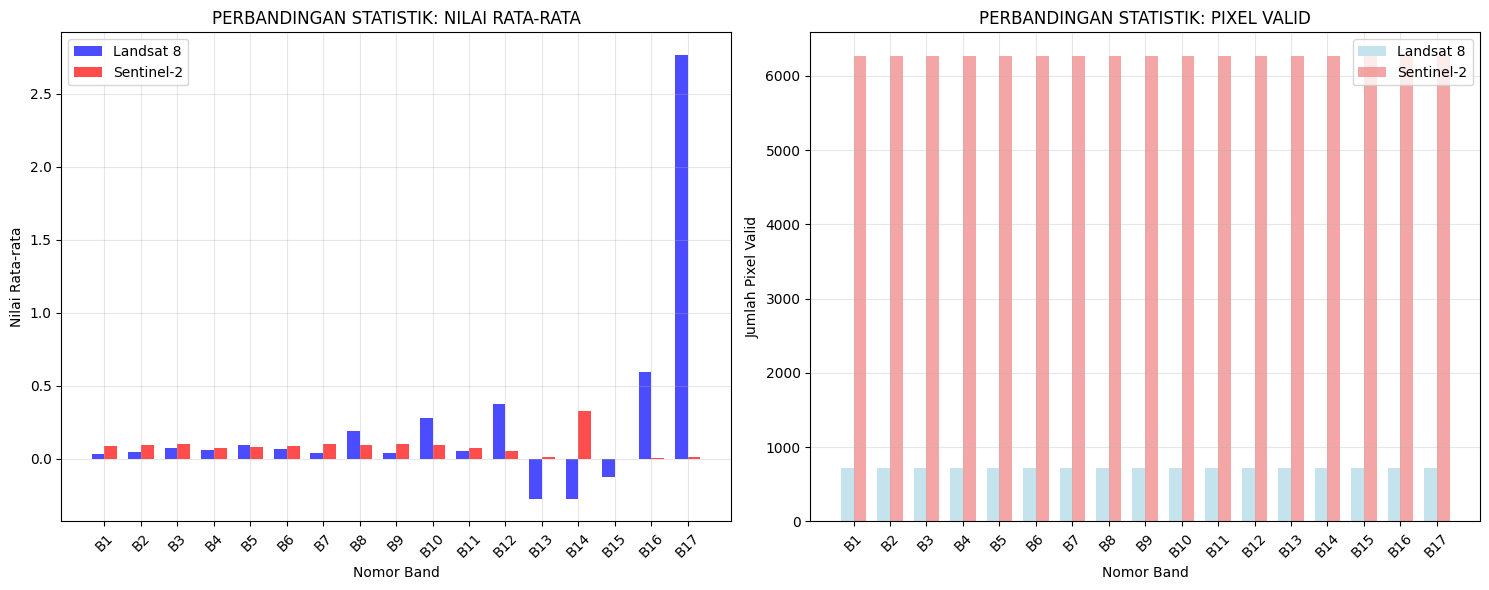

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

print("ANALISIS PIXEL CITRA LANDSAT 8 DAN SENTINEL-2")
print("=" * 50)

# Path file (Pastikan path ini benar di komputer Anda)
path_tif_l8 = "Landsat8_BaraBulukumba_2023_JulSep_Full_Area.tif"
path_tif_s2 = "Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif"

def analisis_sederhana(file_path, nama_citra):
    """Analisis sederhana untuk satu citra"""
    try:
        with rasterio.open(file_path) as src:
            print(f"\nANALISIS {nama_citra.upper()}")
            print("-" * 30)
            
            # Informasi dasar
            print(f"Dimensi: {src.width} x {src.height} pixel")
            print(f"Jumlah Band: {src.count}")
            
            # Hitung pixel
            pixel_per_band = src.width * src.height
            total_pixel = pixel_per_band * src.count
            
            print(f"Pixel per Band: {pixel_per_band}")
            print(f"Total Pixel Semua Band: {total_pixel}")
            
            # Informasi setiap band
            print(f"\nINFORMASI SETIAP BAND:")
            band_info = []
            
            for band in range(1, src.count + 1):
                data = src.read(band)
                
                # Menggunakan np.nan... untuk data float (Surface Reflectance 0-1)
                # Asumsi NoData value adalah NaN
                valid_pixels = np.count_nonzero(~np.isnan(data))
                
                info = {
                    'Band': band,
                    'Min': np.nanmin(data),
                    'Max': np.nanmax(data), 
                    'Rata2': np.nanmean(data),
                    'Pixel_Valid': valid_pixels,
                    'Persen_Valid': (valid_pixels / data.size) * 100
                }
                band_info.append(info)
                
                print(f"Band {band}:")
                print(f" - Tipe data: {src.dtypes[band-1]}")
                print(f" - Nilai min/max: {info['Min']:.4f}, {info['Max']:.4f}")
                print(f" - Nilai rata-rata: {info['Rata2']:.4f}")
                print(f" - Pixel valid: {info['Pixel_Valid']} dari {data.size}")
                print(f" - Persentase valid: {info['Persen_Valid']:.1f}%")
                print(f" - Resolusi: {src.res}")
                print(f" - CRS: {src.crs}")
            
            return band_info, pixel_per_band, total_pixel
            
    except Exception as e:
        print(f"Error: {e}")
        return None, 0, 0

def buat_plot_statistik_band(band_l8, band_s2):
    """
    Buat bar chart perbandingan STATISTIK (Rata-rata & Jml Piksel Valid)
    (Ini adalah fungsi 'buat_histogram_sederhana' Anda sebelumnya, diganti nama)
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Data untuk plot
    num_bands_compare = len(band_l8)
    bands = [f'B{info["Band"]}' for info in band_l8]
    mean_l8 = [info['Rata2'] for info in band_l8]
    # Hanya ambil N band pertama dari S2 untuk perbandingan
    mean_s2 = [info['Rata2'] for info in band_s2[:num_bands_compare]]
    
    valid_l8 = [info['Pixel_Valid'] for info in band_l8]
    valid_s2 = [info['Pixel_Valid'] for info in band_s2[:num_bands_compare]]
    
    # Plot 1: Perbandingan Nilai Rata-rata
    x_pos = np.arange(len(bands))
    width = 0.35
    
    ax1.bar(x_pos - width/2, mean_l8, width, label='Landsat 8', alpha=0.7, color='blue')
    ax1.bar(x_pos + width/2, mean_s2, width, label='Sentinel-2', alpha=0.7, color='red')
    ax1.set_xlabel('Nomor Band')
    ax1.set_ylabel('Nilai Rata-rata')
    ax1.set_title('PERBANDINGAN STATISTIK: NILAI RATA-RATA')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(bands, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Perbandingan Pixel Valid
    ax2.bar(x_pos - width/2, valid_l8, width, label='Landsat 8', alpha=0.7, color='lightblue')
    ax2.bar(x_pos + width/2, valid_s2, width, label='Sentinel-2', alpha=0.7, color='lightcoral')
    ax2.set_xlabel('Nomor Band')
    ax2.set_ylabel('Jumlah Pixel Valid')
    ax2.set_title('PERBANDINGAN STATISTIK: PIXEL VALID')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(bands, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ANALISIS KEDUA CITRA
print("Memulai analisis...")

# Analisis Landsat 8
band_l8, pixel_per_band_l8, total_l8 = analisis_sederhana(path_tif_l8, "Landsat 8")

# Analisis Sentinel-2
band_s2, pixel_per_band_s2, total_s2 = analisis_sederhana(path_tif_s2, "Sentinel-2")

# PERBANDINGAN
if band_l8 and band_s2:
    print("\n" + "="*50)
    print("PERBANDINGAN LANDSAT 8 vs SENTINEL-2")
    print("="*50)
    
    print(f"\n{'METRIK':<25} {'LANDSAT 8':<15} {'SENTINEL-2':<15} {'RASIO':<10}")
    print("-" * 65)
    
    rasio_dimensi = pixel_per_band_s2 / pixel_per_band_l8
    rasio_band = len(band_s2) / len(band_l8)
    rasio_total = total_s2 / total_l8
    
    print(f"{'Dimensi (width x height)':<25} {f'{pixel_per_band_l8}':<15} {f'{pixel_per_band_s2}':<15} {rasio_dimensi:.2f}x")
    print(f"{'Jumlah Band':<25} {len(band_l8):<15} {len(band_s2):<15} {rasio_band:.2f}x")
    print(f"{'Total Pixel Semua Band':<25} {total_l8:<15} {total_s2:<15} {rasio_total:.2f}x")
    
    # TAMPILKAN PLOT STATISTIK (RATA-RATA, JUMLAH PIKSEL)
    print("\nMenampilkan plot perbandingan statistik (rata-rata)...")
    buat_plot_statistik_band(band_l8, band_s2)

else:
    print("\nGagal menganalisis salah satu citra. Periksa file path.")

## Analisis Nilai Reflektan di Citra Landsat

In [5]:
import rasterio
import pandas as pd
import numpy as np

# =================================================================
# 1. KONFIGURASI FILE
# =================================================================
file_path = "Landsat8_BaraBulukumba_2023_JulSep_Full_Area.tif"
output_excel = "Landsat_Klasifikasi_Negatif_Positif.xlsx"

# Mapping Band (Judul Kolom : Index Band)
bands_info = {
    'Blue (Band 2)': 2,
    'Green (Band 3)': 3,
    'Red (Band 4)': 4,
    'NIR (Band 5)': 5
}

# =================================================================
# 2. EKSTRAK DATA & TAMPILKAN DIMENSI
# =================================================================
print(f"Membaca file: {file_path}")

try:
    with rasterio.open(file_path) as src:
        rows, cols = src.height, src.width
        total_pixels = rows * cols
        
        # --- INI BAGIAN YANG ANDA MINTA ---
        print("\n" + "="*40)
        print("INFORMASI DIMENSI CITRA")
        print("="*40)
        print(f"Dimensi      : {cols} x {rows} pixel")
        print(f"Jumlah Band  : {src.count}")
        print(f"Total Pixel  : {total_pixels}")
        print("="*40 + "\n")
        # ----------------------------------

        # Siapkan data dasar
        data = {
            'ID_Pixel': range(1, total_pixels + 1),
            'Baris_Y': np.repeat(np.arange(rows), cols),
            'Kolom_X': np.tile(np.arange(cols), rows)
        }

        # Ambil data per band
        for nama_kolom, idx in bands_info.items():
            # Baca data dan flatten
            data[nama_kolom] = src.read(idx).flatten()

        # Buat DataFrame
        df = pd.DataFrame(data)

        # =================================================================
        # 3. LOGIKA KATEGORI (NEGATIF vs POSITIF)
        # =================================================================
        print("Sedang melakukan kategorisasi pixel...")
        
        # Daftar kolom band yang akan dicek
        kolom_band = list(bands_info.keys())
        
        # LOGIKA: Cek apakah ada nilai < 0 di kolom band manapun dalam satu baris
        # .any(axis=1) akan bernilai True jika minimal ada satu yang memenuhi syarat
        ada_nilai_negatif = (df[kolom_band] < 0).any(axis=1)
        
        # Terapkan label
        df['Kategori'] = np.where(ada_nilai_negatif, 'Negatif', 'Positif')

        # =================================================================
        # 4. PREVIEW HASIL & STATISTIK
        # =================================================================
        print("\n" + "="*80)
        print("PREVIEW 10 DATA PERTAMA")
        print("="*80)
        
        # Pengaturan tampilan agar rapi
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 1000)
        pd.set_option('display.float_format', '{:.6f}'.format) # Format angka desimal
        
        print(df.head(10).to_string(index=False))
        
        # Hitung Ringkasan
        jml_negatif = df[df['Kategori'] == 'Negatif'].shape[0]
        jml_positif = df[df['Kategori'] == 'Positif'].shape[0]
        persen_negatif = (jml_negatif / total_pixels) * 100
        
        print("-" * 80)
        print(f"RINGKASAN KATEGORI DARI TOTAL {total_pixels} PIXEL:")
        print(f" > Kategori Negatif (Ada nilai minus) : {jml_negatif} pixel ({persen_negatif:.1f}%)")
        print(f" > Kategori Positif (Semua aman)      : {jml_positif} pixel ({100-persen_negatif:.1f}%)")
        print("="*80)

        # =================================================================
        # 5. SIMPAN KE EXCEL
        # =================================================================
        print(f"\nMenyimpan data ke Excel: {output_excel}...")
        df.to_excel(output_excel, index=False)
        print("SELESAI. File Excel siap dibuka.")

except Exception as e:
    print(f"Terjadi Error: {e}")

Membaca file: Landsat8_BaraBulukumba_2023_JulSep_Full_Area.tif

INFORMASI DIMENSI CITRA
Dimensi      : 38 x 19 pixel
Jumlah Band  : 17
Total Pixel  : 722

Sedang melakukan kategorisasi pixel...

PREVIEW 10 DATA PERTAMA
 ID_Pixel  Baris_Y  Kolom_X  Blue (Band 2)  Green (Band 3)  Red (Band 4)  NIR (Band 5) Kategori
        1        0        0       0.017608        0.048078      0.028443      0.376235  Positif
        2        0        1       0.018900        0.049342      0.030422      0.372055  Positif
        3        0        2       0.021196        0.053578      0.037023      0.375039  Positif
        4        0        3       0.024166        0.058527      0.041491      0.370378  Positif
        5        0        4       0.024166        0.056025      0.043086      0.336044  Positif
        6        0        5       0.030684        0.061085      0.057166      0.332648  Positif
        7        0        6       0.040597        0.071535      0.076224      0.328426  Positif
        8    

## Citra Dari Reflektan Landsat

Membaca file: Landsat8_BaraBulukumba_2023_JulSep_Full_Area.tif...
Dimensi: 38 x 19 pixel
Menampilkan Peta True Color dengan Masking Negatif...


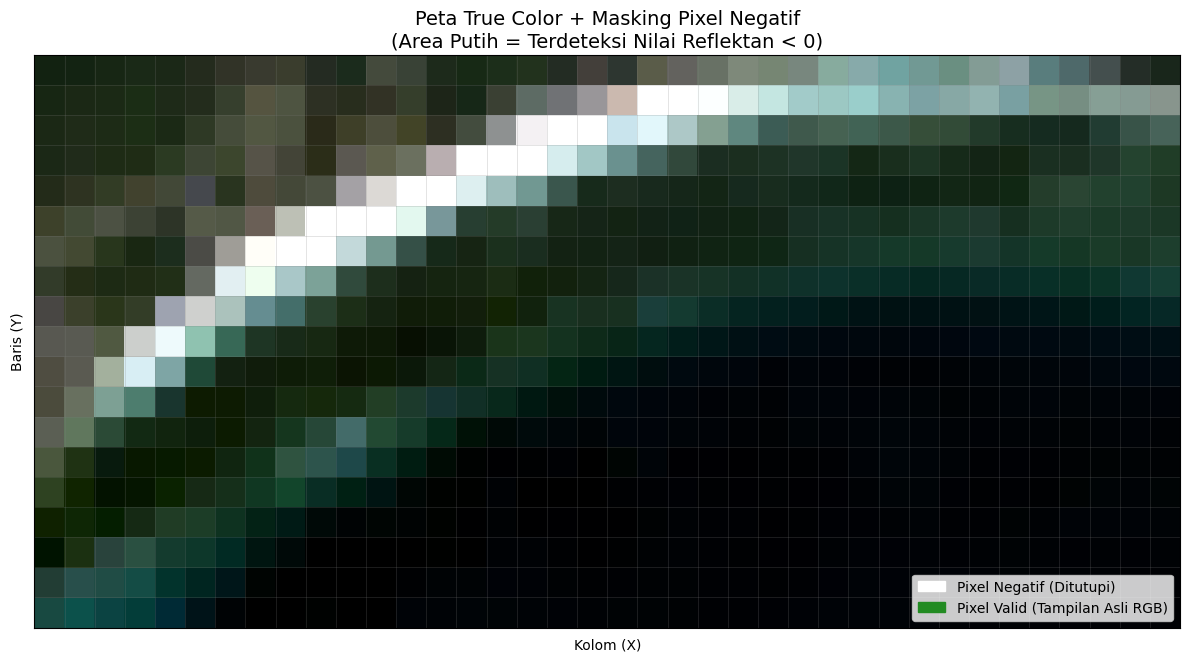

INFO STATISTIK:
 > Pixel Ditampilkan Asli (RGB) : 722 pixel
 > Pixel Diputihkan (Negatif)   : 0 pixel


In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# =================================================================
# 1. KONFIGURASI
# =================================================================
file_path = "Landsat8_BaraBulukumba_2023_JulSep_Full_Area.tif"

# Index Band untuk Pengecekan Negatif (Blue, Green, Red, NIR)
bands_check = [2, 3, 4, 5] 

# Index Band untuk Tampilan RGB (Red, Green, Blue)
# Landsat 8 RGB = 4, 3, 2
rgb_bands = [4, 3, 2]

# =================================================================
# 2. FUNGSI NORMALISASI RGB
# =================================================================
def normalize(array):
    """Normalisasi data ke 0-1 dengan contrast stretching"""
    # Ubah data < 0 menjadi 0 dulu agar statistik warna tidak rusak
    array_clean = np.where(array < 0, 0, array)
    
    # Ambil percentile 2% dan 98% (biar gambar cerah & kontras)
    p2, p98 = np.percentile(array_clean, (2, 98))
    
    # Rumus Min-Max Scaling
    if p98 - p2 == 0: return array_clean # Hindari pembagian nol
    normalized = (array_clean - p2) / (p98 - p2)
    
    # Kunci di 0-1
    return np.clip(normalized, 0, 1)

# =================================================================
# 3. PROSES DATA
# =================================================================
print(f"Membaca file: {file_path}...")

try:
    with rasterio.open(file_path) as src:
        rows, cols = src.height, src.width
        print(f"Dimensi: {cols} x {rows} pixel")

        # --- A. DETEKSI PIXEL NEGATIF ---
        # Baca 4 band utama
        data_check = src.read(bands_check)
        # Cek mana yang minus (Boolean Mask)
        # Hasil: True jika ada salah satu band yang < 0
        mask_negatif = np.any(data_check < 0, axis=0)
        
        # --- B. BUAT CITRA RGB (TRUE COLOR) ---
        red = src.read(4)
        green = src.read(3)
        blue = src.read(2)
        
        # Tumpuk dan Normalisasi per band
        rgb_image = np.dstack((
            normalize(red), 
            normalize(green), 
            normalize(blue)
        ))
        
        # --- C. TERAPKAN MASKING PUTIH ---
        # Di mana mask_negatif == True, ubah warnanya jadi PUTIH [1, 1, 1]
        # Kita copy dulu agar data asli tidak hilang
        final_image = rgb_image.copy()
        final_image[mask_negatif] = [1.0, 1.0, 1.0]

        # =================================================================
        # 4. VISUALISASI
        # =================================================================
        print("Menampilkan Peta True Color dengan Masking Negatif...")
        plt.figure(figsize=(12, 7))
        
        # Tampilkan
        plt.imshow(final_image, interpolation='nearest')
        
        # Dekorasi Peta
        plt.title(f"Peta True Color + Masking Pixel Negatif\n(Area Putih = Terdeteksi Nilai Reflektan < 0)", fontsize=14)
        plt.xlabel("Kolom (X)")
        plt.ylabel("Baris (Y)")
        
        # Grid Pixel
        plt.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
        plt.xticks(np.arange(-0.5, cols, 1), labels=[])
        plt.yticks(np.arange(-0.5, rows, 1), labels=[])
        plt.tick_params(which='both', length=0)

        # Legenda
        white_patch = mpatches.Patch(color='white', label='Pixel Negatif (Ditutupi)')
        color_patch = mpatches.Patch(color='forestgreen', label='Pixel Valid (Tampilan Asli RGB)')
        plt.legend(handles=[white_patch, color_patch], loc='lower right')

        plt.tight_layout()
        plt.show()
        
        # Statistik
        count_neg = np.sum(mask_negatif)
        total = rows * cols
        print(f"INFO STATISTIK:")
        print(f" > Pixel Ditampilkan Asli (RGB) : {total - count_neg} pixel")
        print(f" > Pixel Diputihkan (Negatif)   : {count_neg} pixel")

except Exception as e:
    print(f"Error: {e}")

## Analisis Nilai Reflektan di Citra Sentinel

In [7]:
import rasterio
import pandas as pd
import numpy as np

# =================================================================
# 1. KONFIGURASI FILE SENTINEL
# =================================================================
# Pastikan nama file sesuai dengan file Sentinel Anda
file_path = "Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif"
output_excel = "Sentinel2_Klasifikasi_Negatif_Positif.xlsx"

# Mapping Band Khusus Sentinel-2
# Perhatikan: NIR menggunakan Band 8
bands_info = {
    'Blue (Band 2)': 2,
    'Green (Band 3)': 3,
    'Red (Band 4)': 4,
    'NIR (Band 8)': 8
}

# =================================================================
# 2. EKSTRAK DATA & TAMPILKAN DIMENSI
# =================================================================
print(f"Membaca file Sentinel-2: {file_path}")

try:
    with rasterio.open(file_path) as src:
        rows, cols = src.height, src.width
        total_pixels = rows * cols
        
        # --- INFORMASI DIMENSI (Sesuai Permintaan) ---
        print("\n" + "="*40)
        print("INFORMASI DIMENSI CITRA SENTINEL-2")
        print("="*40)
        print(f"Dimensi      : {cols} x {rows} pixel")
        print(f"Jumlah Band  : {src.count}")
        print(f"Total Pixel  : {total_pixels}")
        print("="*40 + "\n")
        # ---------------------------------------------

        # Siapkan data dasar
        data = {
            'ID_Pixel': range(1, total_pixels + 1),
            'Baris_Y': np.repeat(np.arange(rows), cols),
            'Kolom_X': np.tile(np.arange(cols), rows)
        }

        # Ambil data per band
        for nama_kolom, idx in bands_info.items():
            # Coba baca band (handling jika band 8 tidak ditemukan di index ke-8)
            try:
                data[nama_kolom] = src.read(idx).flatten()
            except IndexError:
                print(f"⚠️ Warning: Band {idx} tidak ditemukan. Mengisi dengan 0.")
                data[nama_kolom] = np.zeros(total_pixels)

        # Buat DataFrame
        df = pd.DataFrame(data)

        # =================================================================
        # 3. LOGIKA KATEGORI (NEGATIF vs POSITIF)
        # =================================================================
        print("Sedang melakukan kategorisasi pixel...")
        
        # Daftar kolom band yang akan dicek
        kolom_band = list(bands_info.keys())
        
        # LOGIKA: Cek apakah ada nilai < 0 di kolom band manapun
        # .any(axis=1) -> True jika salah satu band bernilai negatif
        ada_nilai_negatif = (df[kolom_band] < 0).any(axis=1)
        
        # Terapkan label
        df['Kategori'] = np.where(ada_nilai_negatif, 'Negatif', 'Positif')

        # =================================================================
        # 4. PREVIEW HASIL & STATISTIK
        # =================================================================
        print("\n" + "="*80)
        print("PREVIEW 10 DATA PERTAMA (SENTINEL-2)")
        print("="*80)
        
        # Pengaturan tampilan agar rapi
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 1000)
        pd.set_option('display.float_format', '{:.6f}'.format) 
        
        print(df.head(10).to_string(index=False))
        
        # Hitung Ringkasan
        jml_negatif = df[df['Kategori'] == 'Negatif'].shape[0]
        jml_positif = df[df['Kategori'] == 'Positif'].shape[0]
        persen_negatif = (jml_negatif / total_pixels) * 100
        
        print("-" * 80)
        print(f"RINGKASAN KATEGORI DARI TOTAL {total_pixels} PIXEL:")
        print(f" > Kategori Negatif (Ada nilai minus) : {jml_negatif} pixel ({persen_negatif:.1f}%)")
        print(f" > Kategori Positif (Semua aman)      : {jml_positif} pixel ({100-persen_negatif:.1f}%)")
        print("="*80)

        # =================================================================
        # 5. SIMPAN KE EXCEL
        # =================================================================
        print(f"\nMenyimpan data ke Excel: {output_excel}...")
        df.to_excel(output_excel, index=False)
        print("SELESAI. File Excel Sentinel siap dibuka.")

except Exception as e:
    print(f"Terjadi Error: {e}")

Membaca file Sentinel-2: Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif

INFORMASI DIMENSI CITRA SENTINEL-2
Dimensi      : 112 x 56 pixel
Jumlah Band  : 36
Total Pixel  : 6272

Sedang melakukan kategorisasi pixel...

PREVIEW 10 DATA PERTAMA (SENTINEL-2)
 ID_Pixel  Baris_Y  Kolom_X  Blue (Band 2)  Green (Band 3)  Red (Band 4)  NIR (Band 8) Kategori
        1        0        0       0.087550        0.104400      0.081150      0.327200  Positif
        2        0        1       0.102800        0.113900      0.084900      0.337400  Positif
        3        0        2       0.122600        0.125200      0.096200      0.345000  Positif
        4        0        3       0.157500        0.167000      0.137300      0.336200  Positif
        5        0        4       0.223100        0.202500      0.150100      0.337000  Positif
        6        0        5       0.213700        0.186900      0.132300      0.329400  Positif
        7        0        6       0.195000        0.178900      0.143100

## Citra Reflektan Sentinel

Membaca file Sentinel-2: Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif...
Dimensi Citra: 112 x 56 pixel (High Resolution)
Menampilkan Peta Sentinel-2...


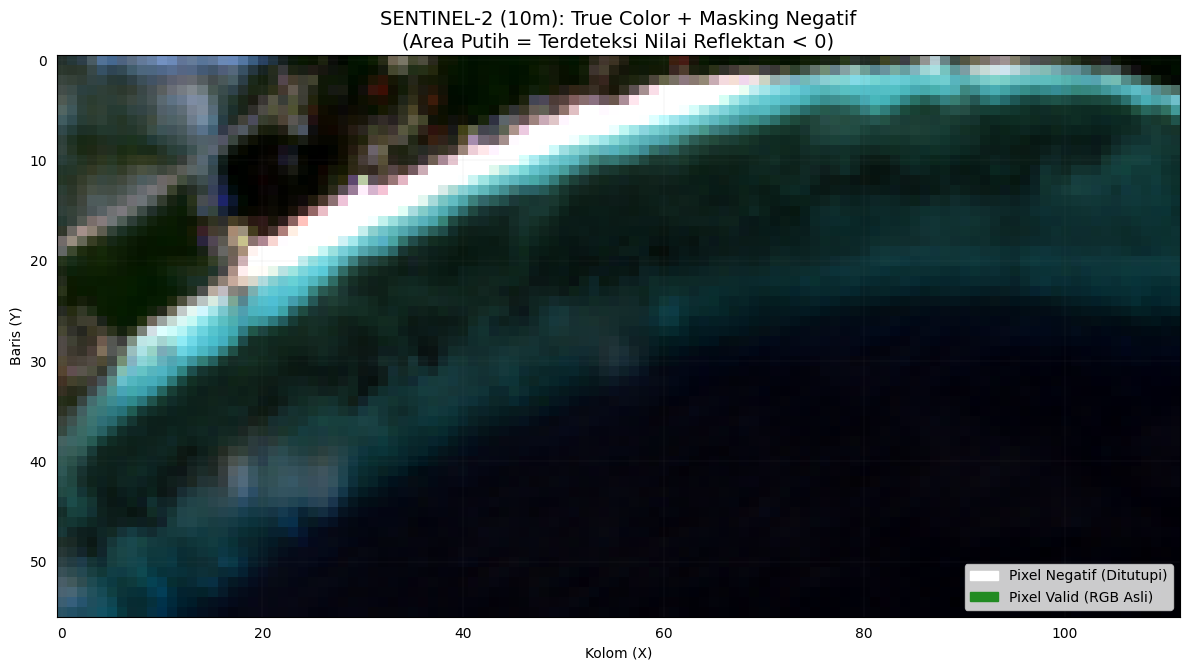

INFO STATISTIK SENTINEL-2:
 > Total Pixel              : 6272
 > Pixel Valid (RGB)        : 6272 (100.0%)
 > Pixel Diputihkan (Negatif) : 0 (0.0%)


In [23]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# =================================================================
# 1. KONFIGURASI SENTINEL-2
# =================================================================
# Pastikan nama file ini benar
file_path = "Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif"

# Index Band untuk Pengecekan Negatif (Blue, Green, Red, NIR)
# PERHATIAN: Sentinel-2 menggunakan Band 8 untuk NIR
bands_check = [2, 3, 4, 8] 

# Index Band untuk Tampilan RGB (Red, Green, Blue)
# Sentinel-2 RGB = 4, 3, 2
rgb_bands = [4, 3, 2]

# =================================================================
# 2. FUNGSI NORMALISASI RGB (Sama seperti sebelumnya)
# =================================================================
def normalize(array):
    """Normalisasi data ke 0-1 dengan contrast stretching"""
    # Ubah data < 0 menjadi 0 dulu
    array_clean = np.where(array < 0, 0, array)
    
    # Ambil percentile 2% dan 98%
    p2, p98 = np.percentile(array_clean, (2, 98))
    
    # Rumus Min-Max Scaling
    if p98 - p2 == 0: return array_clean
    normalized = (array_clean - p2) / (p98 - p2)
    
    return np.clip(normalized, 0, 1)

# =================================================================
# 3. PROSES DATA
# =================================================================
print(f"Membaca file Sentinel-2: {file_path}...")

try:
    with rasterio.open(file_path) as src:
        rows, cols = src.height, src.width
        print(f"Dimensi Citra: {cols} x {rows} pixel (High Resolution)")

        # --- A. DETEKSI PIXEL NEGATIF ---
        # Baca 4 band utama (termasuk Band 8)
        try:
            data_check = src.read(bands_check)
        except IndexError:
            print("⚠️ Error: Band 8 tidak ditemukan. Menggunakan band standar 1-4 untuk cek.")
            data_check = src.read([1, 2, 3, 4]) # Fallback jika file tidak lengkap

        # Cek mana yang minus (Boolean Mask)
        # True jika ada salah satu band (Blue/Green/Red/NIR) yang < 0
        mask_negatif = np.any(data_check < 0, axis=0)
        
        # --- B. BUAT CITRA RGB (TRUE COLOR) ---
        red = src.read(4)
        green = src.read(3)
        blue = src.read(2)
        
        # Tumpuk dan Normalisasi
        rgb_image = np.dstack((
            normalize(red), 
            normalize(green), 
            normalize(blue)
        ))
        
        # --- C. TERAPKAN MASKING PUTIH ---
        # Copy citra asli
        final_image = rgb_image.copy()
        # Timpa area negatif dengan warna PUTIH [1, 1, 1]
        final_image[mask_negatif] = [1.0, 1.0, 1.0]

        # =================================================================
        # 4. VISUALISASI
        # =================================================================
        print("Menampilkan Peta Sentinel-2...")
        plt.figure(figsize=(12, 7))
        
        # Tampilkan
        # interpolation='nearest' menjaga ketajaman pixel kotak-kotak
        plt.imshow(final_image, interpolation='nearest')
        
        # Dekorasi Peta
        plt.title(f"SENTINEL-2 (10m): True Color + Masking Negatif\n(Area Putih = Terdeteksi Nilai Reflektan < 0)", fontsize=14)
        plt.xlabel("Kolom (X)")
        plt.ylabel("Baris (Y)")
        
        # Grid Pixel (Dibuat lebih tipis karena pixel Sentinel lebih rapat)
        plt.grid(which='major', color='gray', linestyle='-', linewidth=0.2, alpha=0.3)
        plt.tick_params(which='both', bottom=False, left=False, labelbottom=True, labelleft=True)

        # Legenda
        white_patch = mpatches.Patch(color='white', label='Pixel Negatif (Ditutupi)')
        color_patch = mpatches.Patch(color='forestgreen', label='Pixel Valid (RGB Asli)')
        plt.legend(handles=[white_patch, color_patch], loc='lower right')

        plt.tight_layout()
        plt.show()
        
        # Statistik
        count_neg = np.sum(mask_negatif)
        total = rows * cols
        print(f"INFO STATISTIK SENTINEL-2:")
        print(f" > Total Pixel              : {total}")
        print(f" > Pixel Valid (RGB)        : {total - count_neg} ({((total-count_neg)/total)*100:.1f}%)")
        print(f" > Pixel Diputihkan (Negatif) : {count_neg} ({count_neg/total*100:.1f}%)")

except Exception as e:
    print(f"Error: {e}")

## Label Pixel Untuk Landsat

PELABELAN PIXEL LANDSAT 8 (722 PIXEL) DENGAN HISTOGRAM DAN SCATTER PLOT
Memulai proses pelabelan dengan visualisasi lengkap...
MEMBUKA FILE LANDSAT 8...
Dimensi citra: 38 x 19 pixel
Total pixel: 722 pixel
Jumlah band: 17

MEMBUKA DATA SHAPEFILE LAMUN...
Jumlah feature/polygon lamun: 198

MEMBUAT MASK LAMUN...

MEMBACA BAND UNTUK VISUALISASI...

MEMBUAT DATAFRAME UNTUK ANALISIS...

STATISTIK 722 PIXEL:
Pixel Lamun: 26 (3.60%)
Pixel Non-Lamun: 696 (96.40%)

MENAMPILKAN VISUALISASI LENGKAP


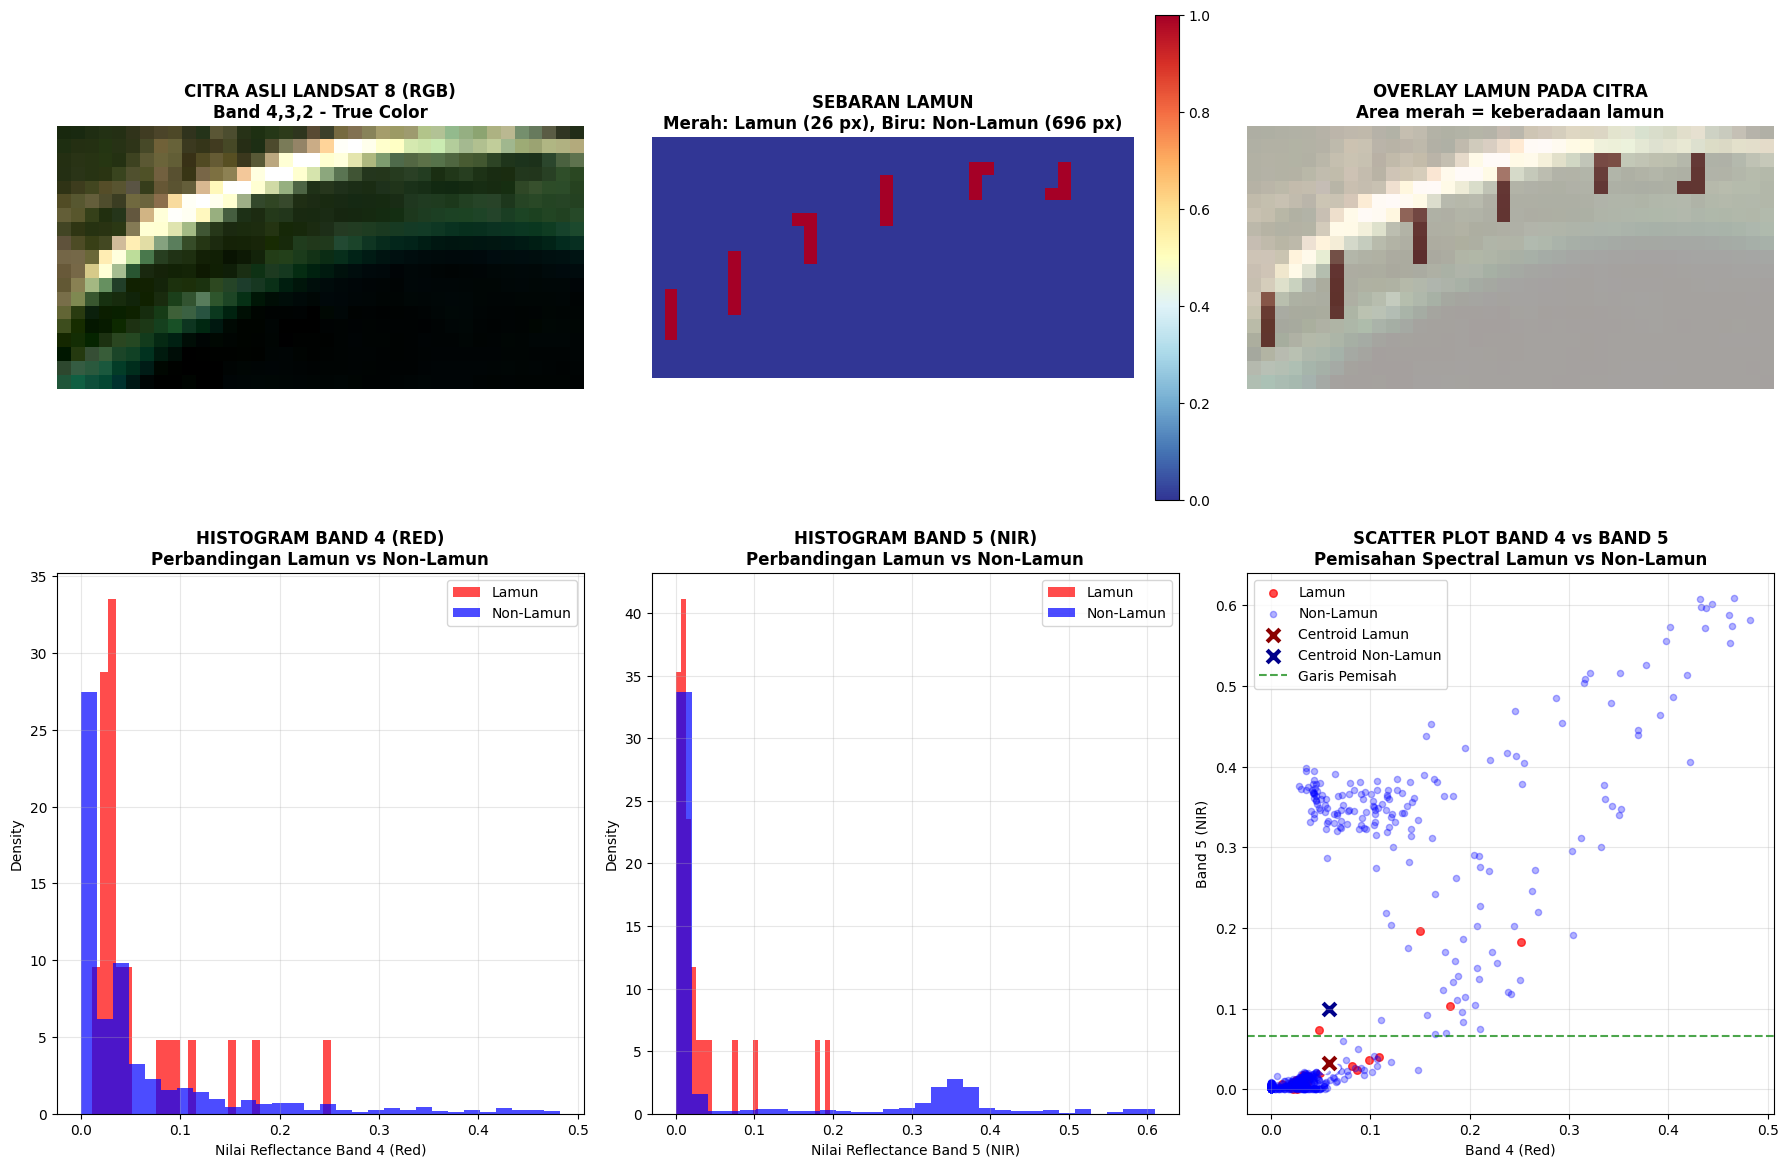


STATISTIK LANJUTAN

RATA-RATA REFLECTANCE:
Band       Lamun      Non-Lamun  Selisih   
---------------------------------------------
Band_1     0.0276     0.0323     -0.0047   
Band_2     0.0428     0.0464     -0.0036   
Band_3     0.0818     0.0718     0.0100    
Band_4     0.0586     0.0585     0.0001    
Band_5     0.0330     0.0996     -0.0666   

MENYIMPAN KE FILE CSV...
✅ Data 722 pixel disimpan sebagai: dataset_722_pixel_lamun.csv

PROSES BERHASIL!
VISUALISASI YANG DITAMPILKAN:
1. Citra asli Landsat 8 (RGB)
2. Peta sebaran lamun (binary mask)
3. Overlay lamun pada citra
4. Histogram Band 4 (Red) - Lamun vs Non-Lamun
5. Histogram Band 5 (NIR) - Lamun vs Non-Lamun
6. Scatter plot Band 4 vs Band 5 dengan centroid

✅ Dataset 722 pixel tersimpan sebagai 'dataset_722_pixel_lamun.csv'
   Siap untuk analisis lebih lanjut dan training model!


In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from rasterio import features
import os

print("PELABELAN PIXEL LANDSAT 8 (722 PIXEL) DENGAN HISTOGRAM DAN SCATTER PLOT")
print("=" * 70)

# Path file
path_tif_l8 = "Landsat8_BaraBulukumba_2023_JulSep_Full_Area.tif"
path_shp_lamun = "SHP Lamun/Data_Lamun.shp"

def label_722_pixel_dengan_visualisasi(raster_path, shapefile_path):
    """Label 722 pixel Landsat 8 dengan visualisasi lengkap"""
    
    try:
        # Baca data raster Landsat 8
        with rasterio.open(raster_path) as src:
            print("MEMBUKA FILE LANDSAT 8...")
            print(f"Dimensi citra: {src.width} x {src.height} pixel")
            print(f"Total pixel: {src.width * src.height} pixel")
            print(f"Jumlah band: {src.count}")
            
            # Baca data shapefile lamun
            print("\nMEMBUKA DATA SHAPEFILE LAMUN...")
            gdf_lamun = gpd.read_file(shapefile_path)
            print(f"Jumlah feature/polygon lamun: {len(gdf_lamun)}")
            
            # Pastikan CRS sama
            if gdf_lamun.crs != src.crs:
                print("Mengkonversi CRS shapefile ke CRS raster...")
                gdf_lamun = gdf_lamun.to_crs(src.crs)
            
            # Buat mask lamun dari shapefile
            print("\nMEMBUAT MASK LAMUN...")
            lamun_mask = features.rasterize(
                [(geometry, 1) for geometry in gdf_lamun.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            # Baca band untuk visualisasi
            print("\nMEMBACA BAND UNTUK VISUALISASI...")
            # Band untuk RGB (4=Red, 3=Green, 2=Blue)
            red = src.read(4)
            green = src.read(3)
            blue = src.read(2)
            rgb = np.dstack((red, green, blue))
            rgb_normalized = np.clip(rgb / 0.3, 0, 1)
            
            # Band untuk analisis
            band1 = src.read(1)  # Coastal aerosol
            band2 = src.read(2)  # Blue
            band3 = src.read(3)  # Green
            band4 = src.read(4)  # Red
            band5 = src.read(5)  # NIR
            
            # BUAT DATAFRAME UNTUK 722 PIXEL
            print("\nMEMBUAT DATAFRAME UNTUK ANALISIS...")
            
            height, width = src.shape
            csv_data = []
            
            for row in range(height):
                for col in range(width):
                    pixel_data = {
                        'Pixel_ID': row * width + col + 1,
                        'Row': row,
                        'Col': col,
                        'Band_1': float(band1[row, col]),
                        'Band_2': float(band2[row, col]),
                        'Band_3': float(band3[row, col]),
                        'Band_4': float(band4[row, col]),
                        'Band_5': float(band5[row, col]),
                        'Label': int(lamun_mask[row, col]),
                        'Kategori': 'Lamun' if lamun_mask[row, col] == 1 else 'Non_Lamun'
                    }
                    csv_data.append(pixel_data)
            
            df = pd.DataFrame(csv_data)
            
            # Hitung statistik
            total_pixels = len(df)
            lamun_pixels = len(df[df['Label'] == 1])
            non_lamun_pixels = len(df[df['Label'] == 0])
            
            print(f"\nSTATISTIK 722 PIXEL:")
            print(f"Pixel Lamun: {lamun_pixels} ({lamun_pixels/total_pixels*100:.2f}%)")
            print(f"Pixel Non-Lamun: {non_lamun_pixels} ({non_lamun_pixels/total_pixels*100:.2f}%)")
            
            # VISUALISASI LENGKAP
            print("\n" + "="*50)
            print("MENAMPILKAN VISUALISASI LENGKAP")
            print("="*50)
            
            # Buat figure dengan 2 baris dan 3 kolom
            fig = plt.figure(figsize=(18, 12))
            
            # Baris 1: Citra dan overlay
            # Plot 1: Citra asli RGB
            ax1 = plt.subplot(2, 3, 1)
            ax1.imshow(rgb_normalized)
            ax1.set_title('CITRA ASLI LANDSAT 8 (RGB)\nBand 4,3,2 - True Color', fontweight='bold')
            ax1.axis('off')
            
            # Plot 2: Mask lamun
            ax2 = plt.subplot(2, 3, 2)
            im2 = ax2.imshow(lamun_mask, cmap='RdYlBu_r')
            ax2.set_title(f'SEBARAN LAMUN\nMerah: Lamun ({lamun_pixels} px), Biru: Non-Lamun ({non_lamun_pixels} px)', 
                         fontweight='bold')
            ax2.axis('off')
            # Tambah colorbar
            plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
            
            # Plot 3: Overlay lamun pada citra
            ax3 = plt.subplot(2, 3, 3)
            ax3.imshow(rgb_normalized, alpha=0.7)
            ax3.imshow(lamun_mask, cmap='Reds', alpha=0.5)
            ax3.set_title('OVERLAY LAMUN PADA CITRA\nArea merah = keberadaan lamun', fontweight='bold')
            ax3.axis('off')
            
            # Baris 2: Histogram dan Scatter Plot
            # Plot 4: Histogram Band 4 (Red) - Lamun vs Non-Lamun
            ax4 = plt.subplot(2, 3, 4)
            band4_lamun = df[df['Label'] == 1]['Band_4']
            band4_non_lamun = df[df['Label'] == 0]['Band_4']
            
            ax4.hist(band4_lamun, bins=30, alpha=0.7, label='Lamun', color='red', density=True)
            ax4.hist(band4_non_lamun, bins=30, alpha=0.7, label='Non-Lamun', color='blue', density=True)
            ax4.set_xlabel('Nilai Reflectance Band 4 (Red)')
            ax4.set_ylabel('Density')
            ax4.set_title('HISTOGRAM BAND 4 (RED)\nPerbandingan Lamun vs Non-Lamun', fontweight='bold')
            ax4.legend()
            ax4.grid(True, alpha=0.3)
            
            # Plot 5: Histogram Band 5 (NIR) - Lamun vs Non-Lamun
            ax5 = plt.subplot(2, 3, 5)
            band5_lamun = df[df['Label'] == 1]['Band_5']
            band5_non_lamun = df[df['Label'] == 0]['Band_5']
            
            ax5.hist(band5_lamun, bins=30, alpha=0.7, label='Lamun', color='red', density=True)
            ax5.hist(band5_non_lamun, bins=30, alpha=0.7, label='Non-Lamun', color='blue', density=True)
            ax5.set_xlabel('Nilai Reflectance Band 5 (NIR)')
            ax5.set_ylabel('Density')
            ax5.set_title('HISTOGRAM BAND 5 (NIR)\nPerbandingan Lamun vs Non-Lamun', fontweight='bold')
            ax5.legend()
            ax5.grid(True, alpha=0.3)
            
            # Plot 6: Scatter Plot Band 4 vs Band 5
            ax6 = plt.subplot(2, 3, 6)
            
            # Plot dengan warna berbeda untuk masing-masing kategori
            scatter_lamun = ax6.scatter(df[df['Label'] == 1]['Band_4'], 
                                      df[df['Label'] == 1]['Band_5'], 
                                      c='red', alpha=0.7, s=30, label='Lamun')
            scatter_non_lamun = ax6.scatter(df[df['Label'] == 0]['Band_4'], 
                                          df[df['Label'] == 0]['Band_5'], 
                                          c='blue', alpha=0.3, s=20, label='Non-Lamun')
            
            ax6.set_xlabel('Band 4 (Red)')
            ax6.set_ylabel('Band 5 (NIR)')
            ax6.set_title('SCATTER PLOT BAND 4 vs BAND 5\nPemisahan Spectral Lamun vs Non-Lamun', fontweight='bold')
            ax6.legend()
            ax6.grid(True, alpha=0.3)
            
            # Hitung dan tampilkan centroid untuk masing-masing kelas
            centroid_lamun_x = df[df['Label'] == 1]['Band_4'].mean()
            centroid_lamun_y = df[df['Label'] == 1]['Band_5'].mean()
            centroid_non_lamun_x = df[df['Label'] == 0]['Band_4'].mean()
            centroid_non_lamun_y = df[df['Label'] == 0]['Band_5'].mean()
            
            ax6.scatter(centroid_lamun_x, centroid_lamun_y, c='darkred', s=200, 
                       marker='X', edgecolors='white', linewidth=2, label='Centroid Lamun')
            ax6.scatter(centroid_non_lamun_x, centroid_non_lamun_y, c='darkblue', s=200, 
                       marker='X', edgecolors='white', linewidth=2, label='Centroid Non-Lamun')
            
            # Tambah garis pemisah (sederhana)
            x_vals = np.array(ax6.get_xlim())
            y_vals = (centroid_lamun_y + centroid_non_lamun_y) / 2
            ax6.axhline(y=y_vals, color='green', linestyle='--', alpha=0.7, 
                       label='Garis Pemisah')
            
            ax6.legend()
            
            plt.tight_layout()
            plt.show()
            
            # TAMPILKAN STATISTIK LANJUTAN
            print("\n" + "="*50)
            print("STATISTIK LANJUTAN")
            print("="*50)
            
            print("\nRATA-RATA REFLECTANCE:")
            print(f"{'Band':<10} {'Lamun':<10} {'Non-Lamun':<10} {'Selisih':<10}")
            print("-" * 45)
            for band in ['Band_1', 'Band_2', 'Band_3', 'Band_4', 'Band_5']:
                mean_lamun = df[df['Label'] == 1][band].mean()
                mean_non_lamun = df[df['Label'] == 0][band].mean()
                selisih = mean_lamun - mean_non_lamun
                print(f"{band:<10} {mean_lamun:<10.4f} {mean_non_lamun:<10.4f} {selisih:<10.4f}")
            
            # SIMPAN KE CSV
            print("\nMENYIMPAN KE FILE CSV...")
            csv_filename = 'dataset_722_pixel_lamun.csv'
            df.to_csv(csv_filename, index=False)
            print(f"✅ Data 722 pixel disimpan sebagai: {csv_filename}")
            
            return df, lamun_mask
            
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# JALANKAN PROGRAM
print("Memulai proses pelabelan dengan visualisasi lengkap...")
df_result, mask_result = label_722_pixel_dengan_visualisasi(path_tif_l8, path_shp_lamun)

if df_result is not None:
    print("\n" + "="*70)
    print("PROSES BERHASIL!")
    print("="*70)
    print("VISUALISASI YANG DITAMPILKAN:")
    print("1. Citra asli Landsat 8 (RGB)")
    print("2. Peta sebaran lamun (binary mask)") 
    print("3. Overlay lamun pada citra")
    print("4. Histogram Band 4 (Red) - Lamun vs Non-Lamun")
    print("5. Histogram Band 5 (NIR) - Lamun vs Non-Lamun")
    print("6. Scatter plot Band 4 vs Band 5 dengan centroid")
    
    print(f"\n✅ Dataset 722 pixel tersimpan sebagai 'dataset_722_pixel_lamun.csv'")
    print("   Siap untuk analisis lebih lanjut dan training model!")
    
else:
    print("\n❌ Gagal melakukan proses.")

## Label Pixel Sentinel

ANALISIS LAMUN - 6272 PIXEL SENTINEL-2
Memulai analisis lamun...
MEMBUKA FILE SENTINEL-2...
Dimensi citra: 112 x 56 pixel
Total pixel: 6272 pixel
Jumlah band: 36

MEMBUKA DATA SHAPEFILE LAMUN...
Jumlah feature/polygon lamun: 198

MEMBUAT MASK LAMUN...

MEMBACA BAND UNTUK VISUALISASI...

MEMBUAT DATAFRAME UNTUK 6272 PIXEL...

STATISTIK 6272 PIXEL:
Pixel Lamun: 85 (1.36%)
Pixel Non-Lamun: 6187 (98.64%)

MENAMPILKAN VISUALISASI LENGKAP


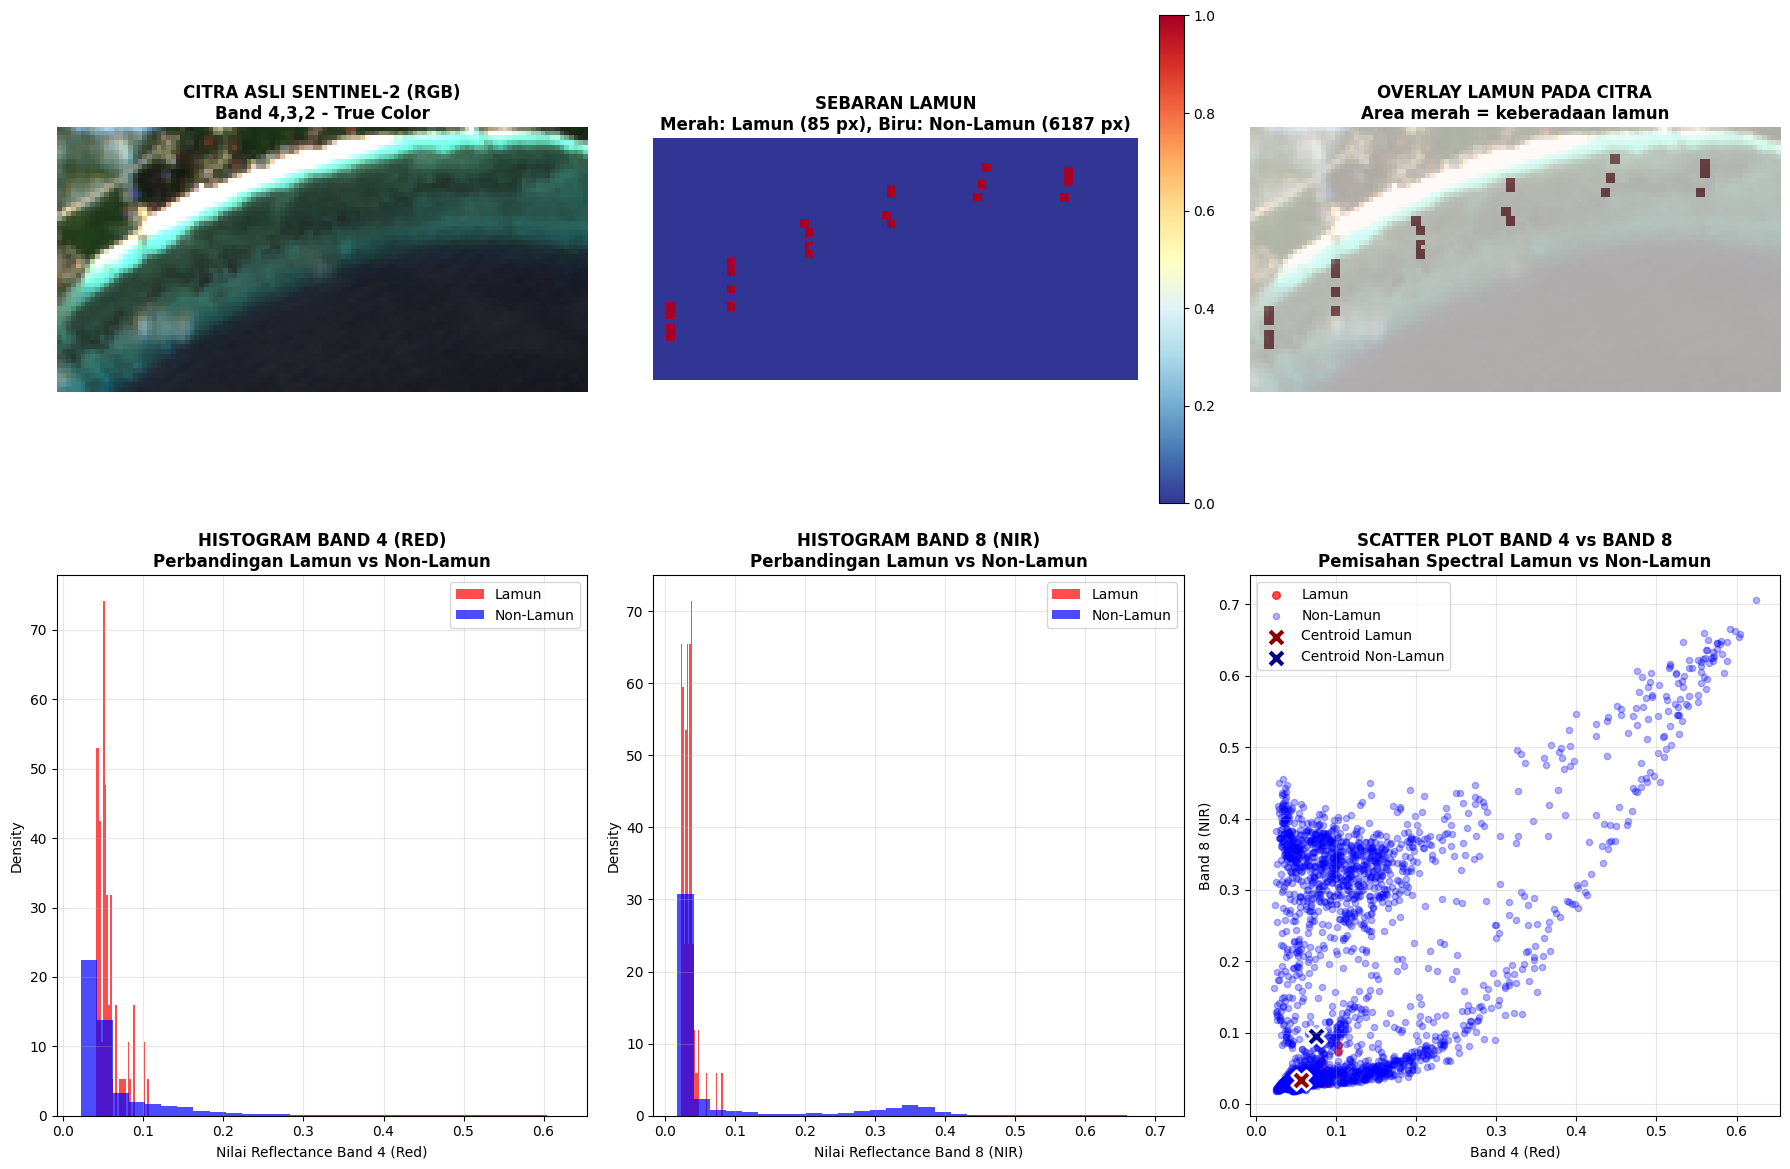


STATISTIK LANJUTAN

RATA-RATA REFLECTANCE:
Band       Lamun      Non-Lamun  Selisih   
---------------------------------------------
Band_2     0.0774     0.0926     -0.0152   
Band_3     0.0937     0.1016     -0.0080   
Band_4     0.0556     0.0742     -0.0186   
Band_8     0.0339     0.0949     -0.0610   

MENYIMPAN KE FILE CSV...
✅ Data 6272 pixel disimpan sebagai: dataset_6272_pixel_lamun_sentinel.csv

ANALISIS LAMUN SELESAI!
Output: dataset_6272_pixel_lamun_sentinel.csv
Visualisasi: 6 plot analisis lengkap

✅ ANALISIS LAMUN BERHASIL!
   File output: dataset_6272_pixel_lamun_sentinel.csv


In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from rasterio import features
import os

print("ANALISIS LAMUN - 6272 PIXEL SENTINEL-2")
print("=" * 60)

# Path file
path_tif_s2 = "Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif"
path_shp_lamun = "SHP Lamun/Data_Lamun.shp"

def analisis_lamun_saja(raster_path, shapefile_path):
    """Analisis 6272 pixel Sentinel-2 untuk kelas Lamun vs Non-Lamun"""
    
    try:
        # Baca data raster Sentinel-2
        with rasterio.open(raster_path) as src:
            print("MEMBUKA FILE SENTINEL-2...")
            print(f"Dimensi citra: {src.width} x {src.height} pixel")
            print(f"Total pixel: {src.width * src.height} pixel")
            print(f"Jumlah band: {src.count}")
            
            # Baca data shapefile lamun
            print("\nMEMBUKA DATA SHAPEFILE LAMUN...")
            gdf_lamun = gpd.read_file(shapefile_path)
            print(f"Jumlah feature/polygon lamun: {len(gdf_lamun)}")
            
            # Pastikan CRS sama
            if gdf_lamun.crs != src.crs:
                print("Mengkonversi CRS shapefile ke CRS raster...")
                gdf_lamun = gdf_lamun.to_crs(src.crs)
            
            # Buat mask lamun dari shapefile
            print("\nMEMBUAT MASK LAMUN...")
            lamun_mask = features.rasterize(
                [(geometry, 1) for geometry in gdf_lamun.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            # Baca band untuk visualisasi
            print("\nMEMBACA BAND UNTUK VISUALISASI...")
            # Sentinel-2 RGB: B4 (Red), B3 (Green), B2 (Blue)
            red = src.read(4)
            green = src.read(3)
            blue = src.read(2)
            rgb = np.dstack((red, green, blue))
            rgb_normalized = np.clip(rgb / 0.3, 0, 1)
            
            # Band untuk analisis
            band2 = src.read(2)  # Blue
            band3 = src.read(3)  # Green
            band4 = src.read(4)  # Red
            band8 = src.read(8)  # NIR (10m)
            
            # BUAT DATAFRAME UNTUK 6272 PIXEL
            print("\nMEMBUAT DATAFRAME UNTUK 6272 PIXEL...")
            
            height, width = src.shape
            csv_data = []
            
            for row in range(height):
                for col in range(width):
                    pixel_data = {
                        'Pixel_ID': row * width + col + 1,
                        'Row': row,
                        'Col': col,
                        'Band_2': float(band2[row, col]),
                        'Band_3': float(band3[row, col]),
                        'Band_4': float(band4[row, col]),
                        'Band_8': float(band8[row, col]),
                        'Label': int(lamun_mask[row, col]),
                        'Kategori': 'Lamun' if lamun_mask[row, col] == 1 else 'Non_Lamun'
                    }
                    csv_data.append(pixel_data)
            
            df = pd.DataFrame(csv_data)
            
            # Hitung statistik
            total_pixels = len(df)
            lamun_pixels = len(df[df['Label'] == 1])
            non_lamun_pixels = len(df[df['Label'] == 0])
            
            print(f"\nSTATISTIK 6272 PIXEL:")
            print(f"Pixel Lamun: {lamun_pixels} ({lamun_pixels/total_pixels*100:.2f}%)")
            print(f"Pixel Non-Lamun: {non_lamun_pixels} ({non_lamun_pixels/total_pixels*100:.2f}%)")
            
            # VISUALISASI LENGKAP
            print("\n" + "="*50)
            print("MENAMPILKAN VISUALISASI LENGKAP")
            print("="*50)
            
            fig = plt.figure(figsize=(18, 12))
            
            # Baris 1: Citra dan overlay
            ax1 = plt.subplot(2, 3, 1)
            ax1.imshow(rgb_normalized)
            ax1.set_title('CITRA ASLI SENTINEL-2 (RGB)\nBand 4,3,2 - True Color', fontweight='bold', fontsize=12)
            ax1.axis('off')
            
            ax2 = plt.subplot(2, 3, 2)
            im2 = ax2.imshow(lamun_mask, cmap='RdYlBu_r')
            ax2.set_title(f'SEBARAN LAMUN\nMerah: Lamun ({lamun_pixels} px), Biru: Non-Lamun ({non_lamun_pixels} px)',
                         fontweight='bold', fontsize=12)
            ax2.axis('off')
            plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
            
            ax3 = plt.subplot(2, 3, 3)
            ax3.imshow(rgb_normalized, alpha=0.7)
            ax3.imshow(lamun_mask, cmap='Reds', alpha=0.5)
            ax3.set_title('OVERLAY LAMUN PADA CITRA\nArea merah = keberadaan lamun', fontweight='bold', fontsize=12)
            ax3.axis('off')
            
            # Baris 2: Histogram dan Scatter Plot
            ax4 = plt.subplot(2, 3, 4)
            band4_lamun = df[df['Label'] == 1]['Band_4']
            band4_non_lamun = df[df['Label'] == 0]['Band_4']
            
            ax4.hist(band4_lamun, bins=30, alpha=0.7, label='Lamun', color='red', density=True)
            ax4.hist(band4_non_lamun, bins=30, alpha=0.7, label='Non-Lamun', color='blue', density=True)
            ax4.set_xlabel('Nilai Reflectance Band 4 (Red)')
            ax4.set_ylabel('Density')
            ax4.set_title('HISTOGRAM BAND 4 (RED)\nPerbandingan Lamun vs Non-Lamun', fontweight='bold', fontsize=12)
            ax4.legend()
            ax4.grid(True, alpha=0.3)
            
            ax5 = plt.subplot(2, 3, 5)
            band8_lamun = df[df['Label'] == 1]['Band_8']
            band8_non_lamun = df[df['Label'] == 0]['Band_8']
            
            ax5.hist(band8_lamun, bins=30, alpha=0.7, label='Lamun', color='red', density=True)
            ax5.hist(band8_non_lamun, bins=30, alpha=0.7, label='Non-Lamun', color='blue', density=True)
            ax5.set_xlabel('Nilai Reflectance Band 8 (NIR)')
            ax5.set_ylabel('Density')
            ax5.set_title('HISTOGRAM BAND 8 (NIR)\nPerbandingan Lamun vs Non-Lamun', fontweight='bold', fontsize=12)
            ax5.legend()
            ax5.grid(True, alpha=0.3)
            
            ax6 = plt.subplot(2, 3, 6)
            
            # Plot dengan warna berbeda untuk masing-masing kategori
            scatter_lamun = ax6.scatter(df[df['Label'] == 1]['Band_4'], 
                                      df[df['Label'] == 1]['Band_8'], 
                                      c='red', alpha=0.7, s=30, label='Lamun')
            scatter_non_lamun = ax6.scatter(df[df['Label'] == 0]['Band_4'], 
                                          df[df['Label'] == 0]['Band_8'], 
                                          c='blue', alpha=0.3, s=20, label='Non-Lamun')
            
            ax6.set_xlabel('Band 4 (Red)')
            ax6.set_ylabel('Band 8 (NIR)')
            ax6.set_title('SCATTER PLOT BAND 4 vs BAND 8\nPemisahan Spectral Lamun vs Non-Lamun', fontweight='bold', fontsize=12)
            ax6.legend()
            ax6.grid(True, alpha=0.3)
            
            # Hitung dan tampilkan centroid untuk masing-masing kelas
            centroid_lamun_x = df[df['Label'] == 1]['Band_4'].mean()
            centroid_lamun_y = df[df['Label'] == 1]['Band_8'].mean()
            centroid_non_lamun_x = df[df['Label'] == 0]['Band_4'].mean()
            centroid_non_lamun_y = df[df['Label'] == 0]['Band_8'].mean()
            
            ax6.scatter(centroid_lamun_x, centroid_lamun_y, c='darkred', s=200, 
                       marker='X', edgecolors='white', linewidth=2, label='Centroid Lamun')
            ax6.scatter(centroid_non_lamun_x, centroid_non_lamun_y, c='darkblue', s=200, 
                       marker='X', edgecolors='white', linewidth=2, label='Centroid Non-Lamun')
            
            ax6.legend()
            
            plt.tight_layout()
            plt.show()
            
            # TAMPILKAN STATISTIK LANJUTAN
            print("\n" + "="*50)
            print("STATISTIK LANJUTAN")
            print("="*50)
            
            print("\nRATA-RATA REFLECTANCE:")
            print(f"{'Band':<10} {'Lamun':<10} {'Non-Lamun':<10} {'Selisih':<10}")
            print("-" * 45)
            for band in ['Band_2', 'Band_3', 'Band_4', 'Band_8']:
                mean_lamun = df[df['Label'] == 1][band].mean()
                mean_non_lamun = df[df['Label'] == 0][band].mean()
                selisih = mean_lamun - mean_non_lamun
                print(f"{band:<10} {mean_lamun:<10.4f} {mean_non_lamun:<10.4f} {selisih:<10.4f}")
            
            # SIMPAN KE CSV
            print("\nMENYIMPAN KE FILE CSV...")
            csv_filename = 'dataset_6272_pixel_lamun_sentinel.csv'
            df.to_csv(csv_filename, index=False)
            print(f"✅ Data 6272 pixel disimpan sebagai: {csv_filename}")
            
            print("\n" + "="*60)
            print("ANALISIS LAMUN SELESAI!")
            print("="*60)
            print("Output: dataset_6272_pixel_lamun_sentinel.csv")
            print("Visualisasi: 6 plot analisis lengkap")
            
            return df
            
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        return None

# JALANKAN SCRIPT 1
if __name__ == "__main__":
    print("Memulai analisis lamun...")
    df_result = analisis_lamun_saja(path_tif_s2, path_shp_lamun)
    
    if df_result is not None:
        print("\n✅ ANALISIS LAMUN BERHASIL!")
        print("   File output: dataset_6272_pixel_lamun_sentinel.csv")
    else:
        print("\n❌ Analisis lamun gagal.")

## Random Sampling Sentinel

SAMPLING DATASET SEIMBANG - SENTINEL-2
Memulai sampling dataset seimbang dengan area kanan bawah 48%...
MEMBUKA FILE SENTINEL-2...
Dimensi citra: 112 x 56 pixel

MEMBUKA DATA SHAPEFILE...
Jumlah polygon lamun: 198
Jumlah polygon pasir: 54
Jumlah polygon coral: 18

MEMBUAT MASK UNTUK MASING-MASING KELAS...

MEMBACA BAND UNTUK VISUALISASI...

MENGUMPULKAN PIXEL UNTUK SAMPLING...
AREA SAMPLING KANAN BAWAH 48%:
  - Kolom: 58 sampai 112 (48% paling kanan)
  - Baris: 29 sampai 56 (48% paling bawah)
  - Total area: 1458 pixel

PIXEL TERKUMPUL:
Lamun: 85
Pasir: 17
Coral: 4
Perairan Kanan Bawah: 1458
Perairan Lain: 4708

MEMBUAT DATASET SEIMBANG (85 per kelas)...
✅ Sampled Lamun: 85 pixel
✅ Pasir + Coral: 21 pixel
⚠️  Butuh tambahan 64 pixel dari Perairan
✅ Diambil 64 pixel dari perairan kanan bawah
✅ Pixel perairan kanan bawah yang terpilih: 64

MENAMPILKAN VISUALISASI SAMPLING KANAN BAWAH


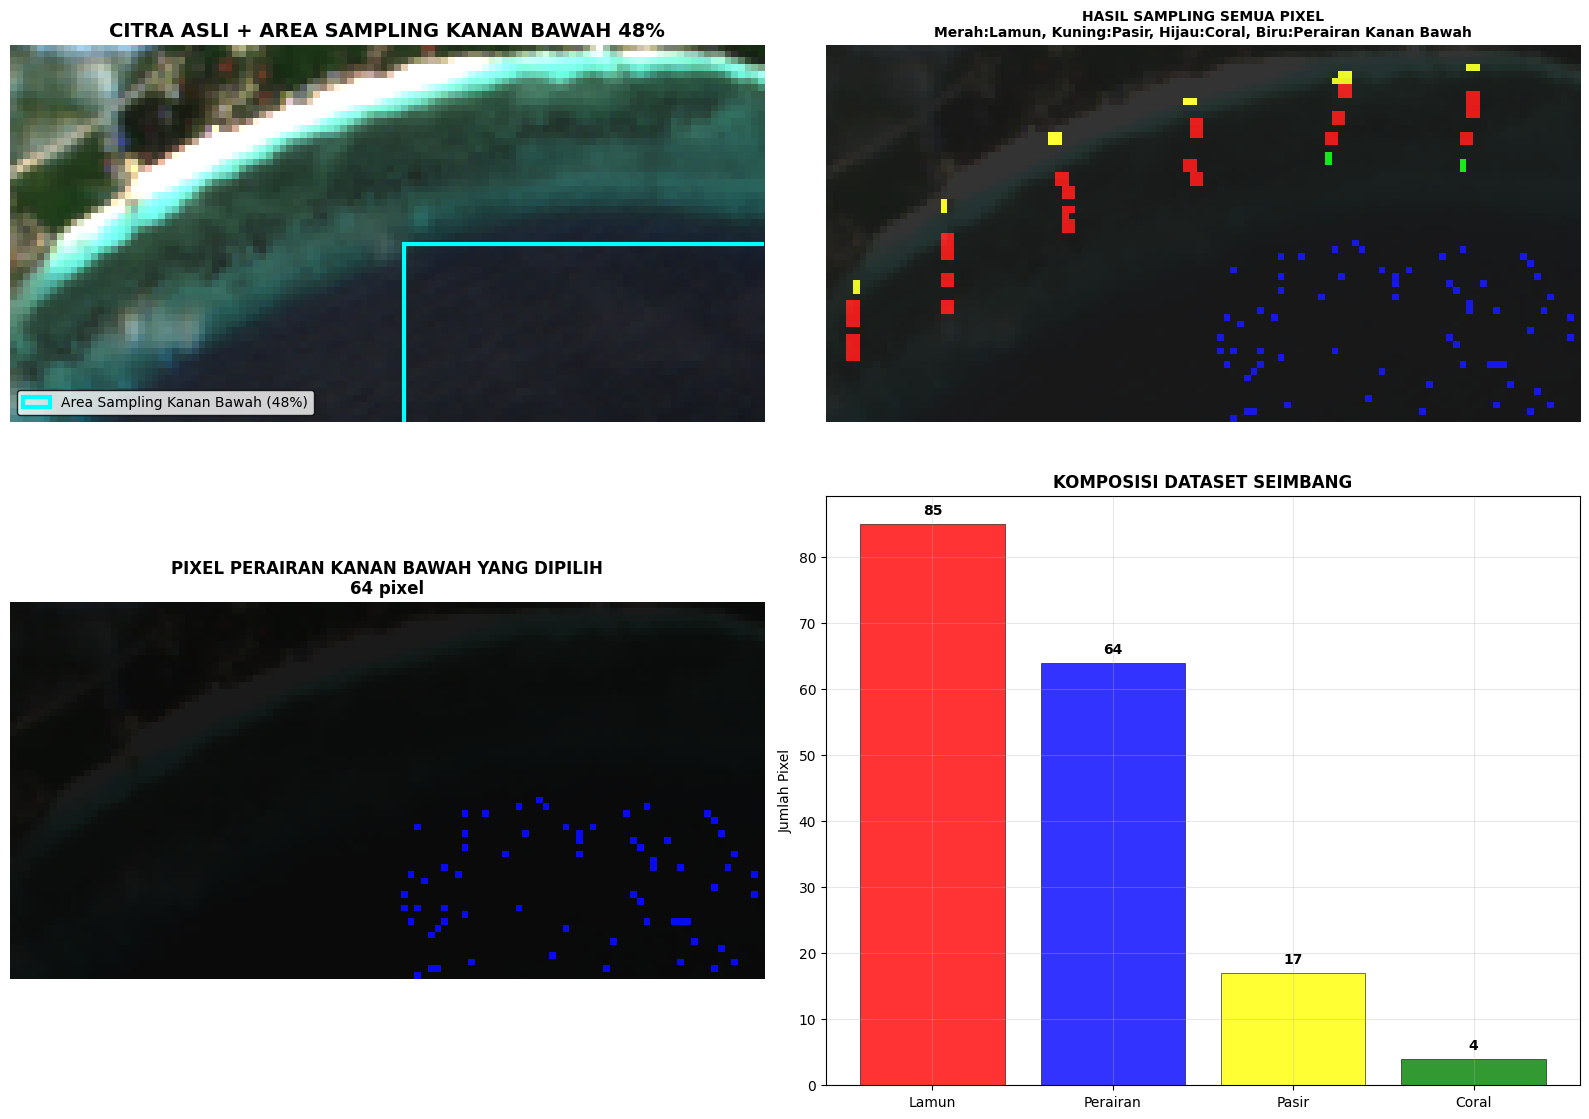


STATISTIK AKHIR DATASET SEIMBANG
TOTAL DATASET: 170 pixel
├── Lamun: 85 pixel
└── Non-Lamun: 85 pixel
    ├── Pasir: 17 pixel
    ├── Coral: 4 pixel
    └── Perairan: 64 pixel
        └── Dari area kanan bawah 48%: 64 pixel

MENYIMPAN DATASET...
✅ Dataset seimbang disimpan sebagai: dataset_seimbang_170_pixel.csv
✅ Pixel kanan bawah yang dipilih disimpan sebagai: pixel_kanan_bawah_yang_dipilih.csv

SAMPLING DATASET SEIMBANG SELESAI!
Output: dataset_seimbang_170_pixel.csv
Visualisasi: 4 plot sampling detail dengan background terang

✅ SAMPLING BERHASIL!
   Dataset seimbang: 170 pixel
   Pixel perairan kanan bawah yang dipilih: 64 pixel


In [16]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from rasterio import features
import random
import matplotlib.patches as mpatches

# Set style untuk background terang
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

print("SAMPLING DATASET SEIMBANG - SENTINEL-2")
print("=" * 60)

# Path file
path_tif_s2 = "Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif"
path_shp_lamun = "SHP Lamun/Data_Lamun.shp"
path_shp_pasir = "SHP Pasir/Pasir.shp"
path_shp_coral = "SHP Koral/coral.shp"

def sampling_dataset_seimbang_kanan_bawah(raster_path, lamun_path, pasir_path, coral_path, target_samples=85):
    """Sampling dataset seimbang dengan prioritas area kanan bawah 48%"""
    
    try:
        # Baca data raster Sentinel-2
        with rasterio.open(raster_path) as src:
            print("MEMBUKA FILE SENTINEL-2...")
            print(f"Dimensi citra: {src.width} x {src.height} pixel")
            width, height = src.width, src.height
            
            # Baca semua shapefile
            print("\nMEMBUKA DATA SHAPEFILE...")
            gdf_lamun = gpd.read_file(lamun_path)
            gdf_pasir = gpd.read_file(pasir_path)
            gdf_coral = gpd.read_file(coral_path)
            
            print(f"Jumlah polygon lamun: {len(gdf_lamun)}")
            print(f"Jumlah polygon pasir: {len(gdf_pasir)}")
            print(f"Jumlah polygon coral: {len(gdf_coral)}")
            
            # Pastikan CRS sama
            for gdf in [gdf_lamun, gdf_pasir, gdf_coral]:
                if gdf.crs != src.crs:
                    gdf = gdf.to_crs(src.crs)
            
            # Buat mask untuk masing-masing kelas
            print("\nMEMBUAT MASK UNTUK MASING-MASING KELAS...")
            
            lamun_mask = features.rasterize(
                [(geometry, 1) for geometry in gdf_lamun.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            pasir_mask = features.rasterize(
                [(geometry, 2) for geometry in gdf_pasir.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            coral_mask = features.rasterize(
                [(geometry, 3) for geometry in gdf_coral.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            # Baca band untuk visualisasi
            print("\nMEMBACA BAND UNTUK VISUALISASI...")
            red = src.read(4)
            green = src.read(3)
            blue = src.read(2)
            rgb = np.dstack((red, green, blue))
            rgb_normalized = np.clip(rgb / 0.3, 0, 1)
            
            # Band untuk analisis
            band2 = src.read(2)
            band3 = src.read(3)
            band4 = src.read(4)
            band8 = src.read(8)
            
            # KUMPULKAN PIXEL UNTUK SAMPLING
            print("\nMENGUMPULKAN PIXEL UNTUK SAMPLING...")
            
            lamun_pixels = []
            pasir_pixels = []
            coral_pixels = []
            perairan_kanan_bawah_pixels = []  # Hanya perairan di area kanan bawah
            perairan_lain_pixels = []         # Perairan di area lain
            
            # Definisikan area kanan bawah 48% (52% dari kiri dan 52% dari atas)
            right_start_col = int(width * 0.52)   # 48% dari kanan
            bottom_start_row = int(height * 0.52) # 48% dari bawah
            
            print(f"AREA SAMPLING KANAN BAWAH 48%:")
            print(f"  - Kolom: {right_start_col} sampai {width} (48% paling kanan)")
            print(f"  - Baris: {bottom_start_row} sampai {height} (48% paling bawah)")
            print(f"  - Total area: {(width - right_start_col) * (height - bottom_start_row)} pixel")
            
            for row in range(height):
                for col in range(width):
                    # Tentukan apakah pixel berada di area kanan bawah
                    is_kanan_bawah = (col >= right_start_col and row >= bottom_start_row)
                    
                    pixel_data = {
                        'Pixel_ID': row * width + col,
                        'Row': row,
                        'Col': col,
                        'Band_2': float(band2[row, col]),
                        'Band_3': float(band3[row, col]),
                        'Band_4': float(band4[row, col]),
                        'Band_8': float(band8[row, col]),
                        'Area': 'Kanan_Bawah' if is_kanan_bawah else 'Lainnya'
                    }
                    
                    if lamun_mask[row, col] == 1:
                        pixel_data['Label'] = 1
                        pixel_data['Kategori'] = 'Lamun'
                        pixel_data['Kategori_Detail'] = 'Lamun'
                        lamun_pixels.append(pixel_data)
                    elif pasir_mask[row, col] == 2:
                        pixel_data['Label'] = 0
                        pixel_data['Kategori'] = 'Non_Lamun'
                        pixel_data['Kategori_Detail'] = 'Pasir'
                        pasir_pixels.append(pixel_data)
                    elif coral_mask[row, col] == 3:
                        pixel_data['Label'] = 0
                        pixel_data['Kategori'] = 'Non_Lamun'
                        pixel_data['Kategori_Detail'] = 'Coral'
                        coral_pixels.append(pixel_data)
                    else:
                        pixel_data['Label'] = 0
                        pixel_data['Kategori'] = 'Non_Lamun'
                        pixel_data['Kategori_Detail'] = 'Perairan'
                        
                        if is_kanan_bawah:
                            perairan_kanan_bawah_pixels.append(pixel_data)
                        else:
                            perairan_lain_pixels.append(pixel_data)
            
            print(f"\nPIXEL TERKUMPUL:")
            print(f"Lamun: {len(lamun_pixels)}")
            print(f"Pasir: {len(pasir_pixels)}")
            print(f"Coral: {len(coral_pixels)}")
            print(f"Perairan Kanan Bawah: {len(perairan_kanan_bawah_pixels)}")
            print(f"Perairan Lain: {len(perairan_lain_pixels)}")
            
            # SAMPLING DENGAN PRIORITAS KANAN BAWAH
            print(f"\nMEMBUAT DATASET SEIMBANG ({target_samples} per kelas)...")
            
            # 1. Sampling Lamun
            sampled_lamun = random.sample(lamun_pixels, min(target_samples, len(lamun_pixels)))
            print(f"✅ Sampled Lamun: {len(sampled_lamun)} pixel")
            
            # 2. Gabungkan Pasir dan Coral sebagai dasar Non-Lamun
            non_lamun_combined = pasir_pixels + coral_pixels
            print(f"✅ Pasir + Coral: {len(non_lamun_combined)} pixel")
            
            # 3. Jika masih kurang, ambil HANYA dari Perairan KANAN BAWAH
            if len(non_lamun_combined) < target_samples:
                needed = target_samples - len(non_lamun_combined)
                print(f"⚠️  Butuh tambahan {needed} pixel dari Perairan")
                
                # HANYA ambil dari perairan kanan bawah
                if len(perairan_kanan_bawah_pixels) >= needed:
                    additional_samples = random.sample(perairan_kanan_bawah_pixels, needed)
                    non_lamun_combined.extend(additional_samples)
                    print(f"✅ Diambil {needed} pixel dari perairan kanan bawah")
                else:
                    print("❌ Pixel perairan kanan bawah tidak cukup, menggunakan semua yang tersedia")
                    non_lamun_combined.extend(perairan_kanan_bawah_pixels)
                    print(f"✅ Digunakan semua {len(perairan_kanan_bawah_pixels)} pixel perairan kanan bawah")
            
            # 4. Sampling Non-Lamun menjadi target_samples pixel
            sampled_non_lamun = random.sample(non_lamun_combined, min(target_samples, len(non_lamun_combined)))
            
            # 5. Identifikasi pixel yang diambil dari kanan bawah
            pixel_kanan_bawah = [p for p in sampled_non_lamun if p['Area'] == 'Kanan_Bawah' and p['Kategori_Detail'] == 'Perairan']
            print(f"✅ Pixel perairan kanan bawah yang terpilih: {len(pixel_kanan_bawah)}")
            
            # Gabungkan semua sample
            balanced_data = sampled_lamun + sampled_non_lamun
            df_balanced = pd.DataFrame(balanced_data)
            
            # VISUALISASI SAMPLING KANAN BAWAH
            print("\n" + "="*50)
            print("MENAMPILKAN VISUALISASI SAMPLING KANAN BAWAH")
            print("="*50)
            
            # Buat mask untuk visualisasi
            sampling_mask = np.zeros((height, width, 3), dtype=np.uint8)
            
            # Warna untuk masing-masing area
            for pixel in balanced_data:
                row, col = pixel['Row'], pixel['Col']
                if pixel['Kategori_Detail'] == 'Lamun':
                    sampling_mask[row, col] = [255, 0, 0]  # Merah untuk Lamun
                elif pixel['Kategori_Detail'] == 'Pasir':
                    sampling_mask[row, col] = [255, 255, 0]  # Kuning untuk Pasir
                elif pixel['Kategori_Detail'] == 'Coral':
                    sampling_mask[row, col] = [0, 255, 0]  # Hijau untuk Coral
                elif pixel['Area'] == 'Kanan_Bawah' and pixel['Kategori_Detail'] == 'Perairan':
                    sampling_mask[row, col] = [0, 0, 255]  # Biru untuk Perairan Kanan Bawah
                else:
                    sampling_mask[row, col] = [128, 128, 128]  # Abu-abu untuk area lain
            
            # Buat figure dengan background putih
            fig = plt.figure(figsize=(16, 12), facecolor='white')
            
            # Plot 1: Citra asli + area sampling kanan bawah
            ax1 = plt.subplot(2, 2, 1)
            ax1.imshow(rgb_normalized)
            rect = mpatches.Rectangle((right_start_col, bottom_start_row), 
                                    width - right_start_col, height - bottom_start_row,
                                    linewidth=3, edgecolor='cyan', facecolor='none', 
                                    linestyle='-', label='Area Sampling Kanan Bawah (48%)')
            ax1.add_patch(rect)
            ax1.set_title('CITRA ASLI + AREA SAMPLING KANAN BAWAH 48%', 
                         fontweight='bold', fontsize=14, color='black')
            ax1.axis('off')
            ax1.legend(facecolor='white', edgecolor='black', loc='lower left')
            
            # Plot 2: Hasil sampling semua pixel
            ax2 = plt.subplot(2, 2, 2)
            ax2.imshow(rgb_normalized, alpha=0.6)
            ax2.imshow(sampling_mask, alpha=0.8)
            ax2.set_title('HASIL SAMPLING SEMUA PIXEL\nMerah:Lamun, Kuning:Pasir, Hijau:Coral, Biru:Perairan Kanan Bawah', 
                         fontweight='bold', fontsize=10, color='black')
            ax2.axis('off')
            
            # Plot 3: Pixel perairan kanan bawah yang dipilih
            ax3 = plt.subplot(2, 2, 3)
            detailed_mask = np.zeros((height, width, 3), dtype=np.uint8)
            for pixel in pixel_kanan_bawah:
                row, col = pixel['Row'], pixel['Col']
                detailed_mask[row, col] = [0, 0, 255]  # Biru untuk pixel terpilih
            
            ax3.imshow(rgb_normalized, alpha=0.7)
            ax3.imshow(detailed_mask, alpha=0.9)
            ax3.set_title(f'PIXEL PERAIRAN KANAN BAWAH YANG DIPILIH\n{len(pixel_kanan_bawah)} pixel', 
                         fontweight='bold', fontsize=12, color='black')
            ax3.axis('off')
            
            # Plot 4: Komposisi dataset
            ax4 = plt.subplot(2, 2, 4)
            categories_count = df_balanced['Kategori_Detail'].value_counts()
            colors_bar = {
                'Lamun': 'red', 
                'Pasir': 'yellow', 
                'Coral': 'green', 
                'Perairan': 'blue'
            }
            bar_colors = [colors_bar.get(cat, 'gray') for cat in categories_count.index]
            
            bars = ax4.bar(categories_count.index, categories_count.values, color=bar_colors, alpha=0.8,
                          edgecolor='black', linewidth=0.5)
            ax4.set_title('KOMPOSISI DATASET SEIMBANG', 
                         fontweight='bold', fontsize=12, color='black')
            ax4.set_ylabel('Jumlah Pixel', color='black')
            ax4.grid(True, alpha=0.3)
            ax4.tick_params(colors='black')
            
            for bar, count in zip(bars, categories_count.values):
                ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                        f'{count}', ha='center', va='bottom', fontweight='bold', color='black')
            
            # Set background putih untuk semua subplot
            for ax in [ax1, ax2, ax3, ax4]:
                ax.set_facecolor('white')
            
            plt.tight_layout()
            plt.show()
            
            # STATISTIK AKHIR
            print("\n" + "="*50)
            print("STATISTIK AKHIR DATASET SEIMBANG")
            print("="*50)
            
            total_lamun = len(sampled_lamun)
            total_non_lamun = len(sampled_non_lamun)
            
            pasir_count = len([p for p in sampled_non_lamun if p['Kategori_Detail'] == 'Pasir'])
            coral_count = len([p for p in sampled_non_lamun if p['Kategori_Detail'] == 'Coral'])
            perairan_count = len([p for p in sampled_non_lamun if p['Kategori_Detail'] == 'Perairan'])
            
            print(f"TOTAL DATASET: {len(balanced_data)} pixel")
            print(f"├── Lamun: {total_lamun} pixel")
            print(f"└── Non-Lamun: {total_non_lamun} pixel")
            print(f"    ├── Pasir: {pasir_count} pixel")
            print(f"    ├── Coral: {coral_count} pixel")
            print(f"    └── Perairan: {perairan_count} pixel")
            print(f"        └── Dari area kanan bawah 48%: {len(pixel_kanan_bawah)} pixel")
            
            # SIMPAN DATASET
            print("\nMENYIMPAN DATASET...")
            csv_filename = f'dataset_seimbang_{len(balanced_data)}_pixel.csv'
            df_balanced.to_csv(csv_filename, index=False)
            print(f"✅ Dataset seimbang disimpan sebagai: {csv_filename}")
            
            # Simpan info pixel kanan bawah yang dipilih
            if len(pixel_kanan_bawah) > 0:
                df_kanan_bawah = pd.DataFrame(pixel_kanan_bawah)
                csv_kanan_bawah = 'pixel_kanan_bawah_yang_dipilih.csv'
                df_kanan_bawah.to_csv(csv_kanan_bawah, index=False)
                print(f"✅ Pixel kanan bawah yang dipilih disimpan sebagai: {csv_kanan_bawah}")
            
            print("\n" + "="*60)
            print("SAMPLING DATASET SEIMBANG SELESAI!")
            print("="*60)
            print(f"Output: dataset_seimbang_{len(balanced_data)}_pixel.csv")
            print("Visualisasi: 4 plot sampling detail dengan background terang")
            
            return df_balanced, pixel_kanan_bawah
            
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# JALANKAN SCRIPT
if __name__ == "__main__":
    print("Memulai sampling dataset seimbang dengan area kanan bawah 48%...")
    df_balanced, pixel_kanan_bawah = sampling_dataset_seimbang_kanan_bawah(
        path_tif_s2, path_shp_lamun, path_shp_pasir, path_shp_coral)
    
    if df_balanced is not None:
        print("\n✅ SAMPLING BERHASIL!")
        print(f"   Dataset seimbang: {len(df_balanced)} pixel")
        print(f"   Pixel perairan kanan bawah yang dipilih: {len(pixel_kanan_bawah)} pixel")
    else:
        print("\n❌ Sampling gagal.")

## Training 70:30 SENTINEL

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set style untuk background terang
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

class DataSplitter:
    """
    Class untuk melakukan split training-testing dari dataset balanced
    """
    
    def __init__(self, csv_path, random_state=42):
        """
        Inisialisasi Data Splitter
        
        Parameters:
        - csv_path: path ke file CSV dataset balanced
        - random_state: untuk reproducibility
        """
        self.csv_path = csv_path
        self.random_state = random_state
        self.df = None
        self.label_column = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    def load_balanced_data(self):
        """
        Step 1: Load data balanced yang sudah di-sampling
        """
        print("=" * 60)
        print("STEP 1: LOADING DATASET BALANCED")
        print("=" * 60)
        
        # Load dataset balanced - coba kedua delimiter (; dan ,)
        try:
            self.df = pd.read_csv(self.csv_path, delimiter=';')
            print(f"Berhasil load dataset dengan delimiter semicolon: {self.csv_path}")
        except:
            try:
                self.df = pd.read_csv(self.csv_path, delimiter=',')
                print(f"Berhasil load dataset dengan delimiter comma: {self.csv_path}")
            except Exception as e:
                print(f"Error loading dataset: {e}")
                return None
        
        print(f"Shape dataset: {self.df.shape}")
        print(f"Kolom dataset: {list(self.df.columns)}")
        
        # Deteksi kolom label - coba beberapa kemungkinan nama kolom
        possible_label_columns = ['Label', 'label', 'LABEL', 'Kategori', 'kategori']
        self.label_column = None
        
        for col in possible_label_columns:
            if col in self.df.columns:
                self.label_column = col
                break
                
        if self.label_column is None:
            print("Error: Tidak ada kolom label yang terdeteksi")
            print(f"Kolom yang tersedia: {list(self.df.columns)}")
            return None
        
        print(f"Kolom label terdeteksi: {self.label_column}")
        
        # Analisis dataset balanced
        total_samples = len(self.df)
        lamun_samples = len(self.df[self.df[self.label_column] == 1])
        non_lamun_samples = len(self.df[self.df[self.label_column] == 0])
        
        print("\nANALISIS DATASET BALANCED:")
        print(f"Total samples: {total_samples}")
        print(f"Lamun (Kelas 1): {lamun_samples}")
        print(f"Non-Lamun (Kelas 0): {non_lamun_samples}")
        
        if lamun_samples > 0:
            print(f"Balance ratio: 1:{non_lamun_samples/lamun_samples:.1f}")
        
        # Tampilkan beberapa sample
        print(f"\n5 SAMPLE PERTAMA:")
        print(self.df.head())
        
        return self.df
    
    def prepare_features(self):
        """
        Persiapan features untuk training - sesuaikan dengan dataset kita
        """
        print("\n" + "=" * 60)
        print("PREPARASI FEATURES UNTUK TRAINING")
        print("=" * 60)
        
        if self.df is None:
            print("Error: Dataset belum diload!")
            return None
        
        # Kolom yang akan di-drop (bukan features)
        columns_to_drop = [self.label_column, 'Pixel_ID', 'Kategori', 'Kategori_Detail', 'Area']
        
        # Hapus kolom yang tidak ada
        existing_columns_to_drop = [col for col in columns_to_drop if col in self.df.columns]
        
        # Features: semua kolom numerik kecuali yang di-drop
        feature_columns = [col for col in self.df.columns 
                          if col not in existing_columns_to_drop 
                          and self.df[col].dtype in ['int64', 'float64']]
        
        print(f"Kolom yang akan di-drop: {existing_columns_to_drop}")
        print(f"Feature columns: {feature_columns}")
        
        # Pisahkan features dan target
        X = self.df[feature_columns]
        y = self.df[self.label_column]
        
        print(f"\nShape features (X): {X.shape}")
        print(f"Shape target (y): {y.shape}")
        print(f"Features: {list(X.columns)}")
        
        return X, y
    
    def split_train_test(self, test_size=0.3):
        """
        Step 2: Split data menjadi training dan testing dengan ratio 70:30
        """
        print("\n" + "=" * 60)
        print("STEP 2: SPLIT TRAINING-TESTING 70:30")
        print("=" * 60)
        
        if self.df is None:
            print("Error: Dataset belum diload!")
            return None
        
        # Persiapan features
        X, y = self.prepare_features()
        
        # Split data dengan stratifikasi 70:30
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, 
            test_size=test_size,           # 30% untuk testing
            stratify=y,                    # Pertahankan distribusi kelas
            random_state=self.random_state # Reproducibility
        )
        
        print("SPLIT DATA 70:30 BERHASIL:")
        print(f"Features shape: {X.shape}")
        print(f"Training set (70%): {len(self.X_train)} samples")
        print(f"Test set (30%): {len(self.X_test)} samples")
        
        # Distribusi kelas di training set
        train_lamun = (self.y_train == 1).sum()
        train_non_lamun = (self.y_train == 0).sum()
        print(f"\nDISTRIBUSI TRAINING SET (70%):")
        print(f"  Lamun: {train_lamun} samples")
        print(f"  Non-Lamun: {train_non_lamun} samples")
        print(f"  Total: {len(self.X_train)} samples")
        
        # Distribusi kelas di test set
        test_lamun = (self.y_test == 1).sum()
        test_non_lamun = (self.y_test == 0).sum()
        print(f"\nDISTRIBUSI TEST SET (30%):")
        print(f"  Lamun: {test_lamun} samples")
        print(f"  Non-Lamun: {test_non_lamun} samples")
        print(f"  Total: {len(self.X_test)} samples")
        
        # Persentase
        total_balanced = len(self.df)
        print(f"\nPERSENTASE:")
        print(f"  Training: {(len(self.X_train)/total_balanced)*100:.1f}%")
        print(f"  Testing: {(len(self.X_test)/total_balanced)*100:.1f}%")
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def save_train_test_sets(self):
        """
        Step 3: Simpan dataset training dan testing terpisah
        DENGAN SEMUA KOLOM ASLI dari dataset balanced
        """
        print("\n" + "=" * 60)
        print("STEP 3: MENYIMPAN DATASET TRAINING & TESTING")
        print("=" * 60)
        
        if self.X_train is None:
            print("Error: Split data belum dilakukan!")
            return None
        
        # REKONSTRUKSI DENGAN SEMUA KOLOM ASLI
        # Training set: ambil semua baris yang termasuk dalam training
        train_indices = self.X_train.index
        train_set = self.df.loc[train_indices].copy()
        
        # Testing set: ambil semua baris yang termasuk dalam testing  
        test_indices = self.X_test.index
        test_set = self.df.loc[test_indices].copy()
        
        print(f"Training set diambil dari {len(train_indices)} baris asli")
        print(f"Testing set diambil dari {len(test_indices)} baris asli")
        
        # Generate output paths
        import os
        input_dir = os.path.dirname(self.csv_path)
        input_filename = os.path.basename(self.csv_path)
        
        # Remove extension and add train/test suffixes
        base_name = input_filename.replace('.csv', '')
        train_path = os.path.join(input_dir, f"{base_name}_train_70.csv")
        test_path = os.path.join(input_dir, f"{base_name}_test_30.csv")
        
        # Simpan dengan struktur kolom sama persis seperti aslinya
        # Gunakan delimiter yang sama dengan file asli
        try:
            # Coba delimiter semicolon dulu
            pd.read_csv(self.csv_path, delimiter=';')
            delimiter = ';'
        except:
            delimiter = ','
        
        train_set.to_csv(train_path, index=False, sep=delimiter)
        test_set.to_csv(test_path, index=False, sep=delimiter)
        
        print(f"Dataset Training (70%) disimpan sebagai: {train_path}")
        print(f"Dataset Testing (30%) disimpan sebagai: {test_path}")
        
        # Tampilkan informasi file
        print(f"\nINFORMASI FILE:")
        print(f"Training set: {len(train_set)} samples, {train_set.shape[1]} kolom")
        print(f"Test set: {len(test_set)} samples, {test_set.shape[1]} kolom")
        print(f"Struktur kolom sama persis dengan file asli")
        print(f"Delimiter yang digunakan: '{delimiter}'")
        
        # Tampilkan SEMUA kolom yang tersimpan
        print(f"\nSTRUKTUR KOLOM LENGKAP:")
        print(f"Semua kolom training: {list(train_set.columns)}")
        print(f"Semua kolom testing: {list(test_set.columns)}")
        
        # Tampilkan sample untuk memastikan semua data ada
        print(f"\nSAMPLE TRAINING SET (3 baris pertama):")
        print(train_set.head(3))
        print(f"\nSAMPLE TESTING SET (3 baris pertama):")
        print(test_set.head(3))
        
        # Validasi bahwa semua kolom asli ada
        original_columns = set(self.df.columns)
        train_columns = set(train_set.columns)
        test_columns = set(test_set.columns)
        
        if original_columns == train_columns == test_columns:
            print(f"✅ VALIDASI: Semua kolom asli berhasil disimpan di kedua file")
        else:
            print(f"⚠️  PERINGATAN: Ada perbedaan kolom antara file asli dan hasil split")
            print(f"   Asli: {original_columns}")
            print(f"   Training: {train_columns}")
            print(f"   Testing: {test_columns}")
        
        return train_path, test_path
    
    def visualize_split(self):
        """
        Visualisasi distribusi training dan testing dengan background terang
        """
        if self.X_train is None:
            print("Error: Split data belum dilakukan!")
            return
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        fig.patch.set_facecolor('white')
        
        # Training set distribution
        train_lamun = (self.y_train == 1).sum()
        train_non_lamun = (self.y_train == 0).sum()
        
        bars1 = ax1.bar(['Non-Lamun', 'Lamun'], 
                       [train_non_lamun, train_lamun], 
                       color=['#1f77b4', '#2ca02c'],
                       edgecolor='black', linewidth=0.5)
        ax1.set_title('Distribusi Training Set (70%)', fontsize=14, fontweight='bold', color='black')
        ax1.set_ylabel('Jumlah Samples', color='black')
        ax1.grid(axis='y', alpha=0.3)
        ax1.set_facecolor('white')
        ax1.tick_params(colors='black')
        
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{int(height)}', ha='center', va='bottom', color='black', fontweight='bold')
        
        # Test set distribution
        test_lamun = (self.y_test == 1).sum()
        test_non_lamun = (self.y_test == 0).sum()
        
        bars2 = ax2.bar(['Non-Lamun', 'Lamun'], 
                       [test_non_lamun, test_lamun], 
                       color=['#1f77b4', '#2ca02c'],
                       edgecolor='black', linewidth=0.5)
        ax2.set_title('Distribusi Test Set (30%)', fontsize=14, fontweight='bold', color='black')
        ax2.set_ylabel('Jumlah Samples', color='black')
        ax2.grid(axis='y', alpha=0.3)
        ax2.set_facecolor('white')
        ax2.tick_params(colors='black')
        
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{int(height)}', ha='center', va='bottom', color='black', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("\nVISUALISASI SPLIT BERHASIL DITAMPILKAN")
    
    def run_split_pipeline(self, test_size=0.3):
        """
        Jalankan complete split pipeline
        """
        print("MEMULAI SPLIT PIPELINE - TRAINING TESTING 70:30")
        print("=" * 70)
        
        try:
            # Step 1: Load data balanced
            self.load_balanced_data()
            
            # Step 2: Split data
            self.split_train_test(test_size)
            
            # Step 3: Save results - DENGAN SEMUA KOLOM ASLI
            train_path, test_path = self.save_train_test_sets()
            
            # Step 4: Visualisasi
            self.visualize_split()
            
            print("\n" + "=" * 70)
            print("SPLIT PIPELINE BERHASIL DIJALANKAN")
            print("=" * 70)
            print("✅ File output berisi SEMUA parameter dari dataset asli")
            print("✅ Struktur kolom identik dengan file original")
            print("✅ Siap untuk training model dan analisis lanjutan")
            
            return train_path, test_path
            
        except Exception as e:
            print(f"Error dalam menjalankan pipeline: {e}")
            raise


# =============================================================================
# FUNGSI UTAMA DAN EKSEKUSI
# =============================================================================

def main():
    """
    Fungsi utama untuk menjalankan program split
    """
    # Konfigurasi - GANTI dengan path dataset balanced Anda
    # Coba kedua kemungkinan file output dari proses sebelumnya
    possible_paths = [
        "dataset_seimbang_170_pixel.csv",  # Output dari sampling_seimbang.py
        "dataset_6272_pixel_lamun_sentinel.csv"  # Output dari analisis_lamun.py
    ]
    
    BALANCED_CSV_PATH = None
    for path in possible_paths:
        try:
            pd.read_csv(path)
            BALANCED_CSV_PATH = path
            print(f"Dataset ditemukan: {path}")
            break
        except:
            continue
    
    if BALANCED_CSV_PATH is None:
        print("Tidak ada dataset yang ditemukan. Pastikan file dataset sudah ada.")
        return
    
    RANDOM_STATE = 42
    
    print("PROGRAM SPLIT TRAINING-TESTING 70:30")
    print("=" * 70)
    print(f"Dataset Balanced: {BALANCED_CSV_PATH}")
    print("Konfigurasi: Split 70% Training - 30% Testing")
    print("Fitur: SEMUA parameter/kolom asli akan disimpan")
    print("=" * 70)
    
    # Inisialisasi splitter
    splitter = DataSplitter(BALANCED_CSV_PATH, RANDOM_STATE)
    
    # Jalankan split pipeline dengan test_size=0.3 (30% testing)
    try:
        train_path, test_path = splitter.run_split_pipeline(test_size=0.3)
        
        print("\nFINAL RESULTS:")
        print("=" * 50)
        print(f"Dataset Balanced: {len(splitter.df)} samples")
        print(f"Training Set (70%): {len(splitter.X_train)} samples")
        print(f"Test Set (30%): {len(splitter.X_test)} samples")
        
        print(f"\nFile Output:")
        print(f"Training: {train_path}")
        print(f"Testing: {test_path}")
        
        # Validasi split
        total_balanced = len(splitter.df)
        train_count = len(splitter.X_train)
        test_count = len(splitter.X_test)
        
        print(f"\nValidasi Split:")
        print(f"Total: {total_balanced} samples")
        print(f"Training: {train_count} samples ({train_count/total_balanced*100:.1f}%)")
        print(f"Testing: {test_count} samples ({test_count/total_balanced*100:.1f}%)")
        
        print(f"\nFeatures yang digunakan untuk training: {list(splitter.X_train.columns)}")
        print(f"Semua kolom yang disimpan: {list(splitter.df.columns)}")
        
        # Tampilkan perbandingan kolom
        print(f"\nPERBANDINGAN KOLOM:")
        print(f"✅ Kolom asli: {len(splitter.df.columns)} kolom")
        print(f"✅ Kolom training: {len(pd.read_csv(train_path).columns)} kolom") 
        print(f"✅ Kolom testing: {len(pd.read_csv(test_path).columns)} kolom")
        
    except FileNotFoundError:
        print(f"File tidak ditemukan: {BALANCED_CSV_PATH}")
        print("Pastikan file dataset balanced sudah ada!")
    except Exception as e:
        print(f"Error: {e}")


# =============================================================================
# FUNGSI SIMPLE (ALTERNATIF) - JUGA DIPERBAIKI
# =============================================================================

def simple_split_only(csv_path, test_size=0.3):
    """
    Fungsi simple hanya untuk split training-testing
    DENGAN SEMUA KOLOM ASLI
    """
    print("SIMPLE SPLIT 70:30 - SEMUA KOLOM ASLI")
    print("=" * 50)
    
    # Load data balanced - coba kedua delimiter
    try:
        df = pd.read_csv(csv_path, delimiter=';')
        print(f"Loaded with semicolon delimiter: {csv_path}")
    except:
        df = pd.read_csv(csv_path, delimiter=',')
        print(f"Loaded with comma delimiter: {csv_path}")
    
    # Deteksi kolom label
    label_col = None
    for col in ['Label', 'label', 'LABEL']:
        if col in df.columns:
            label_col = col
            break
    
    if label_col is None:
        print("Error: Label column not found!")
        return None
    
    # Features: semua kolom numerik kecuali label dan kolom non-feature
    non_feature_cols = [label_col, 'Pixel_ID', 'Kategori', 'Kategori_Detail', 'Area']
    feature_cols = [col for col in df.columns 
                   if col not in non_feature_cols 
                   and df[col].dtype in ['int64', 'float64']]
    
    X = df[feature_cols]
    y = df[label_col]
    
    print(f"Features: {feature_cols}")
    print(f"Target: {label_col}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    
    # Gabungkan kembali dengan SEMUA KOLOM ASLI
    train_set = df.loc[X_train.index].copy()
    test_set = df.loc[X_test.index].copy()
    
    # Save
    import os
    input_dir = os.path.dirname(csv_path)
    base_name = os.path.basename(csv_path).replace('.csv', '')
    
    train_path = os.path.join(input_dir, f"{base_name}_train_70.csv")
    test_path = os.path.join(input_dir, f"{base_name}_test_30.csv")
    
    # Gunakan delimiter yang sama dengan file asli
    try:
        pd.read_csv(csv_path, delimiter=';')
        delimiter = ';'
    except:
        delimiter = ','
    
    train_set.to_csv(train_path, index=False, sep=delimiter)
    test_set.to_csv(test_path, index=False, sep=delimiter)
    
    print("\nSimple Split 70:30 Completed:")
    print(f"Training: {len(train_set)} samples, {train_set.shape[1]} kolom")
    print(f"Testing: {len(test_set)} samples, {test_set.shape[1]} kolom")
    print(f"Training file: {train_path}")
    print(f"Testing file: {test_path}")
    print(f"Delimiter: '{delimiter}'")
    print(f"✅ Semua {df.shape[1]} kolom asli berhasil disimpan")
    
    return train_path, test_path


if __name__ == "__main__":
    # Jalankan program utama
    main()
    
    # Alternatif: jalankan versi simple saja
    # simple_split_only("dataset_seimbang_170_pixel.csv")

Dataset ditemukan: dataset_seimbang_170_pixel.csv
PROGRAM SPLIT TRAINING-TESTING 70:30
Dataset Balanced: dataset_seimbang_170_pixel.csv
Konfigurasi: Split 70% Training - 30% Testing
Fitur: SEMUA parameter/kolom asli akan disimpan
MEMULAI SPLIT PIPELINE - TRAINING TESTING 70:30
STEP 1: LOADING DATASET BALANCED
Berhasil load dataset dengan delimiter semicolon: dataset_seimbang_170_pixel.csv
Shape dataset: (170, 1)
Kolom dataset: ['Pixel_ID,Row,Col,Band_2,Band_3,Band_4,Band_8,Area,Label,Kategori,Kategori_Detail']
Error: Tidak ada kolom label yang terdeteksi
Kolom yang tersedia: ['Pixel_ID,Row,Col,Band_2,Band_3,Band_4,Band_8,Area,Label,Kategori,Kategori_Detail']

STEP 2: SPLIT TRAINING-TESTING 70:30

PREPARASI FEATURES UNTUK TRAINING
Kolom yang akan di-drop: []
Feature columns: []
Error dalam menjalankan pipeline: None
Error: None


## Training Random Forest Sentinel


✅ Dataset ditemukan: dataset_seimbang_170_pixel_train_70.csv, dataset_seimbang_170_pixel_test_30.csv

RANDOM FOREST CLASSIFICATION FOR LAMUN DETECTION
Training data: dataset_seimbang_170_pixel_train_70.csv
Testing data: dataset_seimbang_170_pixel_test_30.csv
Output directory: rf_lamun_results
Model: Random Forest (n_estimators=200, max_depth=None)
RANDOM FOREST CLASSIFICATION PIPELINE
STEP 1: LOADING TRAINING & TESTING DATA
✅ Loaded with semicolon delimiter
Training data shape (original): (119, 11)
Testing data shape  (original): (51, 11)

Kolom training: ['Pixel_ID', 'Row', 'Col', 'Band_2', 'Band_3', 'Band_4', 'Band_8', 'Area', 'Label', 'Kategori', 'Kategori_Detail']
Kolom testing: ['Pixel_ID', 'Row', 'Col', 'Band_2', 'Band_3', 'Band_4', 'Band_8', 'Area', 'Label', 'Kategori', 'Kategori_Detail']
Removing metadata columns: ['Pixel_ID', 'Row', 'Col', 'Kategori', 'Kategori_Detail']
✅ Added spectral indices: ['NDWI', 'NDVI']

✅ Using 6 spectral features for training:
Features: ['Band_2', '

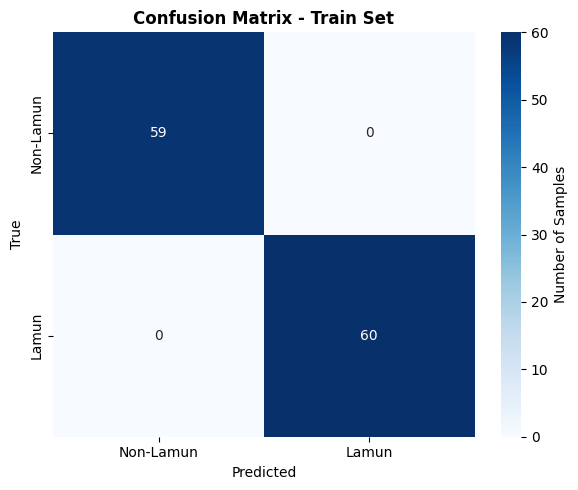

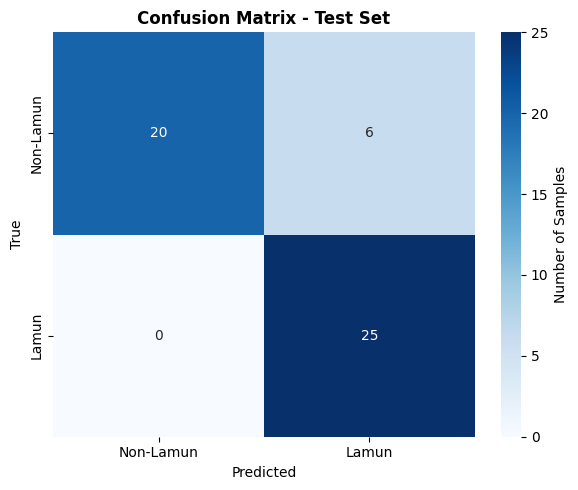

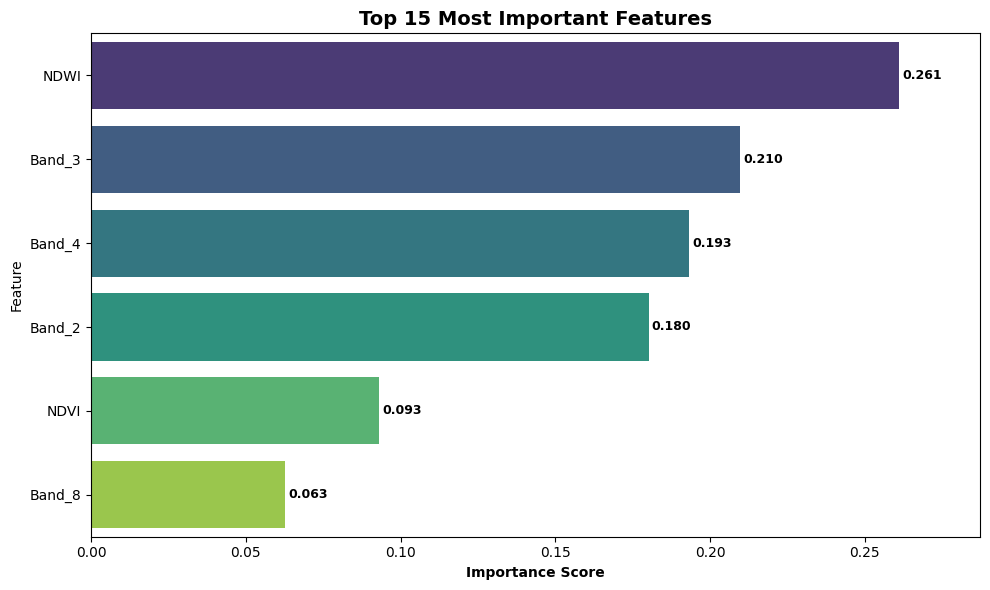

✅ Feature importance saved to: rf_lamun_results\feature_importance.csv

📊 Creating Performance Comparison Plot...


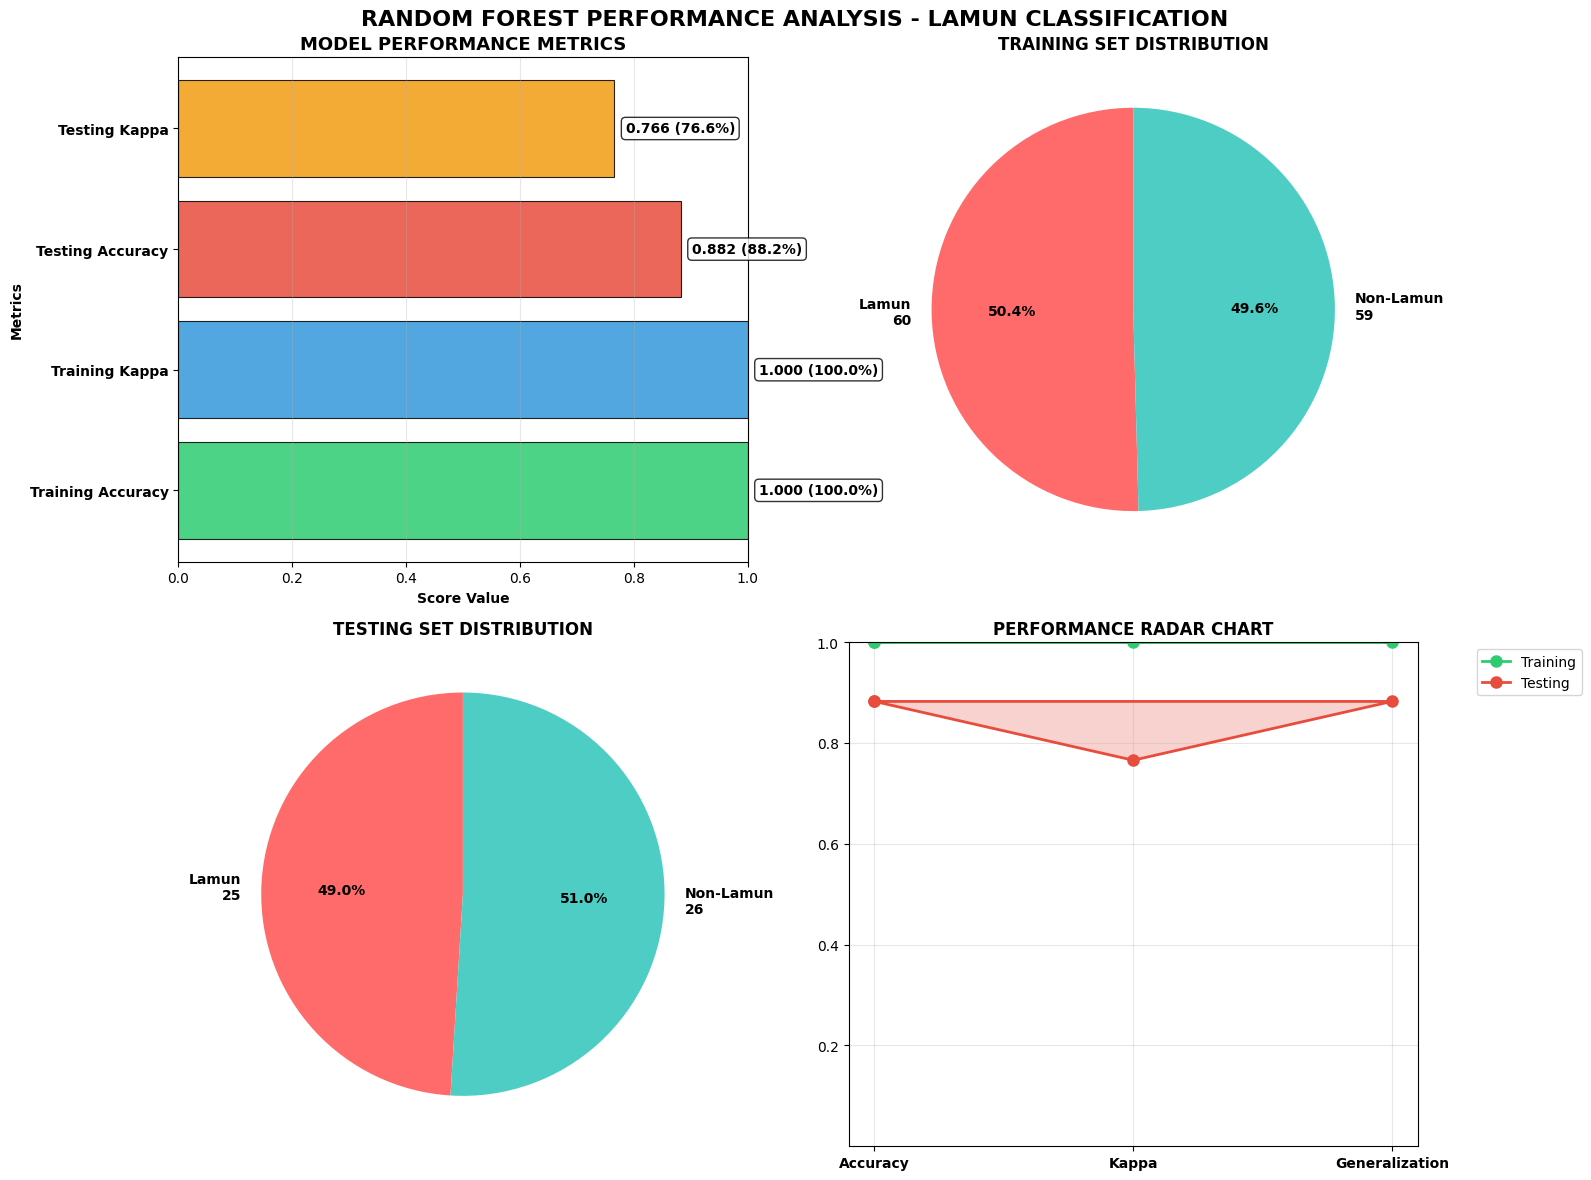


📈 PERFORMANCE INSIGHTS
Training Accuracy: 1.000 (100.0%)
Testing Accuracy : 0.882 (88.2%)
Accuracy Gap     : 0.118
Training Kappa   : 1.000
Testing Kappa    : 0.766
Kappa Gap        : 0.234
Generalization   : 0.882 (GOOD)

STEP 6: PRECISION, RECALL, F1-SCORE PER KELAS - SENTINEL

📊 DETAILED METRICS PER CLASS - SENTINEL:
--------------------------------------------------
🔸 Kelas 0:
   Precision: 1.000
   Recall   : 0.769
   F1-Score : 0.870
   Support  : 26.0 samples
🔸 Kelas 1:
   Precision: 0.806
   Recall   : 1.000
   F1-Score : 0.893
   Support  : 25.0 samples


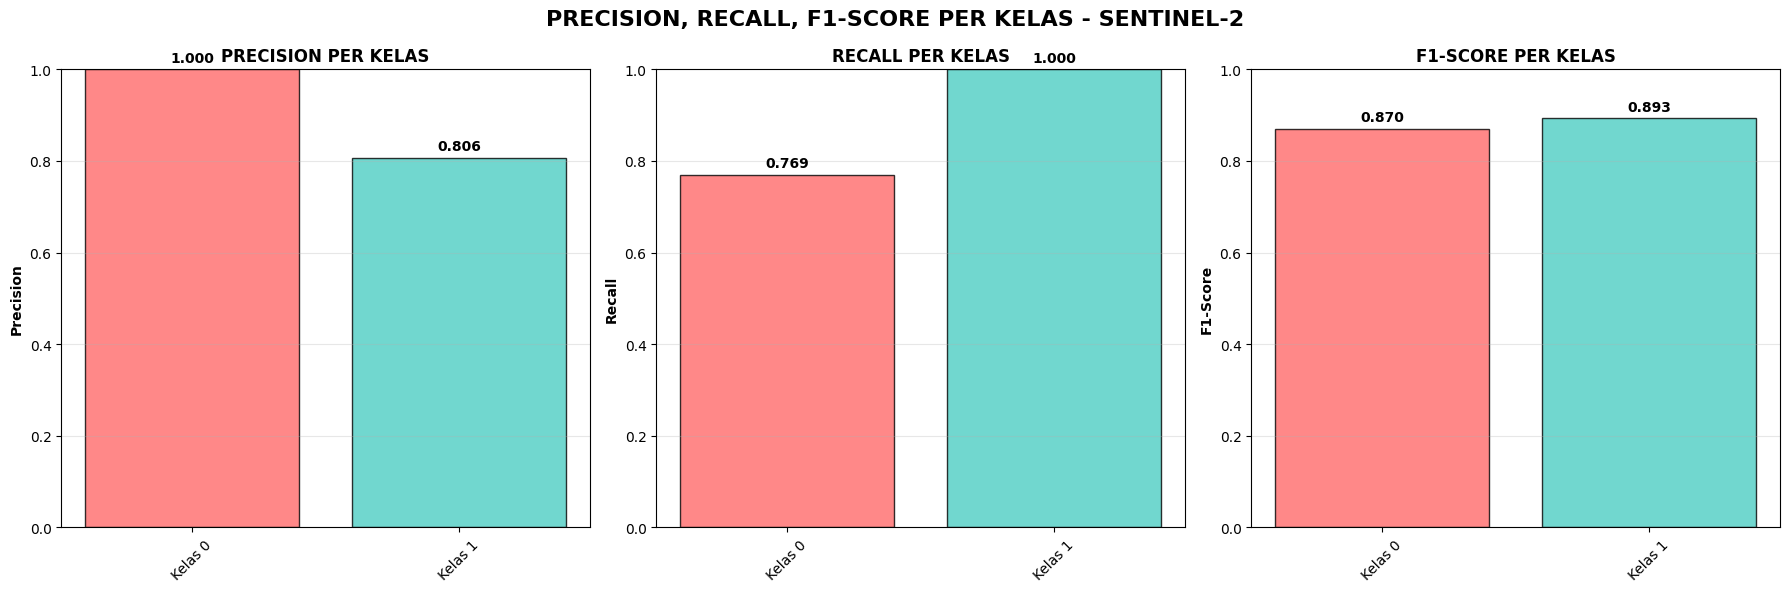

✅ Precision, Recall, F1-Score per kelas disimpan ke: rf_lamun_results\precision_recall_f1_per_class.csv

✅ Evaluation summary saved to: rf_lamun_results\evaluation_summary.csv
✅ Classification report saved to: rf_lamun_results\classification_report.csv

📊 DETAILED PERFORMANCE SUMMARY

🎯 OVERALL ACCURACY (OA):
   Training OA: 1.0000 (100.00%)
   Testing OA : 0.8824 (88.24%)

📈 COHEN'S KAPPA COEFFICIENT:
   Training Kappa: 1.0000
   Testing Kappa : 0.7657

💪 GENERALIZATION PERFORMANCE:
   Train-Test Gap: 0.1176 ⚠️
   Generalization: NEEDS IMPROVEMENT

🏆 TOP 5 FEATURES:
   NDWI: 0.2611
   Band_3: 0.2098
   Band_4: 0.1933
   Band_2: 0.1801
   NDVI: 0.0931

🎉 RANDOM FOREST PIPELINE BERHASIL DISELESAIKAN!
📁 Hasil disimpan di folder: rf_lamun_results
📊 File output:
   - evaluation_summary.csv
   - classification_report.csv
   - feature_importance.csv
   - precision_recall_f1_per_class.csv
   - model_sentinel.joblib
   - scaler_sentinel.joblib

✅ Model siap digunakan untuk prediksi!


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report, confusion_matrix
import warnings
import joblib  # <-- TAMBAHAN IMPORT

warnings.filterwarnings('ignore')

# Set style untuk background terang
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

class RandomForestTrainer:
    """
    Enhanced RandomForestTrainer:
    - Automatically detects spectral band columns
    - Optionally computes NDVI/NDWI/MNDWI if required bands available
    - Trains RF, evaluates on train+test, plots and saves feature importance + summary CSVs
    """
    def __init__(self, train_path, test_path, output_dir='rf_lamun_results', random_state=42):
        self.train_path = train_path
        self.test_path = test_path
        self.output_dir = output_dir
        os.makedirs(self.output_dir, exist_ok=True)
        self.random_state = random_state
        self.model = None
        self.scaler = None
        self.label_encoders = {}
        self.importance_df = None
        self.train_eval = None
        self.test_eval = None
        self.X_train_unscaled_features = None # Simpan nama fitur asli

    # --------------------------
    # Utilities
    # --------------------------
    @staticmethod
    def _is_metadata_col(col):
        meta_keywords = ['kategori','category','pixel','pixel_id','id','row','col','x','y','lon','long','lng','latitude','lat','longitude']
        c = col.lower()
        return any(k in c for k in meta_keywords)

    def _detect_spectral_columns(self, df):
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        spectral = [c for c in numeric_cols if not self._is_metadata_col(c) and c.lower() != 'label']
        return spectral

    def _compute_indices(self, df):
        added = []
        colset = set([c.lower() for c in df.columns])

        def find_col(possible_names):
            for name in possible_names:
                if name.lower() in colset:
                    for c in df.columns:
                        if c.lower() == name.lower():
                            return c
            return None

        b2 = find_col(['B2','Band_2','blue','b02','b02_reflectance'])
        b3 = find_col(['B3','Band_3','green','b03','b03_reflectance'])
        b4 = find_col(['B4','Band_4','red','b04','b04_reflectance'])
        b8 = find_col(['B8','Band_8','nir','b08','b08_reflectance'])
        b11 = find_col(['B11','Band_11','swir1','b11','b11_reflectance'])

        if b8 and b4:
            df['NDVI'] = (df[b8] - df[b4]) / (df[b8] + df[b4]).replace({0: np.nan})
            added.append('NDVI')
        if b3 and b8:
            df['NDWI'] = (df[b3] - df[b8]) / (df[b3] + df[b8]).replace({0: np.nan})
            added.append('NDWI')
        if b3 and b11:
            df['MNDWI'] = (df[b3] - df[b11]) / (df[b3] + df[b11]).replace({0: np.nan})
            added.append('MNDWI')

        return added

    # --------------------------
    # STEP 1 - LOAD & CLEAN
    # --------------------------
    def load_data(self, compute_indices=True):
        print("=" * 70)
        print("STEP 1: LOADING TRAINING & TESTING DATA")
        print("=" * 70)

        # Coba kedua delimiter
        try:
            train_data = pd.read_csv(self.train_path, delimiter=';')
            test_data = pd.read_csv(self.test_path, delimiter=';')
            print("✅ Loaded with semicolon delimiter")
        except:
            train_data = pd.read_csv(self.train_path, delimiter=',')
            test_data = pd.read_csv(self.test_path, delimiter=',')
            print("✅ Loaded with comma delimiter")

        print(f"Training data shape (original): {train_data.shape}")
        print(f"Testing data shape  (original): {test_data.shape}")

        # Tampilkan kolom yang tersedia
        print(f"\nKolom training: {list(train_data.columns)}")
        print(f"Kolom testing: {list(test_data.columns)}")

        drop_candidates = [c for c in train_data.columns if self._is_metadata_col(c)]
        if drop_candidates:
            print(f"Removing metadata columns: {drop_candidates}")
            train_data = train_data.drop(columns=drop_candidates, errors='ignore')
            test_data = test_data.drop(columns=drop_candidates, errors='ignore')

        if compute_indices:
            added_idx_train = self._compute_indices(train_data)
            added_idx_test = self._compute_indices(test_data)
            added_indices = list(set(added_idx_train) & set(added_idx_test))
            if added_indices:
                print(f"✅ Added spectral indices: {added_indices}")

        # Deteksi kolom label
        label_col = None
        for col in ['Label', 'label', 'LABEL']:
            if col in train_data.columns:
                label_col = col
                break
        
        if label_col is None:
            raise ValueError("Kolom 'Label' tidak ditemukan pada train/test data!")

        spectral_train = self._detect_spectral_columns(train_data)
        spectral_test = self._detect_spectral_columns(test_data)
        spectral = [c for c in spectral_train if c in spectral_test]

        if not spectral:
            raise ValueError("Tidak ditemukan kolom spektral yang cocok antara training dan testing!")
        
        # Simpan nama fitur
        self.X_train_unscaled_features = spectral

        self.X_train = train_data[spectral].copy()
        self.y_train = train_data[label_col].copy()
        self.X_test = test_data[spectral].copy()
        self.y_test = test_data[label_col].copy()

        print(f"\n✅ Using {len(spectral)} spectral features for training:")
        print(f"Features: {spectral}")
        print(f"Training samples: {len(self.X_train)}")
        print(f"Testing samples: {len(self.X_test)}")
        
        return self.X_train, self.X_test, self.y_train, self.y_test

    # --------------------------
    # STEP 2 - PREPROCESSING
    # --------------------------
    def preprocess_data(self):
        print("\n" + "=" * 70)
        print("STEP 2: PREPROCESSING DATA")
        print("=" * 70)

        numeric_cols = self.X_train.select_dtypes(include=[np.number]).columns.tolist()
        self.scaler = StandardScaler()
        self.X_train[numeric_cols] = self.scaler.fit_transform(self.X_train[numeric_cols])
        
        # === MODIFIKASI: SIMPAN SCALER ===
        scaler_path = os.path.join(self.output_dir, 'scaler_sentinel.joblib')
        joblib.dump(self.scaler, scaler_path)
        print(f"✅ Scaler disimpan di: {scaler_path}")
        # === AKHIR MODIFIKASI ===
        
        self.X_test[numeric_cols] = self.scaler.transform(self.X_test[numeric_cols])

        print(f"✅ Preprocessing completed. {len(numeric_cols)} numeric features scaled.")
        return self.X_train, self.X_test

    # --------------------------
    # STEP 3 - TRAIN
    # --------------------------
    def train_random_forest(self, n_estimators=200, max_depth=None, class_weight=None):
        print("\n" + "=" * 70)
        print("STEP 3: TRAINING RANDOM FOREST")
        print("=" * 70)

        self.model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=self.random_state,
            class_weight=class_weight,
            n_jobs=-1  # Use all processors
        )
        self.model.fit(self.X_train, self.y_train)
        print("✅ Random Forest trained successfully!")
        
        # === MODIFIKASI: SIMPAN MODEL ===
        model_path = os.path.join(self.output_dir, 'model_sentinel.joblib')
        joblib.dump(self.model, model_path)
        print(f"✅ Model disimpan di: {model_path}")
        # === AKHIR MODIFIKASI ===

        print(f"Model configuration:")
        print(f"- n_estimators: {n_estimators}")
        print(f"- max_depth: {max_depth}")
        print(f"- random_state: {self.random_state}")
        return self.model

    # --------------------------
    # STEP 4 - EVALUATION
    # (Semua kode di bawah ini tetap sama seperti milik Anda)
    # --------------------------
    def evaluate_dataset(self, X, y, dataset_name='Test'):
        y_pred = self.model.predict(X)
        acc = accuracy_score(y, y_pred)
        kappa = cohen_kappa_score(y, y_pred)
        report = classification_report(y, y_pred, output_dict=True)
        cm = confusion_matrix(y, y_pred)
        return {'dataset': dataset_name, 'accuracy': acc, 'kappa': kappa, 'report_dict': report, 'confusion_matrix': cm, 'y_pred': y_pred}

    def _plot_confusion_matrix(self, cm, title, labels=None):
        if labels is None:
            labels = ['Non-Lamun','Lamun']
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,
                 cbar_kws={'label': 'Number of Samples'})
        plt.title(title, fontweight='bold', fontsize=12)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()

    def plot_feature_importance(self, top_n=20, save_csv=True):
        feat_names = self.X_train.columns
        importances = self.model.feature_importances_
        self.importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, max(6, top_n*0.3)))
        bars = sns.barplot(data=self.importance_df.head(top_n), x='Importance', y='Feature', palette='viridis')
        
        # Tambah nilai importance di setiap bar
        for i, (_, row) in enumerate(self.importance_df.head(top_n).iterrows()):
            bars.text(row['Importance'] + 0.001, i, f'{row["Importance"]:.3f}', 
                      ha='left', va='center', fontweight='bold', fontsize=9)
        
        plt.title(f'Top {top_n} Most Important Features', fontweight='bold', fontsize=14)
        plt.xlabel('Importance Score', fontweight='bold')
        plt.xlim(0, self.importance_df['Importance'].max() * 1.1)
        plt.tight_layout()
        plt.show()

        if save_csv:
            outpath = os.path.join(self.output_dir, 'feature_importance.csv')
            self.importance_df.to_csv(outpath, index=False)
            print(f"✅ Feature importance saved to: {outpath}")

    def plot_performance_comparison(self):
        """
        Plot performance comparison yang TIDAK mengulangi plot sebelumnya
        """
        print("\n📊 Creating Performance Comparison Plot...")
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('RANDOM FOREST PERFORMANCE ANALYSIS - LAMUN CLASSIFICATION', 
                     fontsize=16, fontweight='bold', color='black')

        # Plot 1: Accuracy & Kappa Comparison (Horizontal Bar Chart)
        metrics = ['Training Accuracy', 'Training Kappa', 'Testing Accuracy', 'Testing Kappa']
        values = [
            self.train_eval['accuracy'],
            self.train_eval['kappa'],
            self.test_eval['accuracy'], 
            self.test_eval['kappa']
        ]
        colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
        
        y_pos = np.arange(len(metrics))
        bars = ax1.barh(y_pos, values, color=colors, edgecolor='black', linewidth=0.8, alpha=0.85)
        ax1.set_title('MODEL PERFORMANCE METRICS', fontweight='bold', fontsize=13)
        ax1.set_xlabel('Score Value', fontweight='bold')
        ax1.set_ylabel('Metrics', fontweight='bold')
        ax1.set_yticks(y_pos)
        ax1.set_yticklabels(metrics, fontweight='bold')
        ax1.set_xlim(0, 1)
        ax1.grid(axis='x', alpha=0.3)
        
        # Tambah nilai dan persentase
        for bar, value in zip(bars, values):
            width = bar.get_width()
            ax1.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                     f'{value:.3f} ({value*100:.1f}%)', 
                     ha='left', va='center', fontweight='bold', fontsize=10,
                     bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

        # Plot 2: Class Distribution Comparison (Pie Charts)
        train_lamun = (self.y_train == 1).sum()
        train_non_lamun = (self.y_train == 0).sum()
        test_lamun = (self.y_test == 1).sum()
        test_non_lamun = (self.y_test == 0).sum()
        
        # Training distribution
        train_sizes = [train_lamun, train_non_lamun]
        train_labels = [f'Lamun\n{train_lamun}', f'Non-Lamun\n{train_non_lamun}']
        train_colors = ['#ff6b6b', '#4ecdc4']
        
        wedges1, texts1, autotexts1 = ax2.pie(train_sizes, labels=train_labels, colors=train_colors, 
                                              autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})
        ax2.set_title('TRAINING SET DISTRIBUTION', fontweight='bold', fontsize=12)
        
        # Testing distribution  
        test_sizes = [test_lamun, test_non_lamun]
        test_labels = [f'Lamun\n{test_lamun}', f'Non-Lamun\n{test_non_lamun}']
        test_colors = ['#ff6b6b', '#4ecdc4']
        
        wedges2, texts2, autotexts2 = ax3.pie(test_sizes, labels=test_labels, colors=test_colors,
                                              autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})
        ax3.set_title('TESTING SET DISTRIBUTION', fontweight='bold', fontsize=12)

        # Plot 3: Performance Summary Radar Chart (Simplified)
        categories = ['Accuracy', 'Kappa', 'Generalization']
        train_values = [self.train_eval['accuracy'], self.train_eval['kappa'], 1.0]  # Generalization maksimum untuk training
        test_values = [self.test_eval['accuracy'], self.test_eval['kappa'], 
                       1.0 - abs(self.train_eval['accuracy'] - self.test_eval['accuracy'])]  # Generalization berdasarkan gap
        
        angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
        train_values += train_values[:1]  # Tutup radar chart
        test_values += test_values[:1]
        angles += angles[:1]
        
        categories += categories[:1]  # Tutup kategori
        
        ax4.plot(angles, train_values, 'o-', linewidth=2, label='Training', color='#2ecc71', markersize=8)
        ax4.fill(angles, train_values, alpha=0.25, color='#2ecc71')
        ax4.plot(angles, test_values, 'o-', linewidth=2, label='Testing', color='#e74c3c', markersize=8)
        ax4.fill(angles, test_values, alpha=0.25, color='#e74c3c')
        
        ax4.set_xticks(angles[:-1])
        ax4.set_xticklabels(['Accuracy', 'Kappa', 'Generalization'], fontweight='bold')
        ax4.set_ylim(0, 1)
        ax4.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax4.grid(True, alpha=0.3)
        ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        ax4.set_title('PERFORMANCE RADAR CHART', fontweight='bold', fontsize=12)

        # Set background putih untuk semua subplot
        for ax in [ax1, ax2, ax3, ax4]:
            ax.set_facecolor('white')
        
        plt.tight_layout()
        plt.show()
        
        # Print additional performance insights
        print("\n" + "=" * 50)
        print("📈 PERFORMANCE INSIGHTS")
        print("=" * 50)
        print(f"Training Accuracy: {self.train_eval['accuracy']:.3f} ({self.train_eval['accuracy']*100:.1f}%)")
        print(f"Testing Accuracy : {self.test_eval['accuracy']:.3f} ({self.test_eval['accuracy']*100:.1f}%)")
        print(f"Accuracy Gap     : {abs(self.train_eval['accuracy'] - self.test_eval['accuracy']):.3f}")
        print(f"Training Kappa   : {self.train_eval['kappa']:.3f}")
        print(f"Testing Kappa    : {self.test_eval['kappa']:.3f}")
        print(f"Kappa Gap        : {abs(self.train_eval['kappa'] - self.test_eval['kappa']):.3f}")
        
        generalization_score = 1.0 - abs(self.train_eval['accuracy'] - self.test_eval['accuracy'])
        if generalization_score > 0.9:
            status = "EXCELLENT"
        elif generalization_score > 0.8:
            status = "GOOD"
        else:
            status = "NEEDS ATTENTION"
        print(f"Generalization   : {generalization_score:.3f} ({status})")

    def plot_precision_recall_f1_per_class(self, save_csv=True):
        """
        Plot precision, recall, dan F1-score per kelas untuk Sentinel
        """
        print("\n" + "=" * 70)
        print("STEP 6: PRECISION, RECALL, F1-SCORE PER KELAS - SENTINEL")
        print("=" * 70)
        
        # Ambil classification report dari test evaluation
        report_dict = self.test_eval['report_dict']
        
        # Filter hanya kelas (bukan accuracy, macro avg, weighted avg)
        class_metrics = {}
        for key, metrics in report_dict.items():
            if key not in ['accuracy', 'macro avg', 'weighted avg'] and key.isdigit():
                class_name = f"Kelas {key}"  # Bisa disesuaikan dengan nama kelas sebenarnya
                class_metrics[class_name] = {
                    'Precision': metrics['precision'],
                    'Recall': metrics['recall'], 
                    'F1-Score': metrics['f1-score'],
                    'Support': metrics['support']
                }
        
        # Convert to DataFrame
        metrics_df = pd.DataFrame.from_dict(class_metrics, orient='index')
        metrics_df.reset_index(inplace=True)
        metrics_df.rename(columns={'index': 'Kelas'}, inplace=True)
        
        # Print detailed metrics
        print("\n📊 DETAILED METRICS PER CLASS - SENTINEL:")
        print("-" * 50)
        for _, row in metrics_df.iterrows():
            print(f"🔸 {row['Kelas']}:")
            print(f"   Precision: {row['Precision']:.3f}")
            print(f"   Recall   : {row['Recall']:.3f}")
            print(f"   F1-Score : {row['F1-Score']:.3f}")
            print(f"   Support  : {row['Support']} samples")
        
        # Plotting
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle('PRECISION, RECALL, F1-SCORE PER KELAS - SENTINEL-2', 
                     fontsize=16, fontweight='bold')
        
        # Plot 1: Precision per Kelas
        bars1 = axes[0].bar(metrics_df['Kelas'], metrics_df['Precision'], 
                            color=['#ff6b6b', '#4ecdc4', '#45b7d1'], alpha=0.8, edgecolor='black')
        axes[0].set_title('PRECISION PER KELAS', fontweight='bold', fontsize=12)
        axes[0].set_ylabel('Precision', fontweight='bold')
        axes[0].set_ylim(0, 1)
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(axis='y', alpha=0.3)
        
        # Tambah nilai di setiap bar (Precision)
        for bar, value in zip(bars1, metrics_df['Precision']):
            axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                         f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Plot 2: Recall per Kelas
        bars2 = axes[1].bar(metrics_df['Kelas'], metrics_df['Recall'], 
                            color=['#ff6b6b', '#4ecdc4', '#45b7d1'], alpha=0.8, edgecolor='black')
        axes[1].set_title('RECALL PER KELAS', fontweight='bold', fontsize=12)
        axes[1].set_ylabel('Recall', fontweight='bold')
        axes[1].set_ylim(0, 1)
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].grid(axis='y', alpha=0.3)
        
        # Tambah nilai di setiap bar (Recall)
        for bar, value in zip(bars2, metrics_df['Recall']):
            axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                         f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Plot 3: F1-Score per Kelas
        bars3 = axes[2].bar(metrics_df['Kelas'], metrics_df['F1-Score'], 
                            color=['#ff6b6b', '#4ecdc4', '#45b7d1'], alpha=0.8, edgecolor='black')
        axes[2].set_title('F1-SCORE PER KELAS', fontweight='bold', fontsize=12)
        axes[2].set_ylabel('F1-Score', fontweight='bold')
        axes[2].set_ylim(0, 1)
        axes[2].tick_params(axis='x', rotation=45)
        axes[2].grid(axis='y', alpha=0.3)
        
        # Tambah nilai di setiap bar (F1-Score)
        for bar, value in zip(bars3, metrics_df['F1-Score']):
            axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                         f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Set background putih
        for ax in axes:
            ax.set_facecolor('white')
        
        plt.tight_layout()
        plt.show()
        
        # Save to CSV
        if save_csv:
            csv_path = os.path.join(self.output_dir, 'precision_recall_f1_per_class.csv')
            metrics_df.to_csv(csv_path, index=False)
            print(f"✅ Precision, Recall, F1-Score per kelas disimpan ke: {csv_path}")
        
        return metrics_df

    def print_detailed_summary(self):
        """
        Print ringkasan detail hasil training dan testing
        """
        print("\n" + "=" * 70)
        print("📊 DETAILED PERFORMANCE SUMMARY")
        print("=" * 70)
        
        print(f"\n🎯 OVERALL ACCURACY (OA):")
        print(f"   Training OA: {self.train_eval['accuracy']:.4f} ({self.train_eval['accuracy']*100:.2f}%)")
        print(f"   Testing OA : {self.test_eval['accuracy']:.4f} ({self.test_eval['accuracy']*100:.2f}%)")
        
        print(f"\n📈 COHEN'S KAPPA COEFFICIENT:")
        print(f"   Training Kappa: {self.train_eval['kappa']:.4f}")
        print(f"   Testing Kappa : {self.test_eval['kappa']:.4f}")
        
        print(f"\n💪 GENERALIZATION PERFORMANCE:")
        train_test_gap = abs(self.train_eval['accuracy'] - self.test_eval['accuracy'])
        if train_test_gap < 0.05:
            status = "EXCELLENT"
            emoji = "🎉"
        elif train_test_gap < 0.1:
            status = "GOOD" 
            emoji = "✅"
        else:
            status = "NEEDS IMPROVEMENT"
            emoji = "⚠️"
        
        print(f"   Train-Test Gap: {train_test_gap:.4f} {emoji}")
        print(f"   Generalization: {status}")
        
        print(f"\n🏆 TOP 5 FEATURES:")
        top_features = self.importance_df.head(5)
        for idx, row in top_features.iterrows():
            print(f"   {row['Feature']}: {row['Importance']:.4f}")

    # --------------------------
    # FULL PIPELINE
    # --------------------------
    def run_complete_pipeline(self, n_estimators=200, max_depth=None, class_weight=None, compute_indices=True, top_n_importance=20):
        """
        Jalankan complete pipeline untuk training dan evaluasi Random Forest
        """
        print("RANDOM FOREST CLASSIFICATION PIPELINE")
        print("=" * 70)
        
        try:
            # Step 1: Load data
            self.load_data(compute_indices=compute_indices)
            
            # Step 2: Preprocessing
            self.preprocess_data()
            
            # Step 3: Training
            self.train_random_forest(n_estimators=n_estimators, max_depth=max_depth, class_weight=class_weight)
            
            # Step 4: Evaluation
            self.train_eval = self.evaluate_dataset(self.X_train, self.y_train, 'Train')
            self.test_eval = self.evaluate_dataset(self.X_test, self.y_test, 'Test')

            print("\n" + "=" * 70)
            print("STEP 4: MODEL EVALUATION RESULTS")
            print("=" * 70)

            print("\n--- TRAIN EVALUATION ---")
            print(f"Overall Accuracy (OA): {self.train_eval['accuracy']:.4f} ({self.train_eval['accuracy']*100:.2f}%)")
            print(f"Cohen's Kappa: {self.train_eval['kappa']:.4f}")

            print("\n--- TEST EVALUATION ---")
            print(f"Overall Accuracy (OA): {self.test_eval['accuracy']:.4f} ({self.test_eval['accuracy']*100:.2f}%)")
            print(f"Cohen's Kappa: {self.test_eval['kappa']:.4f}")

            # Visualisasi
            print("\n" + "=" * 70)
            print("STEP 5: VISUALIZATION")
            print("=" * 70)
            
            # 1. Confusion Matrix Training
            self._plot_confusion_matrix(self.train_eval['confusion_matrix'], "Confusion Matrix - Train Set")
            
            # 2. Confusion Matrix Testing
            self._plot_confusion_matrix(self.test_eval['confusion_matrix'], "Confusion Matrix - Test Set")
            
            # 3. Feature Importance
            self.plot_feature_importance(top_n=top_n_importance, save_csv=True)
            
            # 4. Performance Comparison (IMPROVED)
            self.plot_performance_comparison()

            # STEP 6: Precision, Recall, F1-Score per Kelas
            class_metrics_df = self.plot_precision_recall_f1_per_class(save_csv=True)

            # Save evaluation results
            summary = {
                'dataset': ['Train', 'Test'], 
                'accuracy': [self.train_eval['accuracy'], self.test_eval['accuracy']], 
                'kappa': [self.train_eval['kappa'], self.test_eval['kappa']]
            }
            summary_df = pd.DataFrame(summary)
            summary_path = os.path.join(self.output_dir, 'evaluation_summary.csv')
            summary_df.to_csv(summary_path, index=False)

            # Save classification report
            class_report_df = pd.DataFrame(self.test_eval['report_dict']).transpose()
            class_report_path = os.path.join(self.output_dir, 'classification_report.csv')
            class_report_df.to_csv(class_report_path)

            print(f"\n✅ Evaluation summary saved to: {summary_path}")
            print(f"✅ Classification report saved to: {class_report_path}")

            # Final summary
            self.print_detailed_summary()

            return {
                'train_eval': self.train_eval, 
                'test_eval': self.test_eval, 
                'importance_df': self.importance_df, 
                'summary_df': summary_df,
                'class_metrics_df': class_metrics_df
            }
            
        except Exception as e:
            print(f"❌ Error dalam menjalankan pipeline: {e}")
            import traceback
            traceback.print_exc()
            return None

# =============================================================================
# FUNGSI UTAMA
# =============================================================================

def main():
    """
    Fungsi utama untuk menjalankan Random Forest classification
    """
    # Konfigurasi path
    possible_train_paths = [
        "dataset_seimbang_170_pixel_train_70.csv",
        "dataset_6272_pixel_lamun_sentinel_train_70.csv"
    ]
    
    possible_test_paths = [
        "dataset_seimbang_170_pixel_test_30.csv", 
        "dataset_6272_pixel_lamun_sentinel_test_30.csv"
    ]
    
    TRAIN_PATH = None
    TEST_PATH = None
    
    for train_path, test_path in zip(possible_train_paths, possible_test_paths):
        try:
            # Cek jika file ada
            if os.path.exists(train_path) and os.path.exists(test_path):
                 TRAIN_PATH = train_path
                 TEST_PATH = test_path
                 print(f"✅ Dataset ditemukan: {train_path}, {test_path}")
                 break
        except:
            continue
    
    if TRAIN_PATH is None:
        print("❌ Tidak ada dataset training/testing yang ditemukan.")
        print("Pastikan sudah menjalankan script split 70:30 terlebih dahulu.")
        return
    
    # Konfigurasi model
    N_ESTIMATORS = 200
    MAX_DEPTH = None
    RANDOM_STATE = 42
    OUTPUT_DIR = 'rf_lamun_results'
    
    print("\n" + "=" * 70)
    print("RANDOM FOREST CLASSIFICATION FOR LAMUN DETECTION")
    print("=" * 70)
    print(f"Training data: {TRAIN_PATH}")
    print(f"Testing data: {TEST_PATH}")
    print(f"Output directory: {OUTPUT_DIR}")
    print(f"Model: Random Forest (n_estimators={N_ESTIMATORS}, max_depth={MAX_DEPTH})")
    print("=" * 70)
    
    # Inisialisasi trainer
    trainer = RandomForestTrainer(
        train_path=TRAIN_PATH,
        test_path=TEST_PATH,
        output_dir=OUTPUT_DIR,
        random_state=RANDOM_STATE
    )
    
    # Jalankan complete pipeline
    results = trainer.run_complete_pipeline(
        n_estimators=N_ESTIMATORS,
        max_depth=MAX_DEPTH,
        class_weight=None,
        compute_indices=True,
        top_n_importance=15
    )
    
    if results is not None:
        print("\n" + "=" * 70)
        print("🎉 RANDOM FOREST PIPELINE BERHASIL DISELESAIKAN!")
        print("=" * 70)
        print("📁 Hasil disimpan di folder:", trainer.output_dir)
        print("📊 File output:")
        print("   - evaluation_summary.csv")
        print("   - classification_report.csv") 
        print("   - feature_importance.csv")
        print("   - precision_recall_f1_per_class.csv")
        print("   - model_sentinel.joblib") # <-- Hasil baru
        print("   - scaler_sentinel.joblib") # <-- Hasil baru
        print("\n✅ Model siap digunakan untuk prediksi!")
    else:
        print("\n❌ Pipeline gagal dijalankan.")

if __name__ == "__main__":
    main()

## Random Sampling LANDSAT

SAMPLING DATASET SEIMBANG - LANDSAT 8
Memulai sampling dataset seimbang Landsat 8 dengan area 48%...
MEMBUKA FILE LANDSAT 8...
Dimensi citra: 38 x 19 pixel
Jumlah band: 29
CRS: EPSG:4326

MEMBUKA DATA SHAPEFILE...
Jumlah polygon lamun: 198
Jumlah polygon pasir: 54
Jumlah polygon coral: 18

MEMBUAT MASK UNTUK MASING-MASING KELAS...

MEMBACA BAND UNTUK VISUALISASI...

MENGUMPULKAN PIXEL UNTUK SAMPLING...
AREA SAMPLING KANAN BAWAH 48%:
  - Kolom: 19 sampai 38 (48% paling kanan)
  - Baris: 9 sampai 19 (48% paling bawah)
  - Total area: 190 pixel

PIXEL TERKUMPUL:
Lamun: 26
Pasir: 8
Coral: 3
Perairan Kanan Bawah: 190
Perairan Lain: 335

MEMBUAT DATASET SEIMBANG (26 per kelas)...
✅ Sampled Lamun: 26 pixel
✅ Pasir + Coral: 11 pixel
⚠️  Butuh tambahan 15 pixel dari Perairan
✅ Diambil 15 pixel dari perairan kanan bawah
✅ Pixel perairan kanan bawah yang terpilih: 15

MENAMPILKAN VISUALISASI SAMPLING KANAN BAWAH


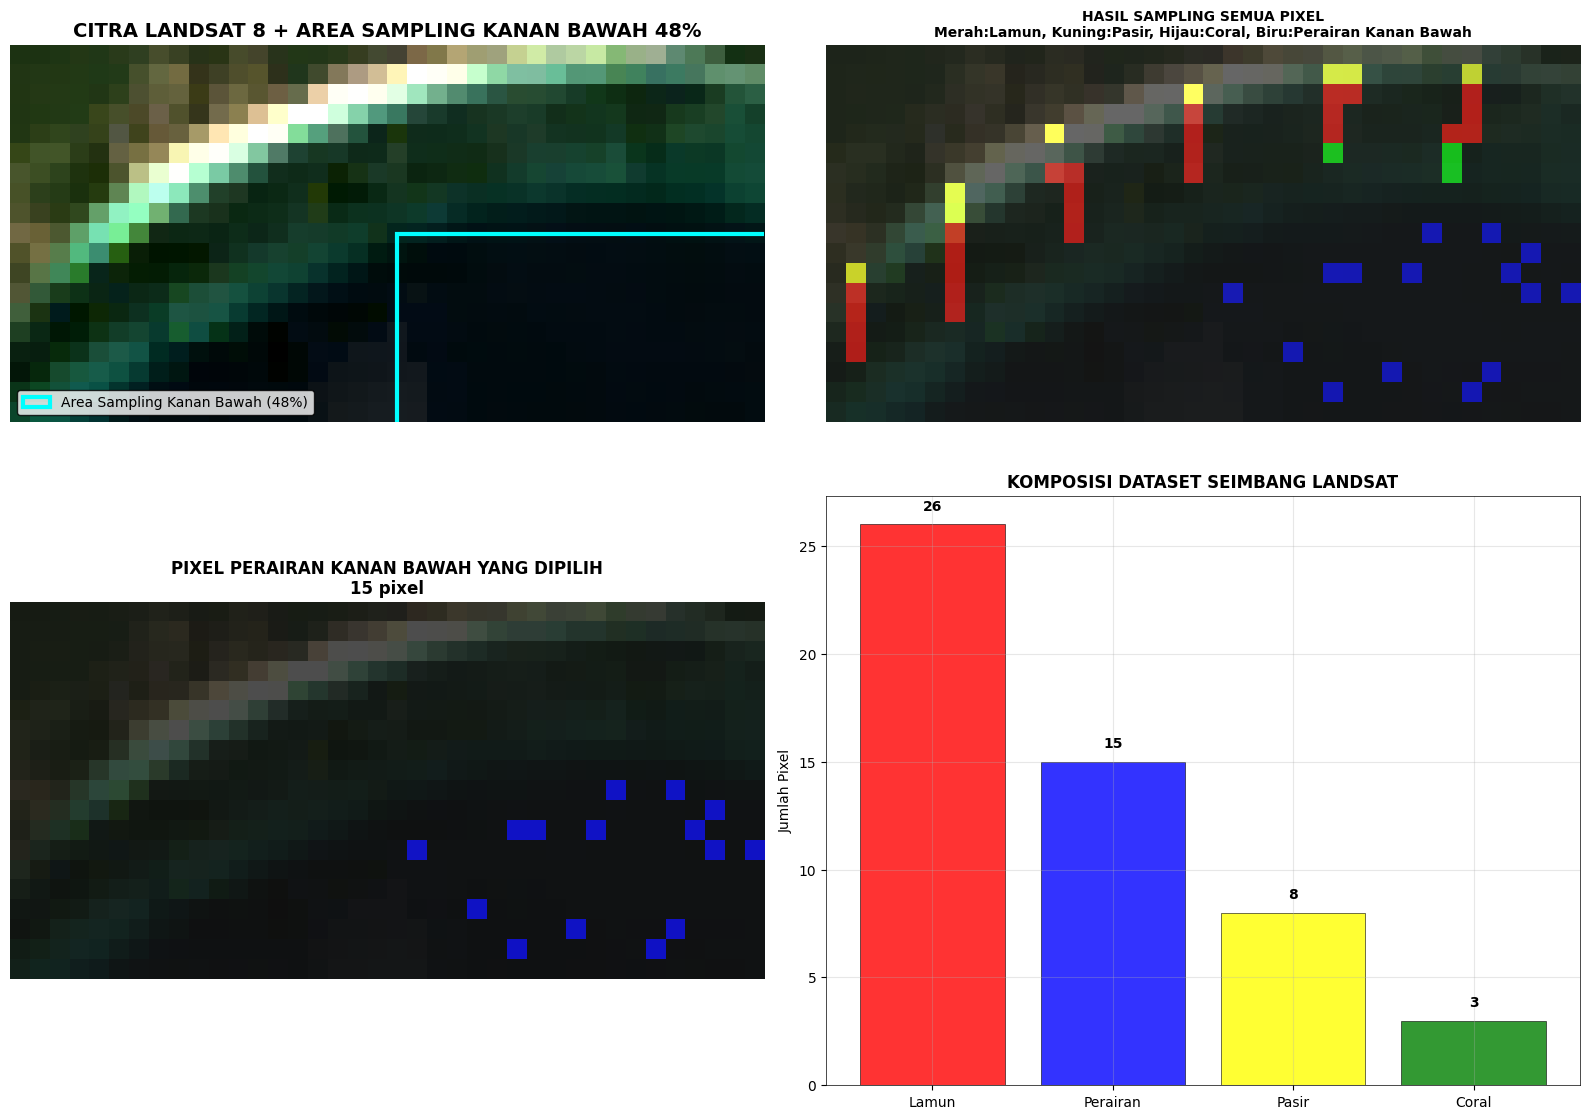


STATISTIK AKHIR DATASET SEIMBANG LANDSAT
TOTAL DATASET: 52 pixel
├── Lamun: 26 pixel
└── Non-Lamun: 26 pixel
    ├── Pasir: 8 pixel
    ├── Coral: 3 pixel
    └── Perairan: 15 pixel
        └── Dari area kanan bawah 48%: 15 pixel

MENYIMPAN DATASET...
✅ Dataset seimbang Landsat disimpan sebagai: dataset_seimbang_landsat_52_pixel.csv
✅ Pixel kanan bawah Landsat yang dipilih disimpan sebagai: pixel_kanan_bawah_landsat_yang_dipilih.csv

SAMPLING DATASET SEIMBANG LANDSAT SELESAI!
Output: dataset_seimbang_landsat_52_pixel.csv
Visualisasi: 4 plot sampling detail dengan background terang

✅ SAMPLING LANDSAT BERHASIL!
   Dataset seimbang: 52 pixel
   Lamun: 26 pixel
   Non-Lamun: 26 pixel (Pasir + Coral + Perairan)
   Pixel perairan kanan bawah 48% yang dipilih: 15 pixel


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from rasterio import features
import random
import matplotlib.patches as mpatches

# Set style untuk background terang
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

print("SAMPLING DATASET SEIMBANG - LANDSAT 8")
print("=" * 60)

# Path file Landsat 8
path_tif_landsat = "Landsat8_BaraBulukumba_2023_JulSep_Full_Area.tif"
path_shp_lamun = "SHP Lamun/Data_Lamun.shp"
path_shp_pasir = "SHP Pasir/Pasir.shp"
path_shp_coral = "SHP Koral/coral.shp"

def sampling_dataset_seimbang_landsat(raster_path, lamun_path, pasir_path, coral_path, target_samples=26):
    """Sampling dataset seimbang dengan prioritas area kanan bawah 48% untuk Landsat 8"""
    
    try:
        # Baca data raster Landsat 8
        with rasterio.open(raster_path) as src:
            print("MEMBUKA FILE LANDSAT 8...")
            print(f"Dimensi citra: {src.width} x {src.height} pixel")
            print(f"Jumlah band: {src.count}")
            print(f"CRS: {src.crs}")
            width, height = src.width, src.height
            
            # Baca semua shapefile
            print("\nMEMBUKA DATA SHAPEFILE...")
            gdf_lamun = gpd.read_file(lamun_path)
            gdf_pasir = gpd.read_file(pasir_path)
            gdf_coral = gpd.read_file(coral_path)
            
            print(f"Jumlah polygon lamun: {len(gdf_lamun)}")
            print(f"Jumlah polygon pasir: {len(gdf_pasir)}")
            print(f"Jumlah polygon coral: {len(gdf_coral)}")
            
            # Pastikan CRS sama
            for gdf, name in zip([gdf_lamun, gdf_pasir, gdf_coral], ['Lamun', 'Pasir', 'Coral']):
                if gdf.crs != src.crs:
                    print(f"Mengkonversi CRS {name} dari {gdf.crs} ke {src.crs}")
                    gdf = gdf.to_crs(src.crs)
            
            # Buat mask untuk masing-masing kelas
            print("\nMEMBUAT MASK UNTUK MASING-MASING KELAS...")
            
            lamun_mask = features.rasterize(
                [(geometry, 1) for geometry in gdf_lamun.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            pasir_mask = features.rasterize(
                [(geometry, 2) for geometry in gdf_pasir.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            coral_mask = features.rasterize(
                [(geometry, 3) for geometry in gdf_coral.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            # Baca band untuk visualisasi (RGB: Band 4,3,2 untuk Landsat)
            print("\nMEMBACA BAND UNTUK VISUALISASI...")
            red = src.read(4)    # Band 4 - Red
            green = src.read(3)  # Band 3 - Green  
            blue = src.read(2)   # Band 2 - Blue
            
            # Normalisasi untuk visualisasi - diperbaiki agar lebih terang
            rgb = np.dstack((red, green, blue))
            # Cari percentiles untuk normalisasi yang lebih baik
            p2, p98 = np.percentile(rgb, (2, 98))
            rgb_normalized = np.clip((rgb - p2) / (p98 - p2), 0, 1)
            
            # Band untuk analisis (sesuaikan dengan karakteristik Landsat)
            band2 = src.read(2)  # Blue
            band3 = src.read(3)  # Green
            band4 = src.read(4)  # Red
            band5 = src.read(5)  # NIR
            
            # KUMPULKAN PIXEL UNTUK SAMPLING
            print("\nMENGUMPULKAN PIXEL UNTUK SAMPLING...")
            
            lamun_pixels = []
            pasir_pixels = []
            coral_pixels = []
            perairan_kanan_bawah_pixels = []  # Hanya perairan di area kanan bawah
            perairan_lain_pixels = []         # Perairan di area lain
            
            # Definisikan area kanan bawah 48% (52% dari kiri dan 52% dari atas)
            right_start_col = int(width * 0.52)   # 48% dari kanan
            bottom_start_row = int(height * 0.52) # 48% dari bawah
            
            print(f"AREA SAMPLING KANAN BAWAH 48%:")
            print(f"  - Kolom: {right_start_col} sampai {width} (48% paling kanan)")
            print(f"  - Baris: {bottom_start_row} sampai {height} (48% paling bawah)")
            print(f"  - Total area: {(width - right_start_col) * (height - bottom_start_row)} pixel")
            
            for row in range(height):
                for col in range(width):
                    # Skip pixel dengan nilai 0 (no data atau daratan)
                    if band2[row, col] == 0 and band3[row, col] == 0 and band4[row, col] == 0:
                        continue
                    
                    # Tentukan apakah pixel berada di area kanan bawah
                    is_kanan_bawah = (col >= right_start_col and row >= bottom_start_row)
                        
                    pixel_data = {
                        'Pixel_ID': row * width + col,
                        'Row': row,
                        'Col': col,
                        'Band_2': float(band2[row, col]),  # Blue
                        'Band_3': float(band3[row, col]),  # Green
                        'Band_4': float(band4[row, col]),  # Red
                        'Band_5': float(band5[row, col]),  # NIR
                        'Area': 'Kanan_Bawah' if is_kanan_bawah else 'Lainnya'
                    }
                    
                    if lamun_mask[row, col] == 1:
                        pixel_data['Label'] = 1
                        pixel_data['Kategori'] = 'Lamun'
                        pixel_data['Kategori_Detail'] = 'Lamun'
                        lamun_pixels.append(pixel_data)
                    elif pasir_mask[row, col] == 2:
                        pixel_data['Label'] = 0
                        pixel_data['Kategori'] = 'Non_Lamun'
                        pixel_data['Kategori_Detail'] = 'Pasir'
                        pasir_pixels.append(pixel_data)
                    elif coral_mask[row, col] == 3:
                        pixel_data['Label'] = 0
                        pixel_data['Kategori'] = 'Non_Lamun'
                        pixel_data['Kategori_Detail'] = 'Coral'
                        coral_pixels.append(pixel_data)
                    else:
                        # Hanya ambil pixel perairan (bukan daratan)
                        # Filter berdasarkan nilai reflectance yang khas untuk perairan
                        if band4[row, col] < band2[row, col]:  # Red < Blue (karakteristik perairan)
                            pixel_data['Label'] = 0
                            pixel_data['Kategori'] = 'Non_Lamun'
                            pixel_data['Kategori_Detail'] = 'Perairan'
                            
                            if is_kanan_bawah:
                                perairan_kanan_bawah_pixels.append(pixel_data)
                            else:
                                perairan_lain_pixels.append(pixel_data)
            
            print(f"\nPIXEL TERKUMPUL:")
            print(f"Lamun: {len(lamun_pixels)}")
            print(f"Pasir: {len(pasir_pixels)}")
            print(f"Coral: {len(coral_pixels)}")
            print(f"Perairan Kanan Bawah: {len(perairan_kanan_bawah_pixels)}")
            print(f"Perairan Lain: {len(perairan_lain_pixels)}")
            
            # SAMPLING DENGAN PRIORITAS KANAN BAWAH
            print(f"\nMEMBUAT DATASET SEIMBANG ({target_samples} per kelas)...")
            
            # 1. Sampling Lamun
            sampled_lamun = random.sample(lamun_pixels, min(target_samples, len(lamun_pixels)))
            print(f"✅ Sampled Lamun: {len(sampled_lamun)} pixel")
            
            # 2. Gabungkan Pasir dan Coral sebagai dasar Non-Lamun
            non_lamun_combined = pasir_pixels + coral_pixels
            print(f"✅ Pasir + Coral: {len(non_lamun_combined)} pixel")
            
            # 3. Jika masih kurang, ambil HANYA dari Perairan KANAN BAWAH
            if len(non_lamun_combined) < target_samples:
                needed = target_samples - len(non_lamun_combined)
                print(f"⚠️  Butuh tambahan {needed} pixel dari Perairan")
                
                # HANYA ambil dari perairan kanan bawah
                if len(perairan_kanan_bawah_pixels) >= needed:
                    additional_samples = random.sample(perairan_kanan_bawah_pixels, needed)
                    non_lamun_combined.extend(additional_samples)
                    print(f"✅ Diambil {needed} pixel dari perairan kanan bawah")
                else:
                    print("❌ Pixel perairan kanan bawah tidak cukup, menggunakan semua yang tersedia")
                    non_lamun_combined.extend(perairan_kanan_bawah_pixels)
                    print(f"✅ Digunakan semua {len(perairan_kanan_bawah_pixels)} pixel perairan kanan bawah")
            
            # 4. Sampling Non-Lamun menjadi target_samples pixel
            sampled_non_lamun = random.sample(non_lamun_combined, min(target_samples, len(non_lamun_combined)))
            
            # 5. Identifikasi pixel yang diambil dari kanan bawah
            pixel_kanan_bawah = [p for p in sampled_non_lamun if p['Area'] == 'Kanan_Bawah' and p['Kategori_Detail'] == 'Perairan']
            print(f"✅ Pixel perairan kanan bawah yang terpilih: {len(pixel_kanan_bawah)}")
            
            # Gabungkan semua sample
            balanced_data = sampled_lamun + sampled_non_lamun
            df_balanced = pd.DataFrame(balanced_data)
            
            # VISUALISASI SAMPLING KANAN BAWAH
            print("\n" + "="*50)
            print("MENAMPILKAN VISUALISASI SAMPLING KANAN BAWAH")
            print("="*50)
            
            # Buat mask untuk visualisasi dengan transparansi lebih baik
            sampling_mask = np.zeros((height, width, 3), dtype=np.uint8)
            
            # Warna untuk masing-masing area
            for pixel in balanced_data:
                row, col = pixel['Row'], pixel['Col']
                if pixel['Kategori_Detail'] == 'Lamun':
                    sampling_mask[row, col] = [255, 0, 0]  # Merah untuk Lamun
                elif pixel['Kategori_Detail'] == 'Pasir':
                    sampling_mask[row, col] = [255, 255, 0]  # Kuning untuk Pasir
                elif pixel['Kategori_Detail'] == 'Coral':
                    sampling_mask[row, col] = [0, 255, 0]  # Hijau untuk Coral
                elif pixel['Area'] == 'Kanan_Bawah' and pixel['Kategori_Detail'] == 'Perairan':
                    sampling_mask[row, col] = [0, 0, 255]  # Biru untuk Perairan Kanan Bawah
                else:
                    sampling_mask[row, col] = [128, 128, 128]  # Abu-abu untuk area lain
            
            # Buat figure dengan background putih
            fig = plt.figure(figsize=(16, 12), facecolor='white')
            
            # Plot 1: Citra asli + area sampling kanan bawah
            ax1 = plt.subplot(2, 2, 1)
            ax1.imshow(rgb_normalized)
            rect = mpatches.Rectangle((right_start_col, bottom_start_row), 
                                    width - right_start_col, height - bottom_start_row,
                                    linewidth=3, edgecolor='cyan', facecolor='none', 
                                    linestyle='-', label='Area Sampling Kanan Bawah (48%)')
            ax1.add_patch(rect)
            ax1.set_title('CITRA LANDSAT 8 + AREA SAMPLING KANAN BAWAH 48%', 
                         fontweight='bold', fontsize=14, color='black')
            ax1.axis('off')
            ax1.legend(facecolor='white', edgecolor='black', loc='lower left')
            
            # Plot 2: Hasil sampling dengan transparansi lebih rendah
            ax2 = plt.subplot(2, 2, 2)
            ax2.imshow(rgb_normalized, alpha=0.8)  # Citra lebih terlihat
            ax2.imshow(sampling_mask, alpha=0.6)   # Sampling layer lebih transparan
            ax2.set_title('HASIL SAMPLING SEMUA PIXEL\nMerah:Lamun, Kuning:Pasir, Hijau:Coral, Biru:Perairan Kanan Bawah', 
                         fontweight='bold', fontsize=10, color='black')
            ax2.axis('off')
            
            # Plot 3: Pixel perairan kanan bawah yang dipilih
            ax3 = plt.subplot(2, 2, 3)
            detailed_mask = np.zeros((height, width, 3), dtype=np.uint8)
            for pixel in pixel_kanan_bawah:
                row, col = pixel['Row'], pixel['Col']
                detailed_mask[row, col] = [0, 0, 255]  # Biru untuk pixel terpilih
            
            ax3.imshow(rgb_normalized, alpha=0.8)  # Citra lebih terlihat
            ax3.imshow(detailed_mask, alpha=0.7)   # Highlight pixel biru
            ax3.set_title(f'PIXEL PERAIRAN KANAN BAWAH YANG DIPILIH\n{len(pixel_kanan_bawah)} pixel', 
                         fontweight='bold', fontsize=12, color='black')
            ax3.axis('off')
            
            # Plot 4: Komposisi dataset
            ax4 = plt.subplot(2, 2, 4)
            categories_count = df_balanced['Kategori_Detail'].value_counts()
            colors_bar = {
                'Lamun': 'red', 
                'Pasir': 'yellow', 
                'Coral': 'green', 
                'Perairan': 'blue'
            }
            bar_colors = [colors_bar.get(cat, 'gray') for cat in categories_count.index]
            
            bars = ax4.bar(categories_count.index, categories_count.values, color=bar_colors, alpha=0.8,
                          edgecolor='black', linewidth=0.5)
            ax4.set_title('KOMPOSISI DATASET SEIMBANG LANDSAT', 
                         fontweight='bold', fontsize=12, color='black')
            ax4.set_ylabel('Jumlah Pixel', color='black')
            ax4.grid(True, alpha=0.3)
            ax4.tick_params(colors='black')
            
            # Tambah label nilai di atas setiap bar
            for bar, count in zip(bars, categories_count.values):
                ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                        f'{count}', ha='center', va='bottom', fontweight='bold', color='black',
                        fontsize=10)
            
            # Set latar belakang putih untuk semua subplot
            for ax in [ax1, ax2, ax3, ax4]:
                ax.set_facecolor('white')
                # Tambah border pada setiap subplot
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')
                    spine.set_linewidth(0.5)
            
            plt.tight_layout()
            plt.show()
            
            # STATISTIK AKHIR
            print("\n" + "="*50)
            print("STATISTIK AKHIR DATASET SEIMBANG LANDSAT")
            print("="*50)
            
            total_lamun = len(sampled_lamun)
            total_non_lamun = len(sampled_non_lamun)
            
            pasir_count = len([p for p in sampled_non_lamun if p['Kategori_Detail'] == 'Pasir'])
            coral_count = len([p for p in sampled_non_lamun if p['Kategori_Detail'] == 'Coral'])
            perairan_count = len([p for p in sampled_non_lamun if p['Kategori_Detail'] == 'Perairan'])
            
            print(f"TOTAL DATASET: {len(balanced_data)} pixel")
            print(f"├── Lamun: {total_lamun} pixel")
            print(f"└── Non-Lamun: {total_non_lamun} pixel")
            print(f"    ├── Pasir: {pasir_count} pixel")
            print(f"    ├── Coral: {coral_count} pixel")
            print(f"    └── Perairan: {perairan_count} pixel")
            print(f"        └── Dari area kanan bawah 48%: {len(pixel_kanan_bawah)} pixel")
            
            # SIMPAN DATASET
            print("\nMENYIMPAN DATASET...")
            csv_filename = f'dataset_seimbang_landsat_{len(balanced_data)}_pixel.csv'
            df_balanced.to_csv(csv_filename, index=False)
            print(f"✅ Dataset seimbang Landsat disimpan sebagai: {csv_filename}")
            
            # Simpan info pixel kanan bawah yang dipilih
            if len(pixel_kanan_bawah) > 0:
                df_kanan_bawah = pd.DataFrame(pixel_kanan_bawah)
                csv_kanan_bawah = 'pixel_kanan_bawah_landsat_yang_dipilih.csv'
                df_kanan_bawah.to_csv(csv_kanan_bawah, index=False)
                print(f"✅ Pixel kanan bawah Landsat yang dipilih disimpan sebagai: {csv_kanan_bawah}")
            
            print("\n" + "="*60)
            print("SAMPLING DATASET SEIMBANG LANDSAT SELESAI!")
            print("="*60)
            print(f"Output: {csv_filename}")
            print("Visualisasi: 4 plot sampling detail dengan background terang")
            
            return df_balanced, pixel_kanan_bawah
            
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# JALANKAN SCRIPT UNTUK LANDSAT
if __name__ == "__main__":
    print("Memulai sampling dataset seimbang Landsat 8 dengan area 48%...")
    df_balanced, pixel_kanan_bawah = sampling_dataset_seimbang_landsat(
        path_tif_landsat, path_shp_lamun, path_shp_pasir, path_shp_coral, target_samples=26)
    
    if df_balanced is not None:
        print("\n✅ SAMPLING LANDSAT BERHASIL!")
        print(f"   Dataset seimbang: {len(df_balanced)} pixel")
        print(f"   Lamun: 26 pixel")
        print(f"   Non-Lamun: 26 pixel (Pasir + Coral + Perairan)")
        print(f"   Pixel perairan kanan bawah 48% yang dipilih: {len(pixel_kanan_bawah)} pixel")
    else:
        print("\n❌ Sampling Landsat gagal.")

## Training 70:30 LANDSAT

Dataset ditemukan: dataset_seimbang_landsat_52_pixel.csv
PROGRAM SPLIT TRAINING-TESTING 70:30 - LANDSAT
Dataset Balanced: dataset_seimbang_landsat_52_pixel.csv
Konfigurasi: Split 70% Training - 30% Testing
Fitur: SEMUA parameter/kolom asli akan disimpan
MEMULAI SPLIT PIPELINE - TRAINING TESTING 70:30
STEP 1: LOADING DATASET BALANCED
Berhasil load dataset dengan delimiter semicolon: dataset_seimbang_landsat_52_pixel.csv
Shape dataset: (52, 11)
Kolom dataset: ['Pixel_ID', 'Row', 'Col', 'Band_2', 'Band_3', 'Band_4', 'Band_5', 'Area', 'Label', 'Kategori', 'Kategori_Detail']
Kolom label terdeteksi: Label

ANALISIS DATASET BALANCED:
Total samples: 52
Lamun (Kelas 1): 26
Non-Lamun (Kelas 0): 26
Balance ratio: 1:1.0

5 SAMPLE PERTAMA:
   Pixel_ID  Row  Col    Band_2    Band_3    Band_4    Band_5     Area  Label  \
0       139    3   25  0.043320  0.063601  0.027356  0.013318  Lainnya      1   
1       170    4   18  0.024372  0.036088  0.009385  0.003748  Lainnya      1   
2       533   14    

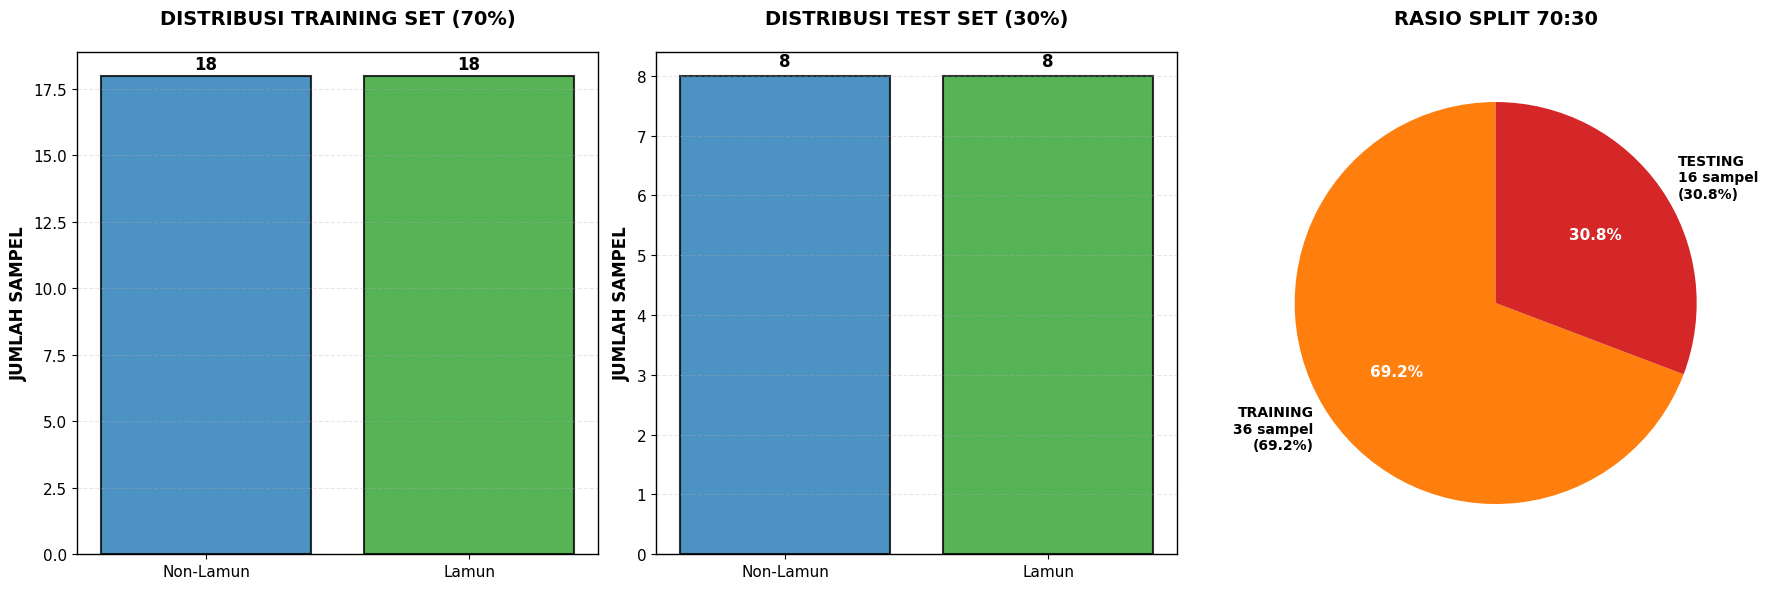


STATISTIK SPLIT DATASET
Total Dataset: 52 samples
Training Set (70%): 36 samples
Test Set (30%): 16 samples

Distribusi Kelas Training:
  - Non-Lamun: 18 samples
  - Lamun: 18 samples

Distribusi Kelas Testing:
  - Non-Lamun: 8 samples
  - Lamun: 8 samples

VISUALISASI SPLIT BERHASIL DITAMPILKAN

SPLIT PIPELINE BERHASIL DIJALANKAN
✅ File output berisi SEMUA parameter dari dataset asli
✅ Struktur kolom identik dengan file original
✅ Siap untuk training model dan analisis lanjutan

FINAL RESULTS:
Dataset Balanced: 52 samples
Training Set (70%): 36 samples
Test Set (30%): 16 samples

File Output:
Training: dataset_seimbang_landsat_52_pixel_train_70.csv
Testing: dataset_seimbang_landsat_52_pixel_test_30.csv

Validasi Split:
Total: 52 samples
Training: 36 samples (69.2%)
Testing: 16 samples (30.8%)

Features yang digunakan untuk training: ['Row', 'Col', 'Band_2', 'Band_3', 'Band_4', 'Band_5']
Semua kolom yang disimpan: ['Pixel_ID', 'Row', 'Col', 'Band_2', 'Band_3', 'Band_4', 'Band_5', 'Are

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set style untuk background terang
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

class DataSplitter:
    """
    Class untuk melakukan split training-testing dari dataset balanced
    """
    
    def __init__(self, csv_path, random_state=42):
        """
        Inisialisasi Data Splitter
        
        Parameters:
        - csv_path: path ke file CSV dataset balanced
        - random_state: untuk reproducibility
        """
        self.csv_path = csv_path
        self.random_state = random_state
        self.df = None
        self.label_column = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    def load_balanced_data(self):
        """
        Step 1: Load data balanced yang sudah di-sampling
        """
        print("=" * 60)
        print("STEP 1: LOADING DATASET BALANCED")
        print("=" * 60)
        
        # Load dataset balanced - coba kedua delimiter (; dan ,)
        try:
            self.df = pd.read_csv(self.csv_path, delimiter=';')
            print(f"Berhasil load dataset dengan delimiter semicolon: {self.csv_path}")
        except:
            try:
                self.df = pd.read_csv(self.csv_path, delimiter=',')
                print(f"Berhasil load dataset dengan delimiter comma: {self.csv_path}")
            except Exception as e:
                print(f"Error loading dataset: {e}")
                return None
        
        print(f"Shape dataset: {self.df.shape}")
        print(f"Kolom dataset: {list(self.df.columns)}")
        
        # Deteksi kolom label - coba beberapa kemungkinan nama kolom
        possible_label_columns = ['Label', 'label', 'LABEL', 'Kategori', 'kategori']
        self.label_column = None
        
        for col in possible_label_columns:
            if col in self.df.columns:
                self.label_column = col
                break
                
        if self.label_column is None:
            print("Error: Tidak ada kolom label yang terdeteksi")
            print(f"Kolom yang tersedia: {list(self.df.columns)}")
            return None
        
        print(f"Kolom label terdeteksi: {self.label_column}")
        
        # Analisis dataset balanced
        total_samples = len(self.df)
        lamun_samples = len(self.df[self.df[self.label_column] == 1])
        non_lamun_samples = len(self.df[self.df[self.label_column] == 0])
        
        print("\nANALISIS DATASET BALANCED:")
        print(f"Total samples: {total_samples}")
        print(f"Lamun (Kelas 1): {lamun_samples}")
        print(f"Non-Lamun (Kelas 0): {non_lamun_samples}")
        
        if lamun_samples > 0:
            print(f"Balance ratio: 1:{non_lamun_samples/lamun_samples:.1f}")
        
        # Tampilkan beberapa sample
        print(f"\n5 SAMPLE PERTAMA:")
        print(self.df.head())
        
        return self.df
    
    def prepare_features(self):
        """
        Persiapan features untuk training - sesuaikan dengan dataset kita
        """
        print("\n" + "=" * 60)
        print("PREPARASI FEATURES UNTUK TRAINING")
        print("=" * 60)
        
        if self.df is None:
            print("Error: Dataset belum diload!")
            return None
        
        # Kolom yang akan di-drop (bukan features)
        columns_to_drop = [self.label_column, 'Pixel_ID', 'Kategori', 'Kategori_Detail', 'Area']
        
        # Hapus kolom yang tidak ada
        existing_columns_to_drop = [col for col in columns_to_drop if col in self.df.columns]
        
        # Features: semua kolom numerik kecuali yang di-drop
        feature_columns = [col for col in self.df.columns 
                          if col not in existing_columns_to_drop 
                          and self.df[col].dtype in ['int64', 'float64']]
        
        print(f"Kolom yang akan di-drop: {existing_columns_to_drop}")
        print(f"Feature columns: {feature_columns}")
        
        # Pisahkan features dan target
        X = self.df[feature_columns]
        y = self.df[self.label_column]
        
        print(f"\nShape features (X): {X.shape}")
        print(f"Shape target (y): {y.shape}")
        print(f"Features: {list(X.columns)}")
        
        return X, y
    
    def split_train_test(self, test_size=0.3):
        """
        Step 2: Split data menjadi training dan testing dengan ratio 70:30
        """
        print("\n" + "=" * 60)
        print("STEP 2: SPLIT TRAINING-TESTING 70:30")
        print("=" * 60)
        
        if self.df is None:
            print("Error: Dataset belum diload!")
            return None
        
        # Persiapan features
        X, y = self.prepare_features()
        
        # Split data dengan stratifikasi 70:30
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, 
            test_size=test_size,           # 30% untuk testing
            stratify=y,                    # Pertahankan distribusi kelas
            random_state=self.random_state # Reproducibility
        )
        
        print("SPLIT DATA 70:30 BERHASIL:")
        print(f"Features shape: {X.shape}")
        print(f"Training set (70%): {len(self.X_train)} samples")
        print(f"Test set (30%): {len(self.X_test)} samples")
        
        # Distribusi kelas di training set
        train_lamun = (self.y_train == 1).sum()
        train_non_lamun = (self.y_train == 0).sum()
        print(f"\nDISTRIBUSI TRAINING SET (70%):")
        print(f"  Lamun: {train_lamun} samples")
        print(f"  Non-Lamun: {train_non_lamun} samples")
        print(f"  Total: {len(self.X_train)} samples")
        
        # Distribusi kelas di test set
        test_lamun = (self.y_test == 1).sum()
        test_non_lamun = (self.y_test == 0).sum()
        print(f"\nDISTRIBUSI TEST SET (30%):")
        print(f"  Lamun: {test_lamun} samples")
        print(f"  Non-Lamun: {test_non_lamun} samples")
        print(f"  Total: {len(self.X_test)} samples")
        
        # Persentase
        total_balanced = len(self.df)
        print(f"\nPERSENTASE:")
        print(f"  Training: {(len(self.X_train)/total_balanced)*100:.1f}%")
        print(f"  Testing: {(len(self.X_test)/total_balanced)*100:.1f}%")
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def save_train_test_sets(self):
        """
        Step 3: Simpan dataset training dan testing terpisah
        DENGAN SEMUA KOLOM ASLI dari dataset balanced
        """
        print("\n" + "=" * 60)
        print("STEP 3: MENYIMPAN DATASET TRAINING & TESTING")
        print("=" * 60)
        
        if self.X_train is None:
            print("Error: Split data belum dilakukan!")
            return None
        
        # REKONSTRUKSI DENGAN SEMUA KOLOM ASLI
        # Training set: ambil semua baris yang termasuk dalam training
        train_indices = self.X_train.index
        train_set = self.df.loc[train_indices].copy()
        
        # Testing set: ambil semua baris yang termasuk dalam testing  
        test_indices = self.X_test.index
        test_set = self.df.loc[test_indices].copy()
        
        print(f"Training set diambil dari {len(train_indices)} baris asli")
        print(f"Testing set diambil dari {len(test_indices)} baris asli")
        
        # Generate output paths
        import os
        input_dir = os.path.dirname(self.csv_path)
        input_filename = os.path.basename(self.csv_path)
        
        # Remove extension and add train/test suffixes
        base_name = input_filename.replace('.csv', '')
        train_path = os.path.join(input_dir, f"{base_name}_train_70.csv")
        test_path = os.path.join(input_dir, f"{base_name}_test_30.csv")
        
        # Simpan dengan struktur kolom sama persis seperti aslinya
        # Gunakan delimiter yang sama dengan file asli
        try:
            # Coba delimiter semicolon dulu
            pd.read_csv(self.csv_path, delimiter=';')
            delimiter = ';'
        except:
            delimiter = ','
        
        train_set.to_csv(train_path, index=False, sep=delimiter)
        test_set.to_csv(test_path, index=False, sep=delimiter)
        
        print(f"Dataset Training (70%) disimpan sebagai: {train_path}")
        print(f"Dataset Testing (30%) disimpan sebagai: {test_path}")
        
        # Tampilkan informasi file
        print(f"\nINFORMASI FILE:")
        print(f"Training set: {len(train_set)} samples, {train_set.shape[1]} kolom")
        print(f"Test set: {len(test_set)} samples, {test_set.shape[1]} kolom")
        print(f"Struktur kolom sama persis dengan file asli")
        print(f"Delimiter yang digunakan: '{delimiter}'")
        
        # Tampilkan SEMUA kolom yang tersimpan
        print(f"\nSTRUKTUR KOLOM LENGKAP:")
        print(f"Semua kolom training: {list(train_set.columns)}")
        print(f"Semua kolom testing: {list(test_set.columns)}")
        
        # Tampilkan sample untuk memastikan semua data ada
        print(f"\nSAMPLE TRAINING SET (3 baris pertama):")
        print(train_set.head(3))
        print(f"\nSAMPLE TESTING SET (3 baris pertama):")
        print(test_set.head(3))
        
        # Validasi bahwa semua kolom asli ada
        original_columns = set(self.df.columns)
        train_columns = set(train_set.columns)
        test_columns = set(test_set.columns)
        
        if original_columns == train_columns == test_columns:
            print(f"✅ VALIDASI: Semua kolom asli berhasil disimpan di kedua file")
        else:
            print(f"⚠️  PERINGATAN: Ada perbedaan kolom antara file asli dan hasil split")
            print(f"   Asli: {original_columns}")
            print(f"   Training: {train_columns}")
            print(f"   Testing: {test_columns}")
        
        return train_path, test_path
    
    def visualize_split(self):
        """
        Visualisasi distribusi training dan testing dengan background terang
        """
        if self.X_train is None:
            print("Error: Split data belum dilakukan!")
            return
        
        # Hitung distribusi
        train_lamun = (self.y_train == 1).sum()
        train_non_lamun = (self.y_train == 0).sum()
        test_lamun = (self.y_test == 1).sum()
        test_non_lamun = (self.y_test == 0).sum()
        total_samples = len(self.df)
        train_samples = len(self.X_train)
        test_samples = len(self.X_test)
        
        # Buat figure dengan 3 subplot
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
        fig.patch.set_facecolor('white')
        
        # Plot 1: Training set distribution
        categories_train = ['Non-Lamun', 'Lamun']
        values_train = [train_non_lamun, train_lamun]
        colors_train = ['#1f77b4', '#2ca02c']
        
        bars1 = ax1.bar(categories_train, values_train, color=colors_train,
                       edgecolor='black', linewidth=1.5, alpha=0.8)
        ax1.set_title('DISTRIBUSI TRAINING SET (70%)', fontsize=14, fontweight='bold', color='black', pad=20)
        ax1.set_ylabel('JUMLAH SAMPEL', fontsize=12, color='black', fontweight='bold')
        ax1.grid(axis='y', alpha=0.3, linestyle='--')
        ax1.set_facecolor('white')
        ax1.tick_params(colors='black', labelsize=11)
        
        # Tambah nilai di atas bar
        for bar, value in zip(bars1, values_train):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(value)}', ha='center', va='bottom', 
                    color='black', fontweight='bold', fontsize=12)
        
        # Plot 2: Test set distribution
        categories_test = ['Non-Lamun', 'Lamun']
        values_test = [test_non_lamun, test_lamun]
        colors_test = ['#1f77b4', '#2ca02c']
        
        bars2 = ax2.bar(categories_test, values_test, color=colors_test,
                       edgecolor='black', linewidth=1.5, alpha=0.8)
        ax2.set_title('DISTRIBUSI TEST SET (30%)', fontsize=14, fontweight='bold', color='black', pad=20)
        ax2.set_ylabel('JUMLAH SAMPEL', fontsize=12, color='black', fontweight='bold')
        ax2.grid(axis='y', alpha=0.3, linestyle='--')
        ax2.set_facecolor('white')
        ax2.tick_params(colors='black', labelsize=11)
        
        for bar, value in zip(bars2, values_test):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(value)}', ha='center', va='bottom', 
                    color='black', fontweight='bold', fontsize=12)
        
        # Plot 3: Split ratio pie chart
        sizes = [train_samples, test_samples]
        labels = [f'TRAINING\n{train_samples} sampel\n({train_samples/total_samples*100:.1f}%)', 
                 f'TESTING\n{test_samples} sampel\n({test_samples/total_samples*100:.1f}%)']
        colors_pie = ['#ff7f0e', '#d62728']
        
        wedges, texts, autotexts = ax3.pie(sizes, labels=labels, colors=colors_pie, 
                                          autopct='%1.1f%%', startangle=90,
                                          textprops={'fontsize': 10, 'fontweight': 'bold'})
        
        # Perbaiki tampilan teks pada pie chart
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(11)
        
        for text in texts:
            text.set_fontsize(10)
            text.set_fontweight('bold')
        
        ax3.set_title('RASIO SPLIT 70:30', fontsize=14, fontweight='bold', color='black', pad=20)
        
        # Set background putih untuk semua subplot dan tambah border
        for ax in [ax1, ax2, ax3]:
            ax.set_facecolor('white')
            for spine in ax.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1)
        
        plt.tight_layout()
        plt.show()
        
        # Tampilkan statistik
        print("\n" + "="*50)
        print("STATISTIK SPLIT DATASET")
        print("="*50)
        print(f"Total Dataset: {total_samples} samples")
        print(f"Training Set (70%): {train_samples} samples")
        print(f"Test Set (30%): {test_samples} samples")
        print(f"\nDistribusi Kelas Training:")
        print(f"  - Non-Lamun: {train_non_lamun} samples")
        print(f"  - Lamun: {train_lamun} samples")
        print(f"\nDistribusi Kelas Testing:")
        print(f"  - Non-Lamun: {test_non_lamun} samples")
        print(f"  - Lamun: {test_lamun} samples")
        
        print("\nVISUALISASI SPLIT BERHASIL DITAMPILKAN")
    
    def run_split_pipeline(self, test_size=0.3):
        """
        Jalankan complete split pipeline
        """
        print("MEMULAI SPLIT PIPELINE - TRAINING TESTING 70:30")
        print("=" * 70)
        
        try:
            # Step 1: Load data balanced
            self.load_balanced_data()
            
            # Step 2: Split data
            self.split_train_test(test_size)
            
            # Step 3: Save results - DENGAN SEMUA KOLOM ASLI
            train_path, test_path = self.save_train_test_sets()
            
            # Step 4: Visualisasi
            self.visualize_split()
            
            print("\n" + "=" * 70)
            print("SPLIT PIPELINE BERHASIL DIJALANKAN")
            print("=" * 70)
            print("✅ File output berisi SEMUA parameter dari dataset asli")
            print("✅ Struktur kolom identik dengan file original")
            print("✅ Siap untuk training model dan analisis lanjutan")
            
            return train_path, test_path
            
        except Exception as e:
            print(f"Error dalam menjalankan pipeline: {e}")
            raise


# =============================================================================
# FUNGSI UTAMA DAN EKSEKUSI
# =============================================================================

def main():
    """
    Fungsi utama untuk menjalankan program split
    """
    # Konfigurasi - GANTI dengan path dataset balanced Landsat Anda
    # Coba kedua kemungkinan file output dari proses sebelumnya
    possible_paths = [
        "dataset_seimbang_landsat_52_pixel.csv",  # Output dari sampling Landsat
        "dataset_seimbang_landsat_*.csv",         # Pattern umum Landsat
        "*landsat*.csv"                           # Semua file Landsat
    ]
    
    import glob
    BALANCED_CSV_PATH = None
    for path in possible_paths:
        if '*' in path:
            matching_files = glob.glob(path)
            if matching_files:
                BALANCED_CSV_PATH = matching_files[0]
                print(f"Dataset ditemukan: {BALANCED_CSV_PATH}")
                break
        else:
            try:
                pd.read_csv(path)
                BALANCED_CSV_PATH = path
                print(f"Dataset ditemukan: {path}")
                break
            except:
                continue
    
    if BALANCED_CSV_PATH is None:
        print("Tidak ada dataset Landsat yang ditemukan. Pastikan file dataset sudah ada.")
        return
    
    RANDOM_STATE = 42
    
    print("PROGRAM SPLIT TRAINING-TESTING 70:30 - LANDSAT")
    print("=" * 70)
    print(f"Dataset Balanced: {BALANCED_CSV_PATH}")
    print("Konfigurasi: Split 70% Training - 30% Testing")
    print("Fitur: SEMUA parameter/kolom asli akan disimpan")
    print("=" * 70)
    
    # Inisialisasi splitter
    splitter = DataSplitter(BALANCED_CSV_PATH, RANDOM_STATE)
    
    # Jalankan split pipeline dengan test_size=0.3 (30% testing)
    try:
        train_path, test_path = splitter.run_split_pipeline(test_size=0.3)
        
        print("\nFINAL RESULTS:")
        print("=" * 50)
        print(f"Dataset Balanced: {len(splitter.df)} samples")
        print(f"Training Set (70%): {len(splitter.X_train)} samples")
        print(f"Test Set (30%): {len(splitter.X_test)} samples")
        
        print(f"\nFile Output:")
        print(f"Training: {train_path}")
        print(f"Testing: {test_path}")
        
        # Validasi split
        total_balanced = len(splitter.df)
        train_count = len(splitter.X_train)
        test_count = len(splitter.X_test)
        
        print(f"\nValidasi Split:")
        print(f"Total: {total_balanced} samples")
        print(f"Training: {train_count} samples ({train_count/total_balanced*100:.1f}%)")
        print(f"Testing: {test_count} samples ({test_count/total_balanced*100:.1f}%)")
        
        print(f"\nFeatures yang digunakan untuk training: {list(splitter.X_train.columns)}")
        print(f"Semua kolom yang disimpan: {list(splitter.df.columns)}")
        
        # Tampilkan perbandingan kolom
        print(f"\nPERBANDINGAN KOLOM:")
        print(f"✅ Kolom asli: {len(splitter.df.columns)} kolom")
        print(f"✅ Kolom training: {len(pd.read_csv(train_path).columns)} kolom") 
        print(f"✅ Kolom testing: {len(pd.read_csv(test_path).columns)} kolom")
        
    except FileNotFoundError:
        print(f"File tidak ditemukan: {BALANCED_CSV_PATH}")
        print("Pastikan file dataset balanced sudah ada!")
    except Exception as e:
        print(f"Error: {e}")


# =============================================================================
# FUNGSI SIMPLE (ALTERNATIF) - JUGA DIPERBAIKI
# =============================================================================

def simple_split_only(csv_path, test_size=0.3):
    """
    Fungsi simple hanya untuk split training-testing
    DENGAN SEMUA KOLOM ASLI
    """
    print("SIMPLE SPLIT 70:30 - SEMUA KOLOM ASLI")
    print("=" * 50)
    
    # Load data balanced - coba kedua delimiter
    try:
        df = pd.read_csv(csv_path, delimiter=';')
        print(f"Loaded with semicolon delimiter: {csv_path}")
    except:
        df = pd.read_csv(csv_path, delimiter=',')
        print(f"Loaded with comma delimiter: {csv_path}")
    
    # Deteksi kolom label
    label_col = None
    for col in ['Label', 'label', 'LABEL']:
        if col in df.columns:
            label_col = col
            break
    
    if label_col is None:
        print("Error: Label column not found!")
        return None
    
    # Features: semua kolom numerik kecuali label dan kolom non-feature
    non_feature_cols = [label_col, 'Pixel_ID', 'Kategori', 'Kategori_Detail', 'Area']
    feature_cols = [col for col in df.columns 
                   if col not in non_feature_cols 
                   and df[col].dtype in ['int64', 'float64']]
    
    X = df[feature_cols]
    y = df[label_col]
    
    print(f"Features: {feature_cols}")
    print(f"Target: {label_col}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )
    
    # Gabungkan kembali dengan SEMUA KOLOM ASLI
    train_set = df.loc[X_train.index].copy()
    test_set = df.loc[X_test.index].copy()
    
    # Save
    import os
    input_dir = os.path.dirname(csv_path)
    base_name = os.path.basename(csv_path).replace('.csv', '')
    
    train_path = os.path.join(input_dir, f"{base_name}_train_70.csv")
    test_path = os.path.join(input_dir, f"{base_name}_test_30.csv")
    
    # Gunakan delimiter yang sama dengan file asli
    try:
        pd.read_csv(csv_path, delimiter=';')
        delimiter = ';'
    except:
        delimiter = ','
    
    train_set.to_csv(train_path, index=False, sep=delimiter)
    test_set.to_csv(test_path, index=False, sep=delimiter)
    
    print("\nSimple Split 70:30 Completed:")
    print(f"Training: {len(train_set)} samples, {train_set.shape[1]} kolom")
    print(f"Testing: {len(test_set)} samples, {test_set.shape[1]} kolom")
    print(f"Training file: {train_path}")
    print(f"Testing file: {test_path}")
    print(f"Delimiter: '{delimiter}'")
    print(f"✅ Semua {df.shape[1]} kolom asli berhasil disimpan")
    
    return train_path, test_path


if __name__ == "__main__":
    # Jalankan program utama
    main()
    
    # Alternatif: jalankan versi simple saja
    # simple_split_only("dataset_seimbang_landsat_52_pixel.csv")

## Random Forest Landsat


RANDOM FOREST CLASSIFICATION FOR LAMUN DETECTION - LANDSAT
Training data: dataset_seimbang_landsat_52_pixel_train_70.csv
Testing data: dataset_seimbang_landsat_52_pixel_test_30.csv
Output directory: rf_lamun_results_landsat
Model: Random Forest (n_estimators=200, max_depth=None)
RANDOM FOREST CLASSIFICATION PIPELINE - LANDSAT
STEP 1: LOADING TRAINING & TESTING DATA - LANDSAT
✅ Loaded with semicolon delimiter
Training data shape (original): (36, 11)
Testing data shape  (original): (16, 11)

Kolom training: ['Pixel_ID', 'Row', 'Col', 'Band_2', 'Band_3', 'Band_4', 'Band_5', 'Area', 'Label', 'Kategori', 'Kategori_Detail']
Kolom testing: ['Pixel_ID', 'Row', 'Col', 'Band_2', 'Band_3', 'Band_4', 'Band_5', 'Area', 'Label', 'Kategori', 'Kategori_Detail']

🔍 Tipe data training (sebelum processing):
Pixel_ID             int64
Row                  int64
Col                  int64
Band_2             float64
Band_3             float64
Band_4             float64
Band_5             float64
Area      

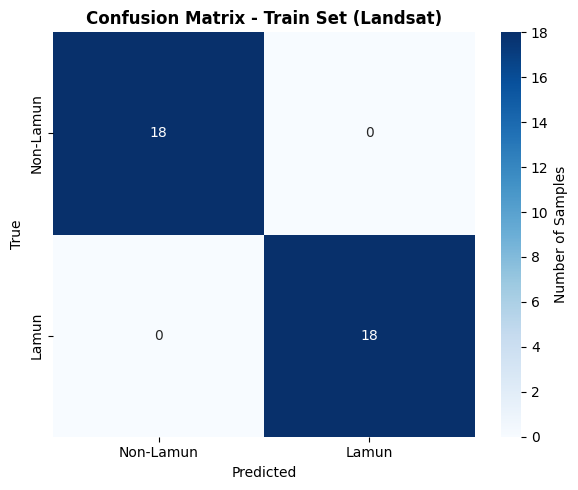

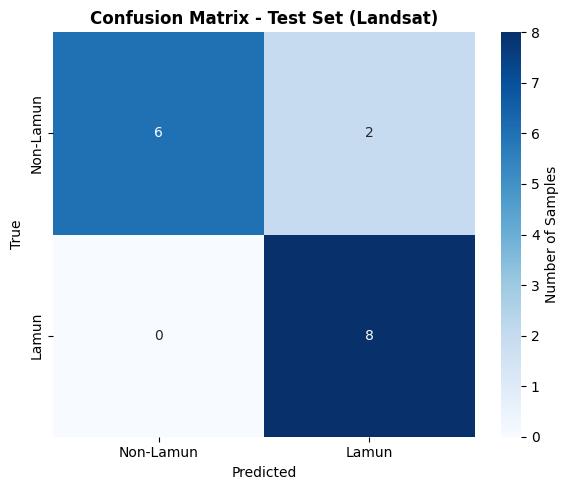

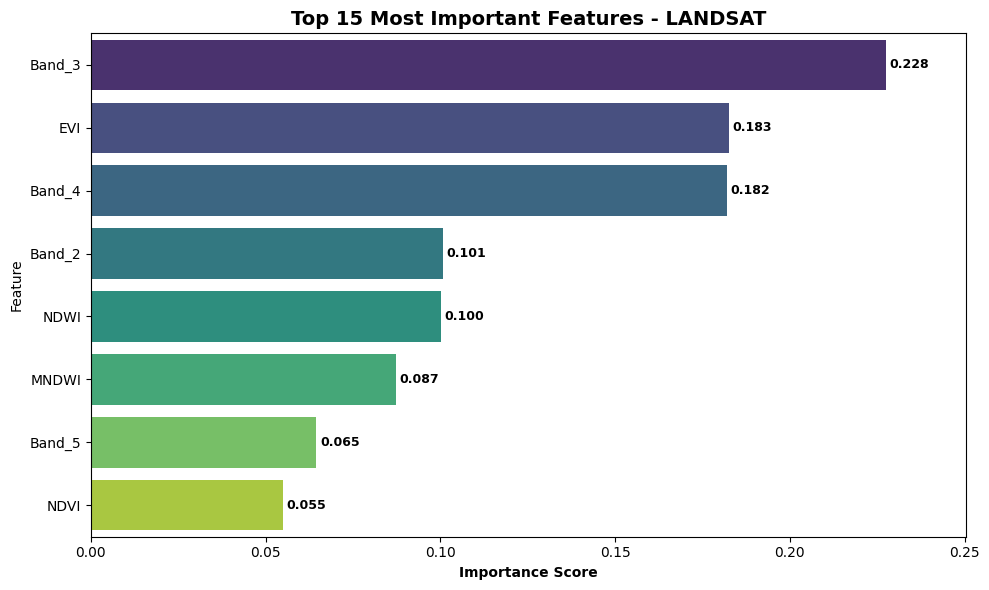

✅ Feature importance saved to: rf_lamun_results_landsat\feature_importance.csv

📊 Creating Performance Comparison Plot...


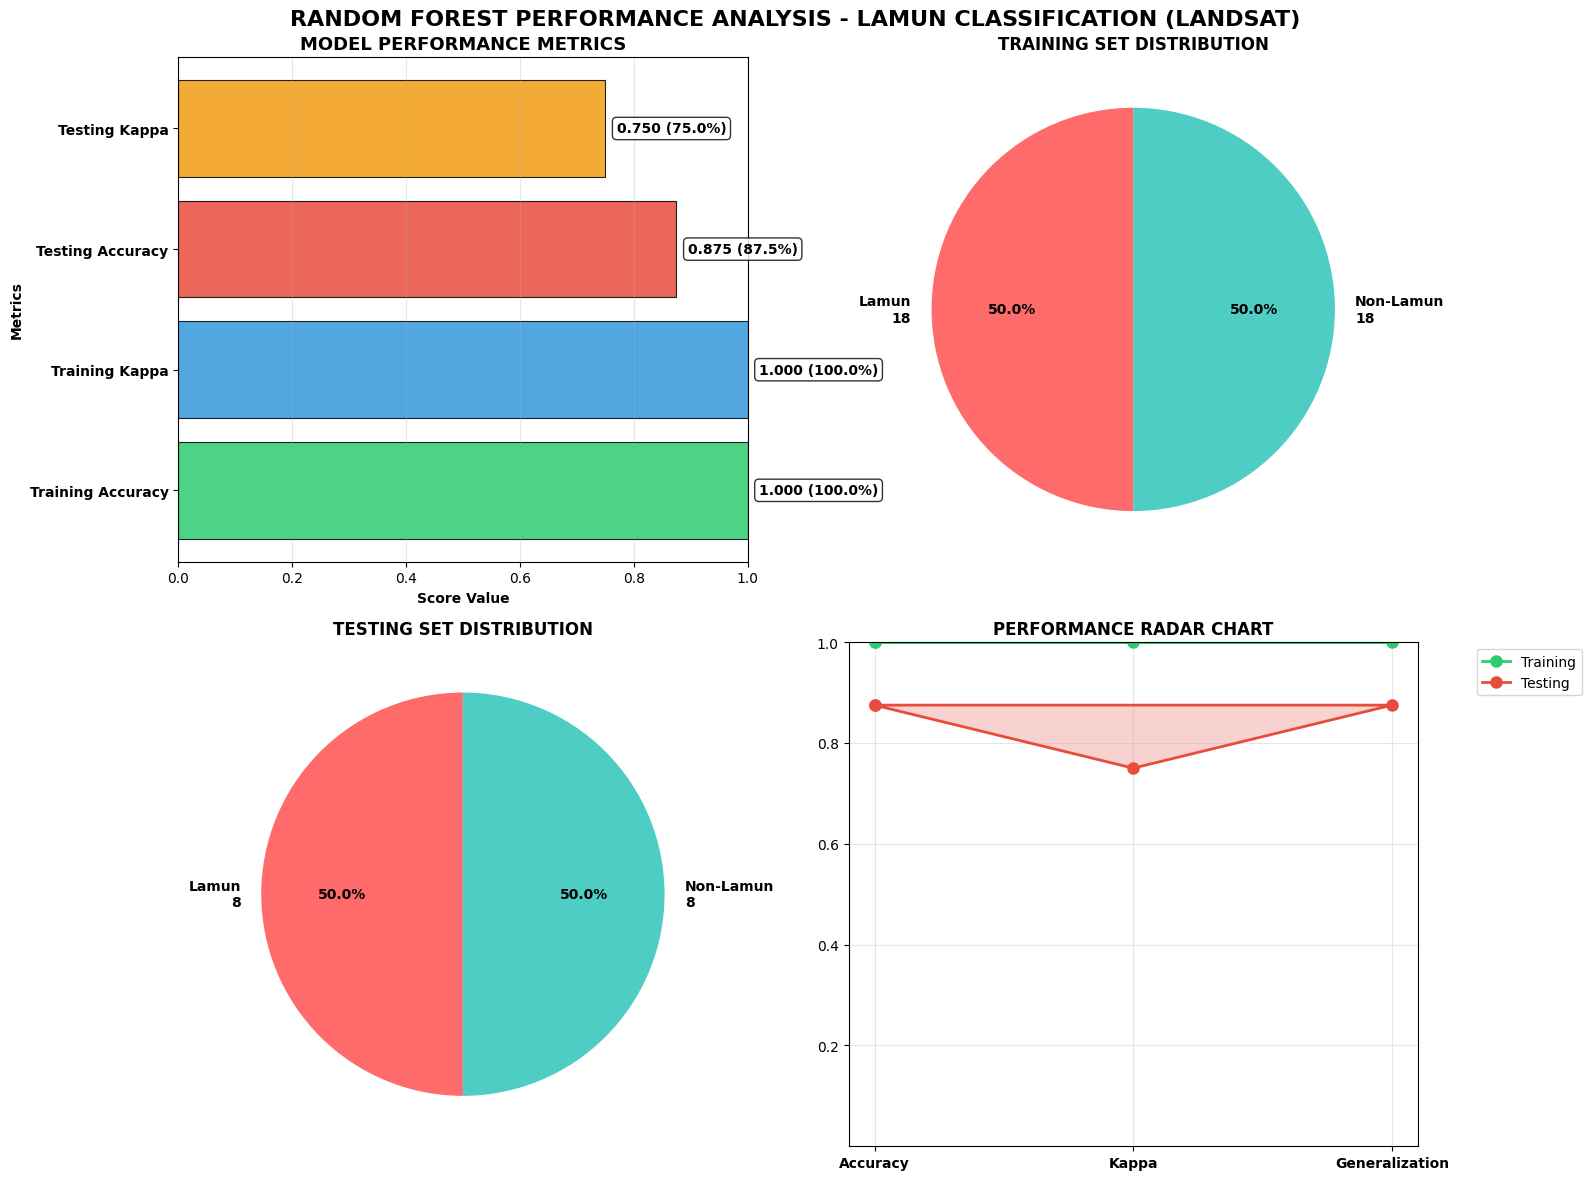


📈 PERFORMANCE INSIGHTS - LANDSAT
Training Accuracy: 1.000 (100.0%)
Testing Accuracy : 0.875 (87.5%)
Accuracy Gap     : 0.125
Training Kappa   : 1.000
Testing Kappa    : 0.750
Kappa Gap        : 0.250
Generalization   : 0.875 (GOOD)

STEP 6: PRECISION, RECALL, F1-SCORE PER KELAS - LANDSAT

📊 DETAILED METRICS PER CLASS - LANDSAT:
--------------------------------------------------
🔸 Kelas 0:
   Precision: 1.000
   Recall   : 0.750
   F1-Score : 0.857
   Support  : 8.0 samples
🔸 Kelas 1:
   Precision: 0.800
   Recall   : 1.000
   F1-Score : 0.889
   Support  : 8.0 samples


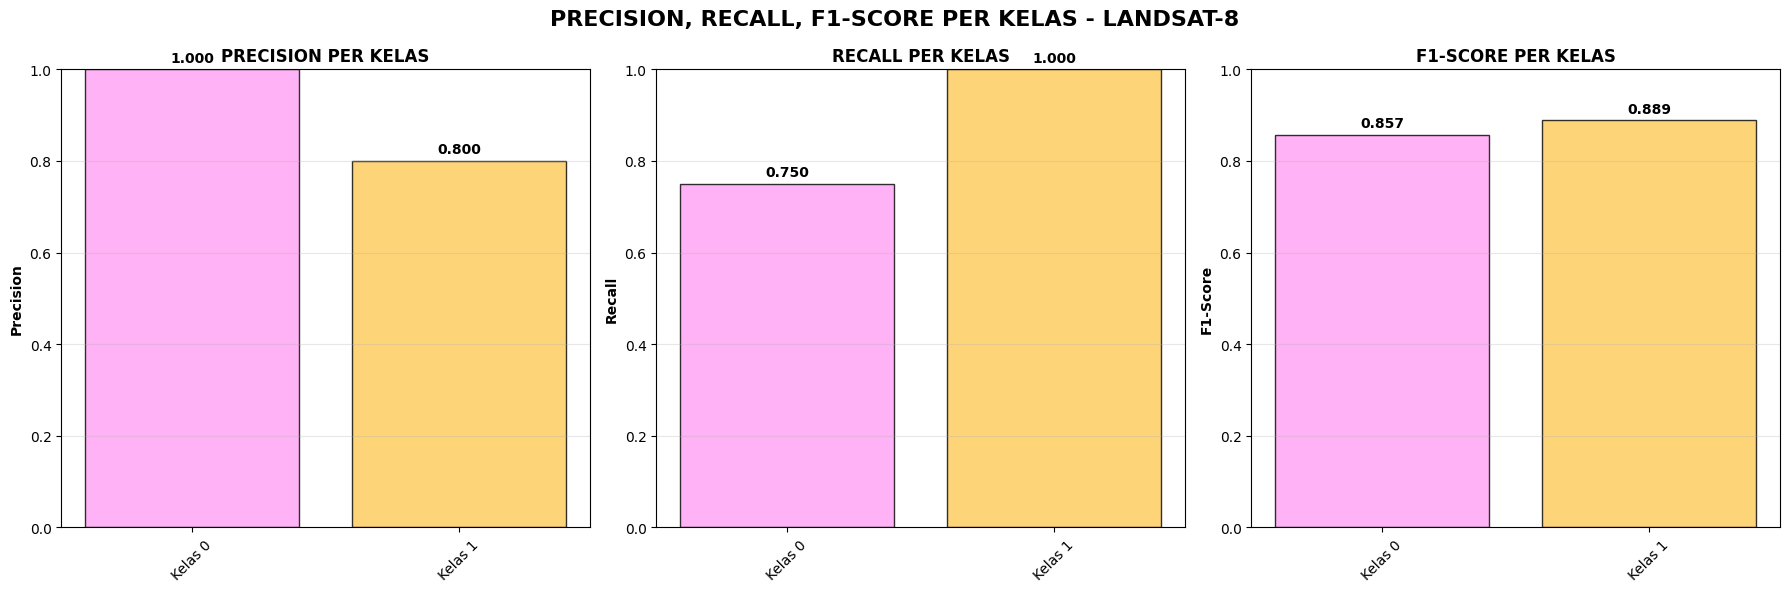

✅ Precision, Recall, F1-Score per kelas disimpan ke: rf_lamun_results_landsat\precision_recall_f1_per_class.csv

✅ Evaluation summary saved to: rf_lamun_results_landsat\evaluation_summary.csv
✅ Classification report saved to: rf_lamun_results_landsat\classification_report.csv

📊 DETAILED PERFORMANCE SUMMARY - LANDSAT

🎯 OVERALL ACCURACY (OA):
   Training OA: 1.0000 (100.00%)
   Testing OA : 0.8750 (87.50%)

📈 COHEN'S KAPPA COEFFICIENT:
   Training Kappa: 1.0000
   Testing Kappa : 0.7500

💪 GENERALIZATION PERFORMANCE:
   Train-Test Gap: 0.1250 ⚠️
   Generalization: NEEDS IMPROVEMENT

🏆 TOP 5 FEATURES:
   Band_3: 0.2275
   EVI: 0.1827
   Band_4: 0.1821
   Band_2: 0.1007
   NDWI: 0.1002

🎉 RANDOM FOREST PIPELINE BERHASIL DISELESAIKAN! - LANDSAT
📁 Hasil disimpan di folder: rf_lamun_results_landsat
📊 File output:
   - evaluation_summary.csv
   - classification_report.csv
   - feature_importance.csv
   - precision_recall_f1_per_class.csv
   - model_landsat.joblib
   - scaler_landsat.joblib



In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report, confusion_matrix
import warnings
import joblib  # <-- TAMBAHAN IMPORT
import glob    # <-- TAMBAHAN IMPORT

warnings.filterwarnings('ignore')

# Set style untuk background terang
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

class RandomForestTrainerLandsat:
    """
    Enhanced RandomForestTrainer for Landsat:
    - Automatically detects Landsat band columns
    - Optionally computes spectral indices if required bands available
    - Trains RF, evaluates on train+test, plots and saves feature importance + summary CSVs
    """
    def __init__(self, train_path, test_path, output_dir='rf_lamun_results_landsat', random_state=42):
        self.train_path = train_path
        self.test_path = test_path
        self.output_dir = output_dir
        os.makedirs(self.output_dir, exist_ok=True)
        self.random_state = random_state
        self.model = None
        self.scaler = None
        self.label_encoders = {}
        self.importance_df = None
        self.train_eval = None
        self.test_eval = None
        self.X_train_unscaled_features = None # Simpan nama fitur asli

    # --------------------------
    # Utilities
    # --------------------------
    @staticmethod
    def _is_metadata_col(col):
        meta_keywords = ['kategori','category','pixel','pixel_id','id','row','col','x','y','lon','long','lng','latitude','lat','longitude']
        c = col.lower()
        return any(k in c for k in meta_keywords)

    def _detect_spectral_columns(self, df):
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        spectral = [c for c in numeric_cols if not self._is_metadata_col(c) and c.lower() != 'label']
        return spectral

    def _safe_convert_to_numeric(self, df, columns):
        """Konversi kolom ke numeric dengan handling error yang lebih baik"""
        df_copy = df.copy()
        for col in columns:
            if col in df_copy.columns:
                # Konversi ke numeric, non-numeric jadi NaN
                df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
                
                # Cek jika ada nilai yang masih NaN setelah konversi
                nan_count = df_copy[col].isna().sum()
                if nan_count > 0:
                    print(f"⚠️  Peringatan: {nan_count} nilai NaN di kolom {col} setelah konversi")
                    
        return df_copy

    def _safe_divide(self, numerator, denominator):
        """Division yang aman untuk menghindari division by zero"""
        with np.errstate(divide='ignore', invalid='ignore'):
            result = np.divide(numerator, denominator)
            result[~np.isfinite(result)] = np.nan
        return result

    def _compute_indices(self, df):
        """
        Compute spectral indices khusus untuk Landsat dengan handling type safety
        Landsat bands: Band_2 (Blue), Band_3 (Green), Band_4 (Red), Band_5 (NIR)
        """
        try:
            added = []
            df_copy = df.copy()
            colset = set([c.lower() for c in df_copy.columns])

            def find_col(possible_names):
                for name in possible_names:
                    if name.lower() in colset:
                        for c in df_copy.columns:
                            if c.lower() == name.lower():
                                return c
                return None

            # Landsat bands
            b2 = find_col(['B2','Band_2','blue','b02','b02_reflectance'])  # Blue
            b3 = find_col(['B3','Band_3','green','b03','b03_reflectance'])  # Green
            b4 = find_col(['B4','Band_4','red','b04','b04_reflectance'])    # Red
            b5 = find_col(['B5','Band_5','nir','b05','b05_reflectance'])    # NIR

            print(f"🔍 Band yang terdeteksi: B2={b2}, B3={b3}, B4={b4}, B5={b5}")

            # Konversi semua band ke numeric terlebih dahulu
            band_cols = [col for col in [b2, b3, b4, b5] if col is not None]
            df_copy = self._safe_convert_to_numeric(df_copy, band_cols)

            # NDVI - Normalized Difference Vegetation Index (NIR - Red) / (NIR + Red)
            if b5 and b4:
                ndvi_numerator = df_copy[b5] - df_copy[b4]
                ndvi_denominator = df_copy[b5] + df_copy[b4]
                df_copy['NDVI'] = self._safe_divide(ndvi_numerator, ndvi_denominator)
                added.append('NDVI')
                print(f"✅ NDVI berhasil dihitung")
            
            # NDWI - Normalized Difference Water Index (Green - NIR) / (Green + NIR)
            if b3 and b5:
                ndwi_numerator = df_copy[b3] - df_copy[b5]
                ndwi_denominator = df_copy[b3] + df_copy[b5]
                df_copy['NDWI'] = self._safe_divide(ndwi_numerator, ndwi_denominator)
                added.append('NDWI')
                print(f"✅ NDWI berhasil dihitung")
            
            # MNDWI - Modified NDWI (Green - SWIR) / (Green + SWIR)
            # Di Landsat 8, SWIR 1 adalah Band 6, tapi di data Anda Band 5 (NIR)
            # Kita gunakan Band 5 (NIR) sebagai pengganti SWIR untuk konsistensi
            if b3 and b5:
                mndwi_numerator = df_copy[b3] - df_copy[b5]
                mndwi_denominator = df_copy[b3] + df_copy[b5]
                df_copy['MNDWI'] = self._safe_divide(mndwi_numerator, mndwi_denominator)
                added.append('MNDWI')
                print(f"✅ MNDWI berhasil dihitung (menggunakan B3 dan B5)")
            
            # EVI - Enhanced Vegetation Index
            if b5 and b4 and b2:
                evi_numerator = df_copy[b5] - df_copy[b4]
                evi_denominator = df_copy[b5] + 6 * df_copy[b4] - 7.5 * df_copy[b2] + 1
                df_copy['EVI'] = 2.5 * self._safe_divide(evi_numerator, evi_denominator)
                added.append('EVI')
                print(f"✅ EVI berhasil dihitung")

            if not added:
                print("⚠️  Tidak ada spectral indices yang berhasil dihitung")
            else:
                print(f"✅ Spectral indices yang ditambahkan: {added}")

            return df_copy, added

        except Exception as e:
            print(f"❌ Error dalam _compute_indices: {str(e)}")
            print("🔍 Debug info - tipe data kolom band:")
            for col in ['Band_2', 'Band_3', 'Band_4', 'Band_5']:
                if col in df.columns:
                    print(f"   {col}: {df[col].dtype}, sample: {df[col].head(2).tolist()}")
            # Return original dataframe tanpa indices jika error
            return df, []

    # --------------------------
    # STEP 1 - LOAD & CLEAN
    # --------------------------
    def load_data(self, compute_indices=True):
        print("=" * 70)
        print("STEP 1: LOADING TRAINING & TESTING DATA - LANDSAT")
        print("=" * 70)

        # Coba kedua delimiter
        try:
            train_data = pd.read_csv(self.train_path, delimiter=';')
            test_data = pd.read_csv(self.test_path, delimiter=';')
            print("✅ Loaded with semicolon delimiter")
        except:
            try:
                train_data = pd.read_csv(self.train_path, delimiter=',')
                test_data = pd.read_csv(self.test_path, delimiter=',')
                print("✅ Loaded with comma delimiter")
            except Exception as e:
                print(f"❌ Gagal load data: {e}")
                raise

        print(f"Training data shape (original): {train_data.shape}")
        print(f"Testing data shape  (original): {test_data.shape}")

        # Tampilkan kolom yang tersedia
        print(f"\nKolom training: {list(train_data.columns)}")
        print(f"Kolom testing: {list(test_data.columns)}")

        # Cek tipe data sebelum processing
        print("\n🔍 Tipe data training (sebelum processing):")
        print(train_data.dtypes)

        drop_candidates = [c for c in train_data.columns if self._is_metadata_col(c)]
        if drop_candidates:
            print(f"Removing metadata columns: {drop_candidates}")
            train_data = train_data.drop(columns=drop_candidates, errors='ignore')
            test_data = test_data.drop(columns=drop_candidates, errors='ignore')

        added_indices = []
        if compute_indices:
            print("\n🔄 Menghitung spectral indices...")
            train_data, added_idx_train = self._compute_indices(train_data)
            test_data, added_idx_test = self._compute_indices(test_data)
            added_indices = list(set(added_idx_train) & set(added_idx_test))
            if added_indices:
                print(f"✅ Spectral indices yang digunakan: {added_indices}")

        # Deteksi kolom label
        label_col = None
        for col in ['Label', 'label', 'LABEL']:
            if col in train_data.columns:
                label_col = col
                break
        
        if label_col is None:
            raise ValueError("Kolom 'Label' tidak ditemukan pada train/test data!")

        # Konversi label ke numeric jika diperlukan
        if train_data[label_col].dtype == 'object':
            print("🔄 Konversi label ke numeric...")
            le = LabelEncoder()
            train_data[label_col] = le.fit_transform(train_data[label_col])
            test_data[label_col] = le.transform(test_data[label_col])
            self.label_encoders['label'] = le

        spectral_train = self._detect_spectral_columns(train_data)
        spectral_test = self._detect_spectral_columns(test_data)
        spectral = [c for c in spectral_train if c in spectral_test]

        if not spectral:
            raise ValueError("Tidak ditemukan kolom spektral yang cocok antara training dan testing!")

        # Simpan nama fitur
        self.X_train_unscaled_features = spectral

        self.X_train = train_data[spectral].copy()
        self.y_train = train_data[label_col].copy()
        self.X_test = test_data[spectral].copy()
        self.y_test = test_data[label_col].copy()

        print(f"\n✅ Using {len(spectral)} spectral features for training:")
        print(f"Features: {spectral}")
        print(f"Training samples: {len(self.X_train)}")
        print(f"Testing samples: {len(self.X_test)}")
        
        # Cek distribusi label
        print(f"\n📊 Distribusi label training: {np.bincount(self.y_train)}")
        print(f"📊 Distribusi label testing: {np.bincount(self.y_test)}")
        
        return self.X_train, self.X_test, self.y_train, self.y_test

    # --------------------------
    # STEP 2 - PREPROCESSING
    # --------------------------
    def preprocess_data(self):
        print("\n" + "=" * 70)
        print("STEP 2: PREPROCESSING DATA")
        print("=" * 70)

        # Pastikan semua kolom numeric
        numeric_cols = self.X_train.select_dtypes(include=[np.number]).columns.tolist()
        non_numeric_cols = self.X_train.select_dtypes(exclude=[np.number]).columns.tolist()
        
        if non_numeric_cols:
            print(f"⚠️  Kolom non-numeric ditemukan: {non_numeric_cols}")
            print("🔄 Mengkonversi ke numeric...")
            self.X_train = self._safe_convert_to_numeric(self.X_train, non_numeric_cols)
            self.X_test = self._safe_convert_to_numeric(self.X_test, non_numeric_cols)
            numeric_cols = self.X_train.select_dtypes(include=[np.number]).columns.tolist()

        self.scaler = StandardScaler()
        self.X_train[numeric_cols] = self.scaler.fit_transform(self.X_train[numeric_cols])
        
        # === MODIFIKASI: SIMPAN SCALER ===
        scaler_path = os.path.join(self.output_dir, 'scaler_landsat.joblib')
        joblib.dump(self.scaler, scaler_path)
        print(f"✅ Scaler disimpan di: {scaler_path}")
        # === AKHIR MODIFIKASI ===
        
        self.X_test[numeric_cols] = self.scaler.transform(self.X_test[numeric_cols])

        print(f"✅ Preprocessing completed. {len(numeric_cols)} numeric features scaled.")
        return self.X_train, self.X_test

    # --------------------------
    # STEP 3 - TRAIN
    # --------------------------
    def train_random_forest(self, n_estimators=200, max_depth=None, class_weight=None):
        print("\n" + "=" * 70)
        print("STEP 3: TRAINING RANDOM FOREST")
        print("=" * 70)

        self.model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=self.random_state,
            class_weight=class_weight,
            n_jobs=-1  # Use all processors
        )
        self.model.fit(self.X_train, self.y_train)
        print("✅ Random Forest trained successfully!")
        
        # === MODIFIKASI: SIMPAN MODEL ===
        model_path = os.path.join(self.output_dir, 'model_landsat.joblib')
        joblib.dump(self.model, model_path)
        print(f"✅ Model disimpan di: {model_path}")
        # === AKHIR MODIFIKASI ===

        print(f"Model configuration:")
        print(f"- n_estimators: {n_estimators}")
        print(f"- max_depth: {max_depth}")
        print(f"- random_state: {self.random_state}")
        return self.model

    # --------------------------
    # STEP 4 - EVALUATION
    # (Semua kode di bawah ini tetap sama seperti milik Anda)
    # --------------------------
    def evaluate_dataset(self, X, y, dataset_name='Test'):
        y_pred = self.model.predict(X)
        acc = accuracy_score(y, y_pred)
        kappa = cohen_kappa_score(y, y_pred)
        report = classification_report(y, y_pred, output_dict=True)
        cm = confusion_matrix(y, y_pred)
        return {'dataset': dataset_name, 'accuracy': acc, 'kappa': kappa, 'report_dict': report, 'confusion_matrix': cm, 'y_pred': y_pred}

    def _plot_confusion_matrix(self, cm, title, labels=None):
        if labels is None:
            labels = ['Non-Lamun','Lamun']
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,
                  cbar_kws={'label': 'Number of Samples'})
        plt.title(title, fontweight='bold', fontsize=12)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()

    def plot_feature_importance(self, top_n=20, save_csv=True):
        feat_names = self.X_train.columns
        importances = self.model.feature_importances_
        self.importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, max(6, top_n*0.3)))
        bars = sns.barplot(data=self.importance_df.head(top_n), x='Importance', y='Feature', palette='viridis')
        
        # Tambah nilai importance di setiap bar
        for i, (_, row) in enumerate(self.importance_df.head(top_n).iterrows()):
            bars.text(row['Importance'] + 0.001, i, f'{row["Importance"]:.3f}', 
                      ha='left', va='center', fontweight='bold', fontsize=9)
        
        plt.title(f'Top {top_n} Most Important Features - LANDSAT', fontweight='bold', fontsize=14)
        plt.xlabel('Importance Score', fontweight='bold')
        plt.xlim(0, self.importance_df['Importance'].max() * 1.1)
        plt.tight_layout()
        plt.show()

        if save_csv:
            outpath = os.path.join(self.output_dir, 'feature_importance.csv')
            self.importance_df.to_csv(outpath, index=False)
            print(f"✅ Feature importance saved to: {outpath}")

    def plot_performance_comparison(self):
        """
        Plot performance comparison untuk Landsat
        """
        print("\n📊 Creating Performance Comparison Plot...")
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('RANDOM FOREST PERFORMANCE ANALYSIS - LAMUN CLASSIFICATION (LANDSAT)', 
                     fontsize=16, fontweight='bold', color='black')

        # Plot 1: Accuracy & Kappa Comparison (Horizontal Bar Chart)
        metrics = ['Training Accuracy', 'Training Kappa', 'Testing Accuracy', 'Testing Kappa']
        values = [
            self.train_eval['accuracy'],
            self.train_eval['kappa'],
            self.test_eval['accuracy'], 
            self.test_eval['kappa']
        ]
        colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
        
        y_pos = np.arange(len(metrics))
        bars = ax1.barh(y_pos, values, color=colors, edgecolor='black', linewidth=0.8, alpha=0.85)
        ax1.set_title('MODEL PERFORMANCE METRICS', fontweight='bold', fontsize=13)
        ax1.set_xlabel('Score Value', fontweight='bold')
        ax1.set_ylabel('Metrics', fontweight='bold')
        ax1.set_yticks(y_pos)
        ax1.set_yticklabels(metrics, fontweight='bold')
        ax1.set_xlim(0, 1)
        ax1.grid(axis='x', alpha=0.3)
        
        # Tambah nilai dan persentase
        for bar, value in zip(bars, values):
            width = bar.get_width()
            ax1.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                     f'{value:.3f} ({value*100:.1f}%)', 
                     ha='left', va='center', fontweight='bold', fontsize=10,
                     bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

        # Plot 2: Class Distribution Comparison (Pie Charts)
        train_lamun = (self.y_train == 1).sum()
        train_non_lamun = (self.y_train == 0).sum()
        test_lamun = (self.y_test == 1).sum()
        test_non_lamun = (self.y_test == 0).sum()
        
        # Training distribution
        train_sizes = [train_lamun, train_non_lamun]
        train_labels = [f'Lamun\n{train_lamun}', f'Non-Lamun\n{train_non_lamun}']
        train_colors = ['#ff6b6b', '#4ecdc4']
        
        wedges1, texts1, autotexts1 = ax2.pie(train_sizes, labels=train_labels, colors=train_colors, 
                                              autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})
        ax2.set_title('TRAINING SET DISTRIBUTION', fontweight='bold', fontsize=12)
        
        # Testing distribution  
        test_sizes = [test_lamun, test_non_lamun]
        test_labels = [f'Lamun\n{test_lamun}', f'Non-Lamun\n{test_non_lamun}']
        test_colors = ['#ff6b6b', '#4ecdc4']
        
        wedges2, texts2, autotexts2 = ax3.pie(test_sizes, labels=test_labels, colors=test_colors,
                                              autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold'})
        ax3.set_title('TESTING SET DISTRIBUTION', fontweight='bold', fontsize=12)

        # Plot 3: Performance Summary Radar Chart
        categories = ['Accuracy', 'Kappa', 'Generalization']
        train_values = [self.train_eval['accuracy'], self.train_eval['kappa'], 1.0]
        test_values = [self.test_eval['accuracy'], self.test_eval['kappa'], 
                       1.0 - abs(self.train_eval['accuracy'] - self.test_eval['accuracy'])]
        
        angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
        train_values += train_values[:1]
        test_values += test_values[:1]
        angles += angles[:1]
        
        categories += categories[:1]
        
        ax4.plot(angles, train_values, 'o-', linewidth=2, label='Training', color='#2ecc71', markersize=8)
        ax4.fill(angles, train_values, alpha=0.25, color='#2ecc71')
        ax4.plot(angles, test_values, 'o-', linewidth=2, label='Testing', color='#e74c3c', markersize=8)
        ax4.fill(angles, test_values, alpha=0.25, color='#e74c3c')
        
        ax4.set_xticks(angles[:-1])
        ax4.set_xticklabels(['Accuracy', 'Kappa', 'Generalization'], fontweight='bold')
        ax4.set_ylim(0, 1)
        ax4.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        ax4.grid(True, alpha=0.3)
        ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
        ax4.set_title('PERFORMANCE RADAR CHART', fontweight='bold', fontsize=12)

        # Set background putih untuk semua subplot
        for ax in [ax1, ax2, ax3, ax4]:
            ax.set_facecolor('white')
        
        plt.tight_layout()
        plt.show()
        
        # Print additional performance insights
        print("\n" + "=" * 50)
        print("📈 PERFORMANCE INSIGHTS - LANDSAT")
        print("=" * 50)
        print(f"Training Accuracy: {self.train_eval['accuracy']:.3f} ({self.train_eval['accuracy']*100:.1f}%)")
        print(f"Testing Accuracy : {self.test_eval['accuracy']:.3f} ({self.test_eval['accuracy']*100:.1f}%)")
        print(f"Accuracy Gap     : {abs(self.train_eval['accuracy'] - self.test_eval['accuracy']):.3f}")
        print(f"Training Kappa   : {self.train_eval['kappa']:.3f}")
        print(f"Testing Kappa    : {self.test_eval['kappa']:.3f}")
        print(f"Kappa Gap        : {abs(self.train_eval['kappa'] - self.test_eval['kappa']):.3f}")
        
        generalization_score = 1.0 - abs(self.train_eval['accuracy'] - self.test_eval['accuracy'])
        if generalization_score > 0.9:
            status = "EXCELLENT"
        elif generalization_score > 0.8:
            status = "GOOD"
        else:
            status = "NEEDS ATTENTION"
        print(f"Generalization   : {generalization_score:.3f} ({status})")

    def plot_precision_recall_f1_per_class(self, save_csv=True):
        """
        Plot precision, recall, dan F1-score per kelas untuk Landsat
        """
        print("\n" + "=" * 70)
        print("STEP 6: PRECISION, RECALL, F1-SCORE PER KELAS - LANDSAT")
        print("=" * 70)
        
        # Ambil classification report dari test evaluation
        report_dict = self.test_eval['report_dict']
        
        # Filter hanya kelas (bukan accuracy, macro avg, weighted avg)
        class_metrics = {}
        for key, metrics in report_dict.items():
            if key not in ['accuracy', 'macro avg', 'weighted avg'] and key.isdigit():
                class_name = f"Kelas {key}"
                class_metrics[class_name] = {
                    'Precision': metrics['precision'],
                    'Recall': metrics['recall'],
                    'F1-Score': metrics['f1-score'],
                    'Support': metrics['support']
                }
        
        # Convert to DataFrame
        metrics_df = pd.DataFrame.from_dict(class_metrics, orient='index')
        metrics_df.reset_index(inplace=True)
        metrics_df.rename(columns={'index': 'Kelas'}, inplace=True)
        
        # Print detailed metrics
        print("\n📊 DETAILED METRICS PER CLASS - LANDSAT:")
        print("-" * 50)
        for _, row in metrics_df.iterrows():
            print(f"🔸 {row['Kelas']}:")
            print(f"   Precision: {row['Precision']:.3f}")
            print(f"   Recall   : {row['Recall']:.3f}")
            print(f"   F1-Score : {row['F1-Score']:.3f}")
            print(f"   Support  : {row['Support']} samples")
        
        # Plotting
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle('PRECISION, RECALL, F1-SCORE PER KELAS - LANDSAT-8', 
                     fontsize=16, fontweight='bold')
        
        # Plot 1: Precision per Kelas
        bars1 = axes[0].bar(metrics_df['Kelas'], metrics_df['Precision'], 
                            color=['#ff9ff3', '#feca57', '#54a0ff'], alpha=0.8, edgecolor='black')
        axes[0].set_title('PRECISION PER KELAS', fontweight='bold', fontsize=12)
        axes[0].set_ylabel('Precision', fontweight='bold')
        axes[0].set_ylim(0, 1)
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(axis='y', alpha=0.3)
        
        # Tambah nilai di setiap bar (Precision)
        for bar, value in zip(bars1, metrics_df['Precision']):
            axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                         f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Plot 2: Recall per Kelas
        bars2 = axes[1].bar(metrics_df['Kelas'], metrics_df['Recall'], 
                            color=['#ff9ff3', '#feca57', '#54a0ff'], alpha=0.8, edgecolor='black')
        axes[1].set_title('RECALL PER KELAS', fontweight='bold', fontsize=12)
        axes[1].set_ylabel('Recall', fontweight='bold')
        axes[1].set_ylim(0, 1)
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].grid(axis='y', alpha=0.3)
        
        # Tambah nilai di setiap bar (Recall)
        for bar, value in zip(bars2, metrics_df['Recall']):
            axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                         f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Plot 3: F1-Score per Kelas
        bars3 = axes[2].bar(metrics_df['Kelas'], metrics_df['F1-Score'], 
                            color=['#ff9ff3', '#feca57', '#54a0ff'], alpha=0.8, edgecolor='black')
        axes[2].set_title('F1-SCORE PER KELAS', fontweight='bold', fontsize=12)
        axes[2].set_ylabel('F1-Score', fontweight='bold')
        axes[2].set_ylim(0, 1)
        axes[2].tick_params(axis='x', rotation=45)
        axes[2].grid(axis='y', alpha=0.3)
        
        # Tambah nilai di setiap bar (F1-Score)
        for bar, value in zip(bars3, metrics_df['F1-Score']):
            axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                         f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Set background putih
        for ax in axes:
            ax.set_facecolor('white')
        
        plt.tight_layout()
        plt.show()
        
        # Save to CSV
        if save_csv:
            csv_path = os.path.join(self.output_dir, 'precision_recall_f1_per_class.csv')
            metrics_df.to_csv(csv_path, index=False)
            print(f"✅ Precision, Recall, F1-Score per kelas disimpan ke: {csv_path}")
        
        return metrics_df

    def print_detailed_summary(self):
        """
        Print ringkasan detail hasil training dan testing untuk Landsat
        """
        print("\n" + "=" * 70)
        print("📊 DETAILED PERFORMANCE SUMMARY - LANDSAT")
        print("=" * 70)
        
        print(f"\n🎯 OVERALL ACCURACY (OA):")
        print(f"   Training OA: {self.train_eval['accuracy']:.4f} ({self.train_eval['accuracy']*100:.2f}%)")
        print(f"   Testing OA : {self.test_eval['accuracy']:.4f} ({self.test_eval['accuracy']*100:.2f}%)")
        
        print(f"\n📈 COHEN'S KAPPA COEFFICIENT:")
        print(f"   Training Kappa: {self.train_eval['kappa']:.4f}")
        print(f"   Testing Kappa : {self.test_eval['kappa']:.4f}")
        
        print(f"\n💪 GENERALIZATION PERFORMANCE:")
        train_test_gap = abs(self.train_eval['accuracy'] - self.test_eval['accuracy'])
        if train_test_gap < 0.05:
            status = "EXCELLENT"
            emoji = "🎉"
        elif train_test_gap < 0.1:
            status = "GOOD" 
            emoji = "✅"
        else:
            status = "NEEDS IMPROVEMENT"
            emoji = "⚠️"
        
        print(f"   Train-Test Gap: {train_test_gap:.4f} {emoji}")
        print(f"   Generalization: {status}")
        
        print(f"\n🏆 TOP 5 FEATURES:")
        top_features = self.importance_df.head(5)
        for idx, row in top_features.iterrows():
            print(f"   {row['Feature']}: {row['Importance']:.4f}")

    # --------------------------
    # FULL PIPELINE
    # --------------------------
    def run_complete_pipeline(self, n_estimators=200, max_depth=None, class_weight=None, compute_indices=True, top_n_importance=20):
        """
        Jalankan complete pipeline untuk training dan evaluasi Random Forest Landsat
        """
        print("RANDOM FOREST CLASSIFICATION PIPELINE - LANDSAT")
        print("=" * 70)
        
        try:
            # Step 1: Load data
            self.load_data(compute_indices=compute_indices)
            
            # Step 2: Preprocessing
            self.preprocess_data()
            
            # Step 3: Training
            self.train_random_forest(n_estimators=n_estimators, max_depth=max_depth, class_weight=class_weight)
            
            # Step 4: Evaluation
            self.train_eval = self.evaluate_dataset(self.X_train, self.y_train, 'Train')
            self.test_eval = self.evaluate_dataset(self.X_test, self.y_test, 'Test')

            print("\n" + "=" * 70)
            print("STEP 4: MODEL EVALUATION RESULTS - LANDSAT")
            print("=" * 70)

            print("\n--- TRAIN EVALUATION ---")
            print(f"Overall Accuracy (OA): {self.train_eval['accuracy']:.4f} ({self.train_eval['accuracy']*100:.2f}%)")
            print(f"Cohen's Kappa: {self.train_eval['kappa']:.4f}")

            print("\n--- TEST EVALUATION ---")
            print(f"Overall Accuracy (OA): {self.test_eval['accuracy']:.4f} ({self.test_eval['accuracy']*100:.2f}%)")
            print(f"Cohen's Kappa: {self.test_eval['kappa']:.4f}")

            # Visualisasi
            print("\n" + "=" * 70)
            print("STEP 5: VISUALIZATION - LANDSAT")
            print("=" * 70)
            
            # 1. Confusion Matrix Training
            self._plot_confusion_matrix(self.train_eval['confusion_matrix'], "Confusion Matrix - Train Set (Landsat)")
            
            # 2. Confusion Matrix Testing
            self._plot_confusion_matrix(self.test_eval['confusion_matrix'], "Confusion Matrix - Test Set (Landsat)")
            
            # 3. Feature Importance
            self.plot_feature_importance(top_n=top_n_importance, save_csv=True)
            
            # 4. Performance Comparison
            self.plot_performance_comparison()

            # STEP 6: Precision, Recall, F1-Score per Kelas
            class_metrics_df = self.plot_precision_recall_f1_per_class(save_csv=True)

            # Save evaluation results
            summary = {
                'dataset': ['Train', 'Test'], 
                'accuracy': [self.train_eval['accuracy'], self.test_eval['accuracy']], 
                'kappa': [self.train_eval['kappa'], self.test_eval['kappa']]
            }
            summary_df = pd.DataFrame(summary)
            summary_path = os.path.join(self.output_dir, 'evaluation_summary.csv')
            summary_df.to_csv(summary_path, index=False)

            # Save classification report
            class_report_df = pd.DataFrame(self.test_eval['report_dict']).transpose()
            class_report_path = os.path.join(self.output_dir, 'classification_report.csv')
            class_report_df.to_csv(class_report_path)

            print(f"\n✅ Evaluation summary saved to: {summary_path}")
            print(f"✅ Classification report saved to: {class_report_path}")

            # Final summary
            self.print_detailed_summary()

            return {
                'train_eval': self.train_eval, 
                'test_eval': self.test_eval, 
                'importance_df': self.importance_df, 
                'summary_df': summary_df,
                'class_metrics_df': class_metrics_df
            }
            
        except Exception as e:
            print(f"❌ Error dalam menjalankan pipeline: {e}")
            import traceback
            traceback.print_exc()
            return None

# =============================================================================
# FUNGSI UTAMA LANDSAT
# =============================================================================

def main_landsat():
    """
    Fungsi utama untuk menjalankan Random Forest classification Landsat
    """
    
    # Konfigurasi path untuk Landsat
    possible_train_paths = [
        "dataset_seimbang_landsat_*_train_70.csv",
        "*landsat*_train_70.csv"
    ]
    
    possible_test_paths = [
        "dataset_seimbang_landsat_*_test_30.csv",
        "*landsat*_test_30.csv"
    ]
    
    TRAIN_PATH = None
    TEST_PATH = None
    
    # Cari file training
    for pattern in possible_train_paths:
        matching_files = glob.glob(pattern)
        if matching_files:
            TRAIN_PATH = matching_files[0]
            break
    
    # Cari file testing
    for pattern in possible_test_paths:
        matching_files = glob.glob(pattern)
        if matching_files:
            TEST_PATH = matching_files[0]
            break
    
    if TRAIN_PATH is None or TEST_PATH is None:
        print("❌ Tidak ada dataset training/testing Landsat yang ditemukan.")
        print("Pastikan sudah menjalankan script split 70:30 untuk Landsat terlebih dahulu.")
        return
    
    # Konfigurasi model
    N_ESTIMATORS = 200
    MAX_DEPTH = None
    RANDOM_STATE = 42
    OUTPUT_DIR = 'rf_lamun_results_landsat'
    
    print("\n" + "=" * 70)
    print("RANDOM FOREST CLASSIFICATION FOR LAMUN DETECTION - LANDSAT")
    print("=" * 70)
    print(f"Training data: {TRAIN_PATH}")
    print(f"Testing data: {TEST_PATH}")
    print(f"Output directory: {OUTPUT_DIR}")
    print(f"Model: Random Forest (n_estimators={N_ESTIMATORS}, max_depth={MAX_DEPTH})")
    print("=" * 70)
    
    # Inisialisasi trainer
    trainer = RandomForestTrainerLandsat(
        train_path=TRAIN_PATH,
        test_path=TEST_PATH,
        output_dir=OUTPUT_DIR,
        random_state=RANDOM_STATE
    )
    
    # Jalankan complete pipeline
    results = trainer.run_complete_pipeline(
        n_estimators=N_ESTIMATORS,
        max_depth=MAX_DEPTH,
        class_weight=None,
        compute_indices=True,
        top_n_importance=15
    )
    
    if results is not None:
        print("\n" + "=" * 70)
        print("🎉 RANDOM FOREST PIPELINE BERHASIL DISELESAIKAN! - LANDSAT")
        print("=" * 70)
        print("📁 Hasil disimpan di folder:", trainer.output_dir)
        print("📊 File output:")
        print("   - evaluation_summary.csv")
        print("   - classification_report.csv") 
        print("   - feature_importance.csv")
        print("   - precision_recall_f1_per_class.csv")
        print("   - model_landsat.joblib") # <-- Hasil baru
        print("   - scaler_landsat.joblib") # <-- Hasil baru
        print("\n✅ Model Landsat siap digunakan untuk prediksi!")
    else:
        print("\n❌ Pipeline Landsat gagal dijalankan.")

if __name__ == "__main__":
    main_landsat()

## Bandingkan Hasil Sentinel dan Landsat

Membuat data pixel dari sampling aktual...
Sentinel-2A: 170 samples (Binary: 85 Lamun, 85 Non-Lamun)
Landsat 8: 52 samples (Binary: 26 Lamun, 26 Non-Lamun)
Membuat data reflektansi untuk Binary Classification...
Data reflektansi telah dibuat untuk Binary Classification: Lamun vs Non-Lamun
Mengoreksi data perbandingan...
Membuat data pixel dari sampling aktual...
Sentinel-2A: 170 samples (Binary: 85 Lamun, 85 Non-Lamun)
Landsat 8: 52 samples (Binary: 26 Lamun, 26 Non-Lamun)
Data comparison telah dikoreksi!
ANALISIS ULTIMATE - SENTINEL-2A vs LANDSAT 8
BINARY CLASSIFICATION: Lamun vs Non-Lamun
Dengan DATA AKTUAL dari Sampling Balanced
DATA AKTUAL DARI SAMPLING:
   • Sentinel-2A: 170 samples (119 train, 51 test)
   • Landsat 8: 52 samples (36 train, 16 test)
MEMUAT DAN VALIDASI HASIL MODEL
DATA AKTUAL DARI SAMPLING BALANCED - BINARY CLASSIFICATION
------------------------------------------------------------

Sentinel-2A - FEATURE IMPORTANCE:
   Binary Classification: Lamun vs Non-Lamun
   

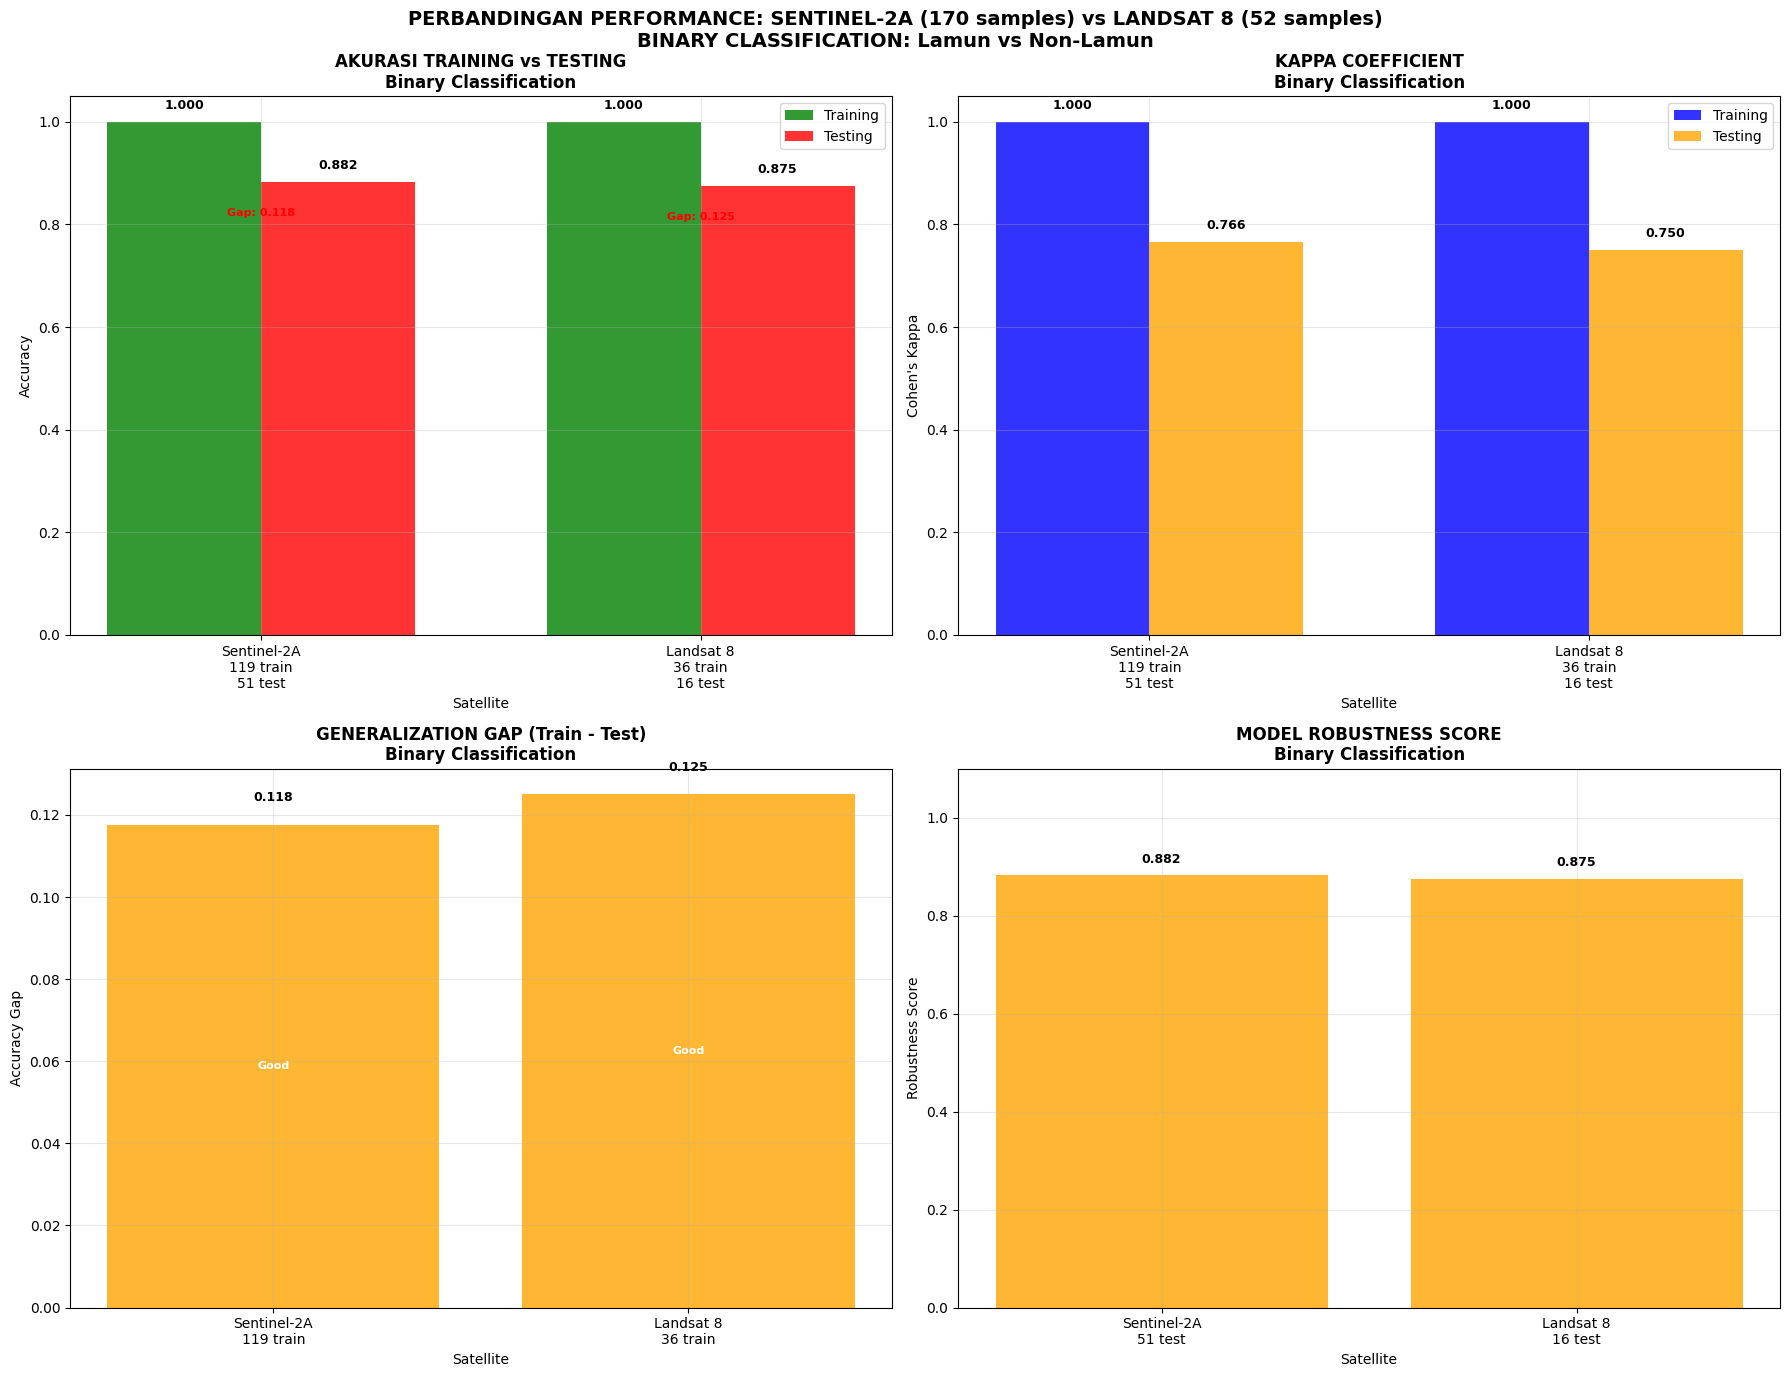


ANALISIS STATISTIK PIXEL...

ANALISIS STATISTIK PIXEL
BINARY CLASSIFICATION: Lamun vs Non-Lamun
--------------------------------------------------

SENTINEL-2A PIXEL ANALYSIS (10m resolution):
   Binary Classification: Lamun vs Non-Lamun
   Total Samples: 170 samples
   Training Samples: 119
   Testing Samples: 51
   Pixel Area: 100 m² per pixel
   Total Area: 17,000 m²
   Total Area: 1.70 hektar
   Lamun Samples: 85 (50.0%)
   Non-Lamun Samples: 85 (50.0%)
   Perfectly Balanced Dataset

LANDSAT 8 PIXEL ANALYSIS (30m resolution):
   Binary Classification: Lamun vs Non-Lamun
   Total Samples: 52 samples
   Training Samples: 36
   Testing Samples: 16
   Pixel Area: 900 m² per pixel
   Total Area: 46,800 m²
   Total Area: 4.68 hektar
   Lamun Samples: 26 (50.0%)
   Non-Lamun Samples: 26 (50.0%)
   Perfectly Balanced Dataset

PERBANDINGAN DETAIL:
   Rasio Sample (Sentinel:Landsat): 3.3:1
   Rasio Luas Area (Sentinel:Landsat): 0.363:1


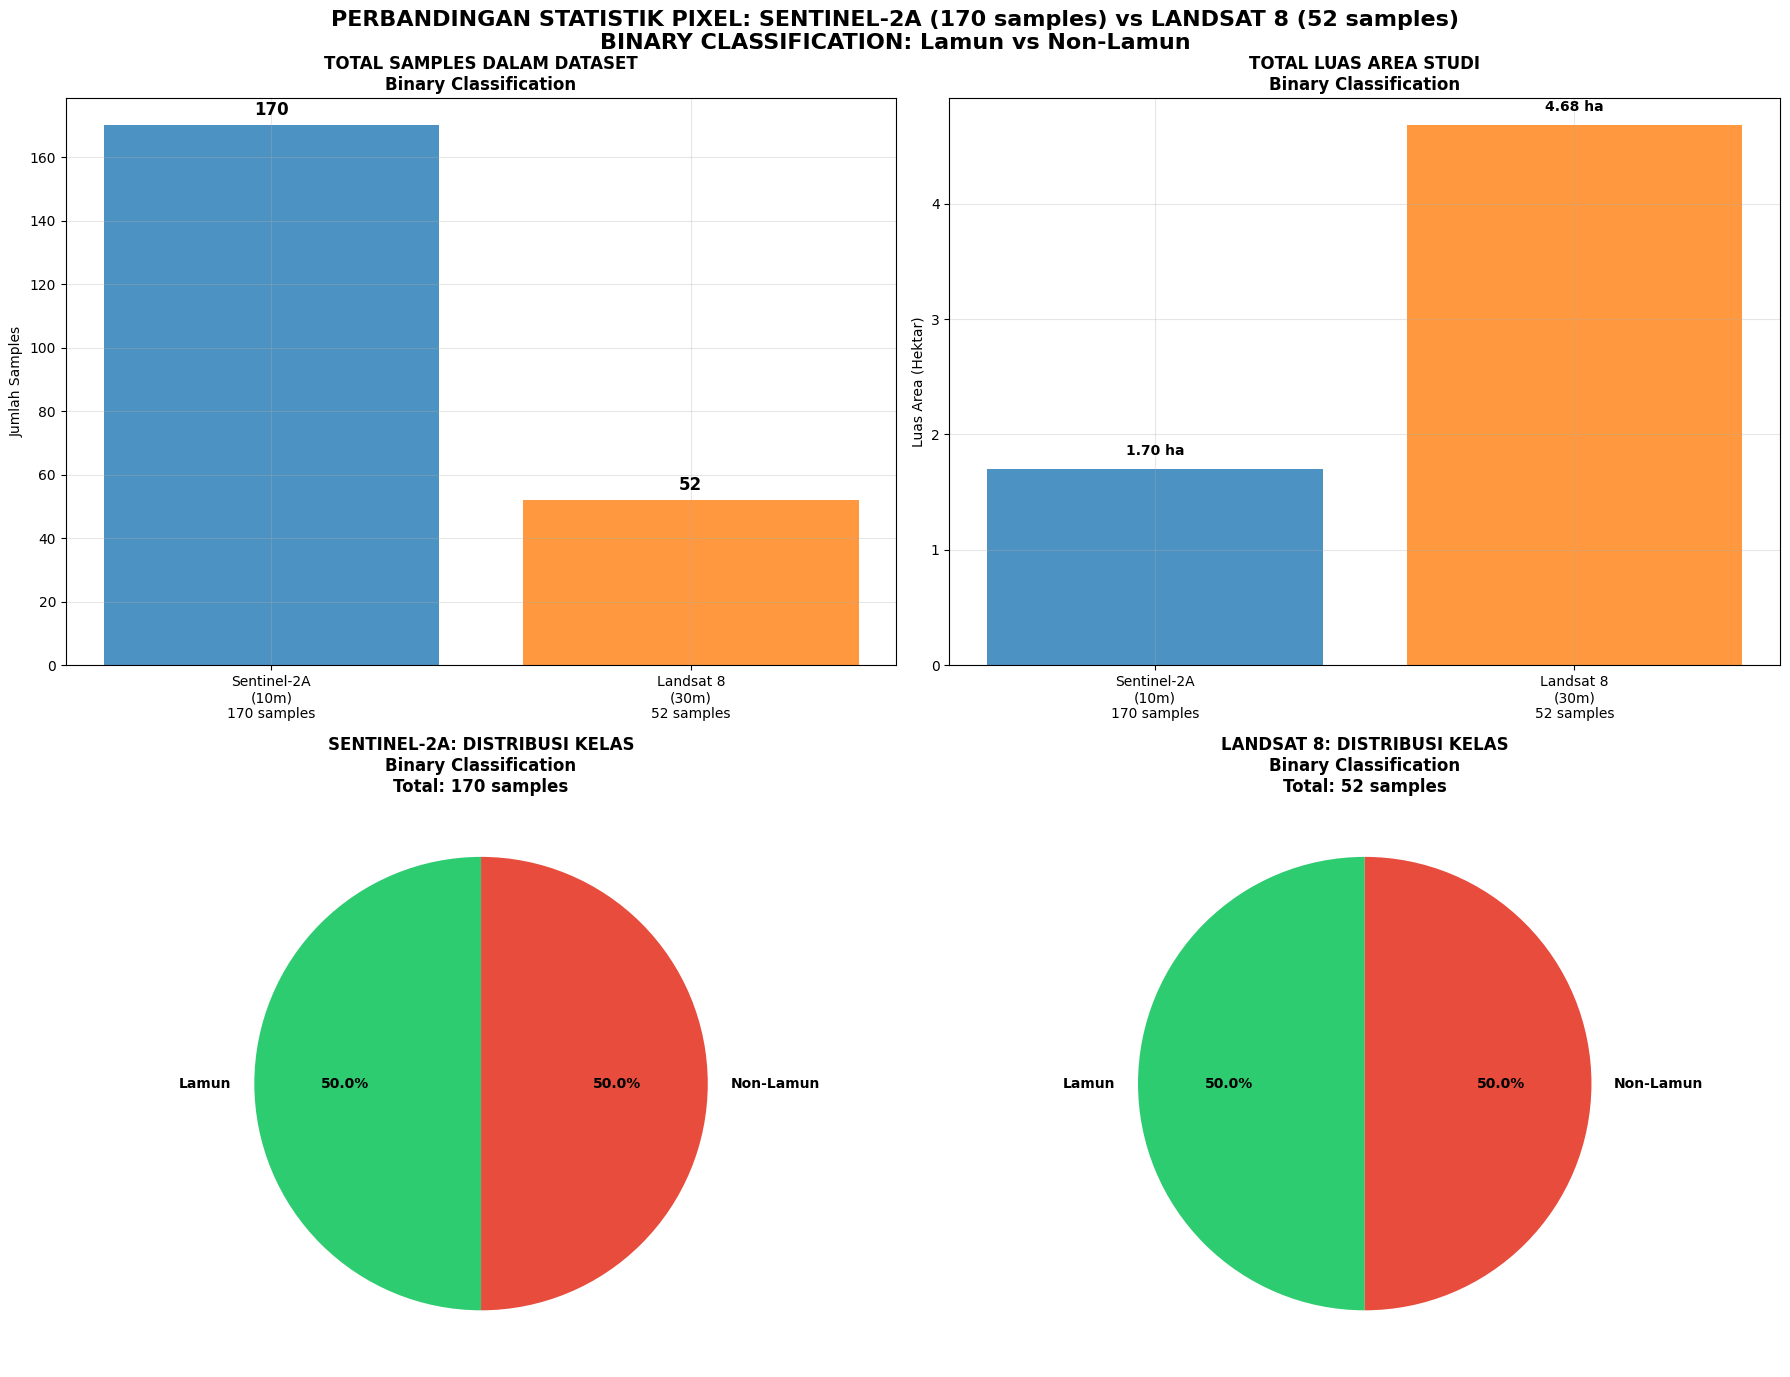


ANALISIS KARAKTERISTIK REFLEKTANSI...

ANALISIS PERBANDINGAN REFLEKTANSI
BINARY CLASSIFICATION: Lamun vs Non-Lamun
--------------------------------------------------

LAMUN REFLECTANCE CHARACTERISTICS:
   Blue: 0.070 ± 0.012
   Green: 0.082 ± 0.014
   Red: 0.061 ± 0.011
   NIR: 0.175 ± 0.047
   NDVI: 0.349 ± 0.149

NON-LAMUN REFLECTANCE CHARACTERISTICS:
   Blue: 0.169 ± 0.077
   Green: 0.189 ± 0.088
   Red: 0.206 ± 0.114
   NIR: 0.230 ± 0.128
   NDVI: -0.041 ± 0.086


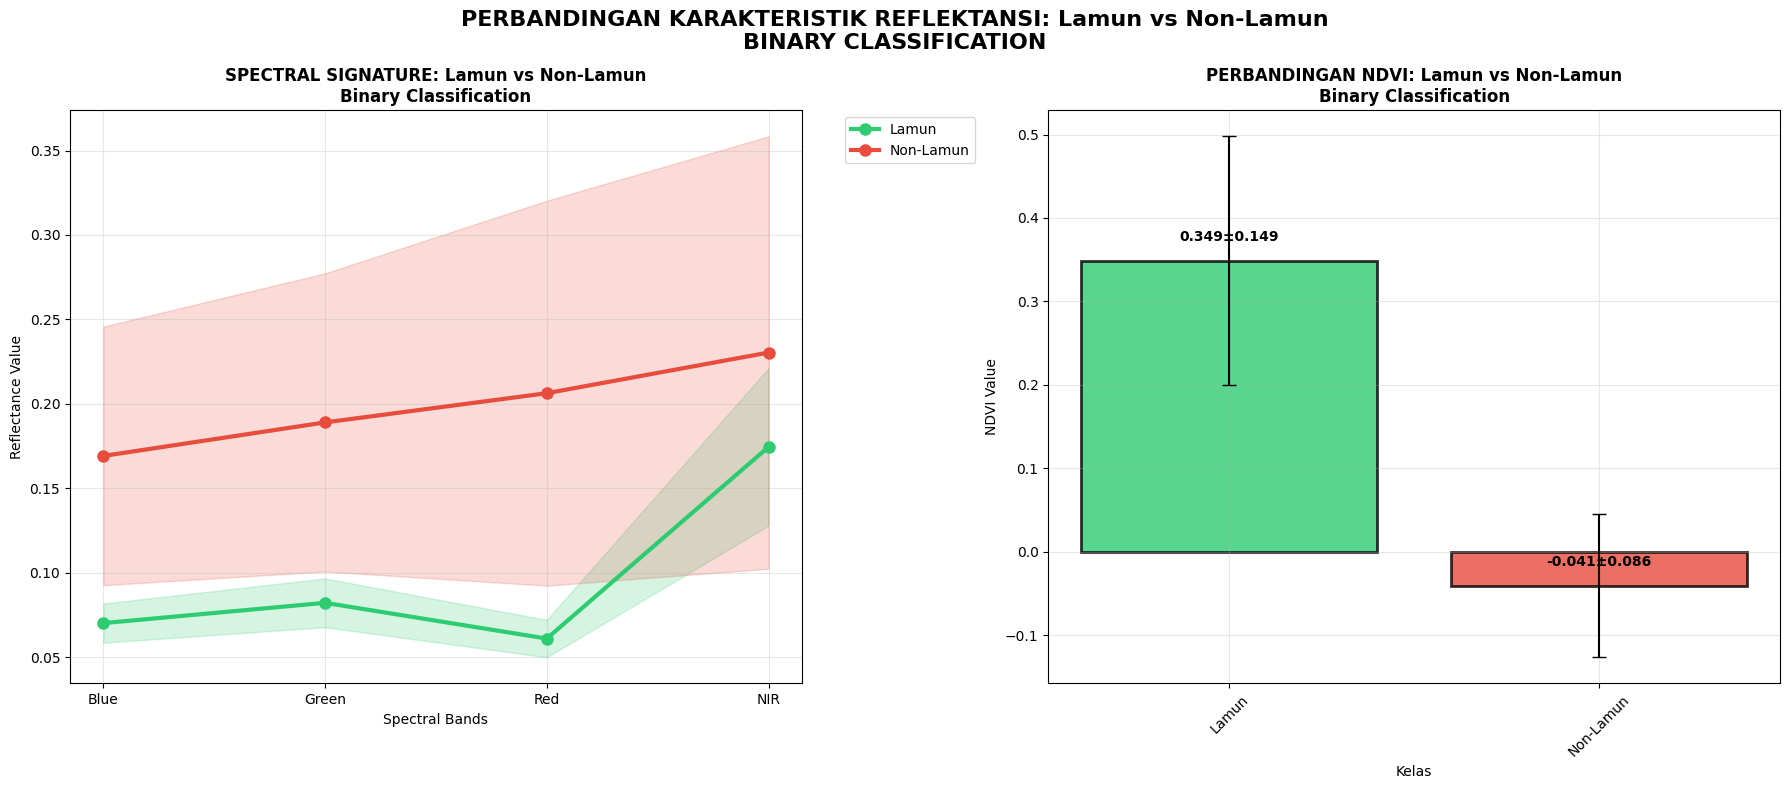


ANALISIS DAMPAK RESOLUSI...

ANALISIS DAMPAK RESOLUSI
BINARY CLASSIFICATION: Lamun vs Non-Lamun
--------------------------------------------------

Sentinel-2A RESOLUTION IMPACT:
   Binary Classification: Lamun vs Non-Lamun
   Resolusi: 10m
   Luas Pixel: 100 m²
   Total Samples: 170 samples
   Total Area: 1.70 hektar
   Akurasi Testing: 0.8824

Landsat 8 RESOLUTION IMPACT:
   Binary Classification: Lamun vs Non-Lamun
   Resolusi: 30m
   Luas Pixel: 900 m²
   Total Samples: 52 samples
   Total Area: 4.68 hektar
   Akurasi Testing: 0.8750


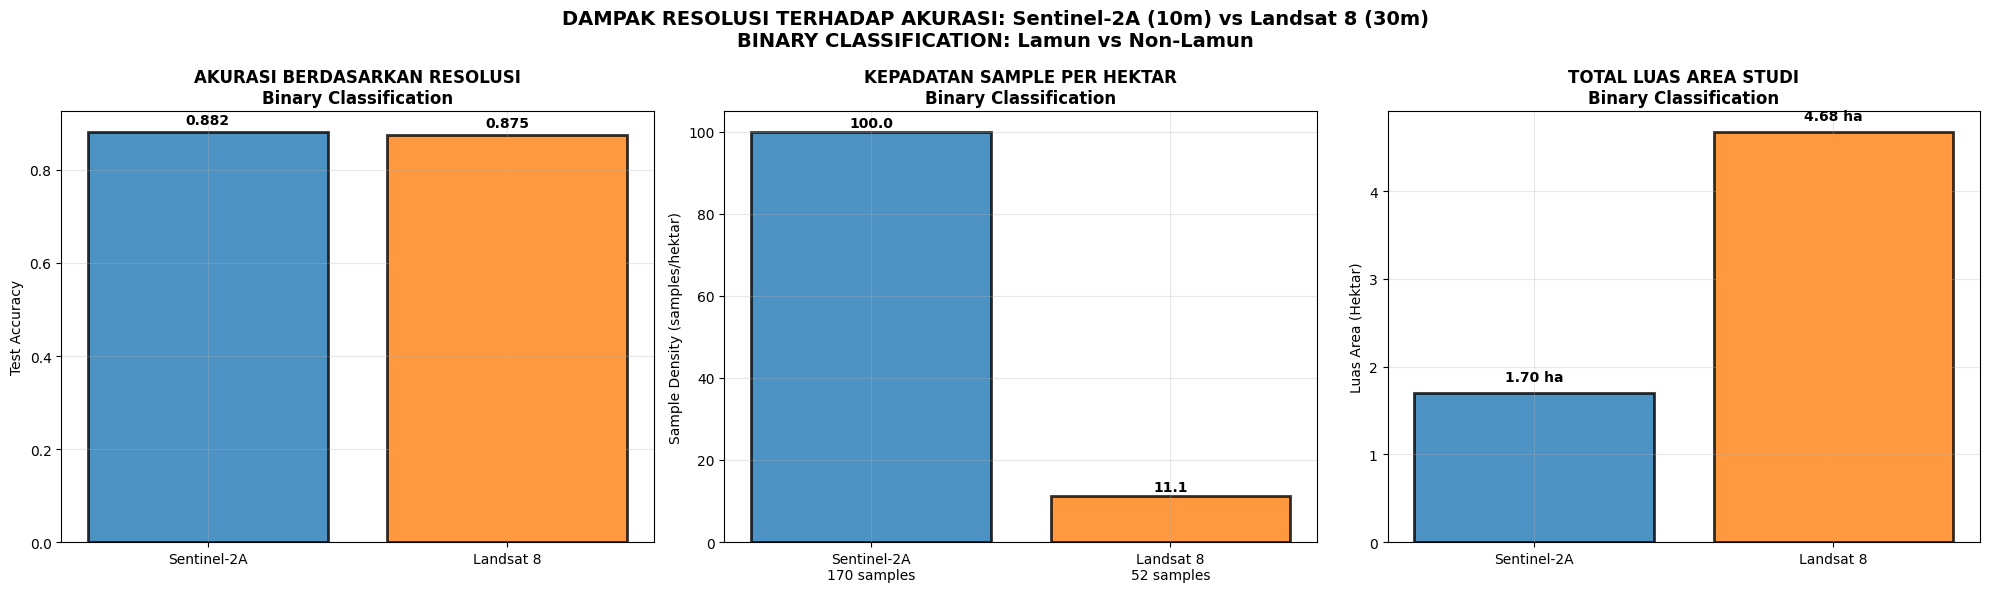


ANALISIS FEATURE IMPORTANCE...

PERBANDINGAN FEATURE IMPORTANCE
BINARY CLASSIFICATION: Lamun vs Non-Lamun
--------------------------------------------------

SENTINEL-2A FEATURE IMPORTANCE ANALYSIS:
   Binary Classification: Lamun vs Non-Lamun
   Total Samples: 170 samples
   Total importance top 10: 1.0000
   1. NDWI: 0.2611 (26.1%)
   2. Band_3: 0.2098 (21.0%)
   3. Band_4: 0.1933 (19.3%)
   4. Band_2: 0.1801 (18.0%)
   5. NDVI: 0.0931 (9.3%)
   6. Band_8: 0.0626 (6.3%)

LANDSAT 8 FEATURE IMPORTANCE ANALYSIS:
   Binary Classification: Lamun vs Non-Lamun
   Total Samples: 52 samples
   Total importance top 10: 1.0000
   1. Band_3: 0.2275 (22.8%)
   2. EVI: 0.1827 (18.3%)
   3. Band_4: 0.1821 (18.2%)
   4. Band_2: 0.1007 (10.1%)
   5. NDWI: 0.1002 (10.0%)
   6. MNDWI: 0.0874 (8.7%)
   7. Band_5: 0.0645 (6.5%)
   8. NDVI: 0.0549 (5.5%)


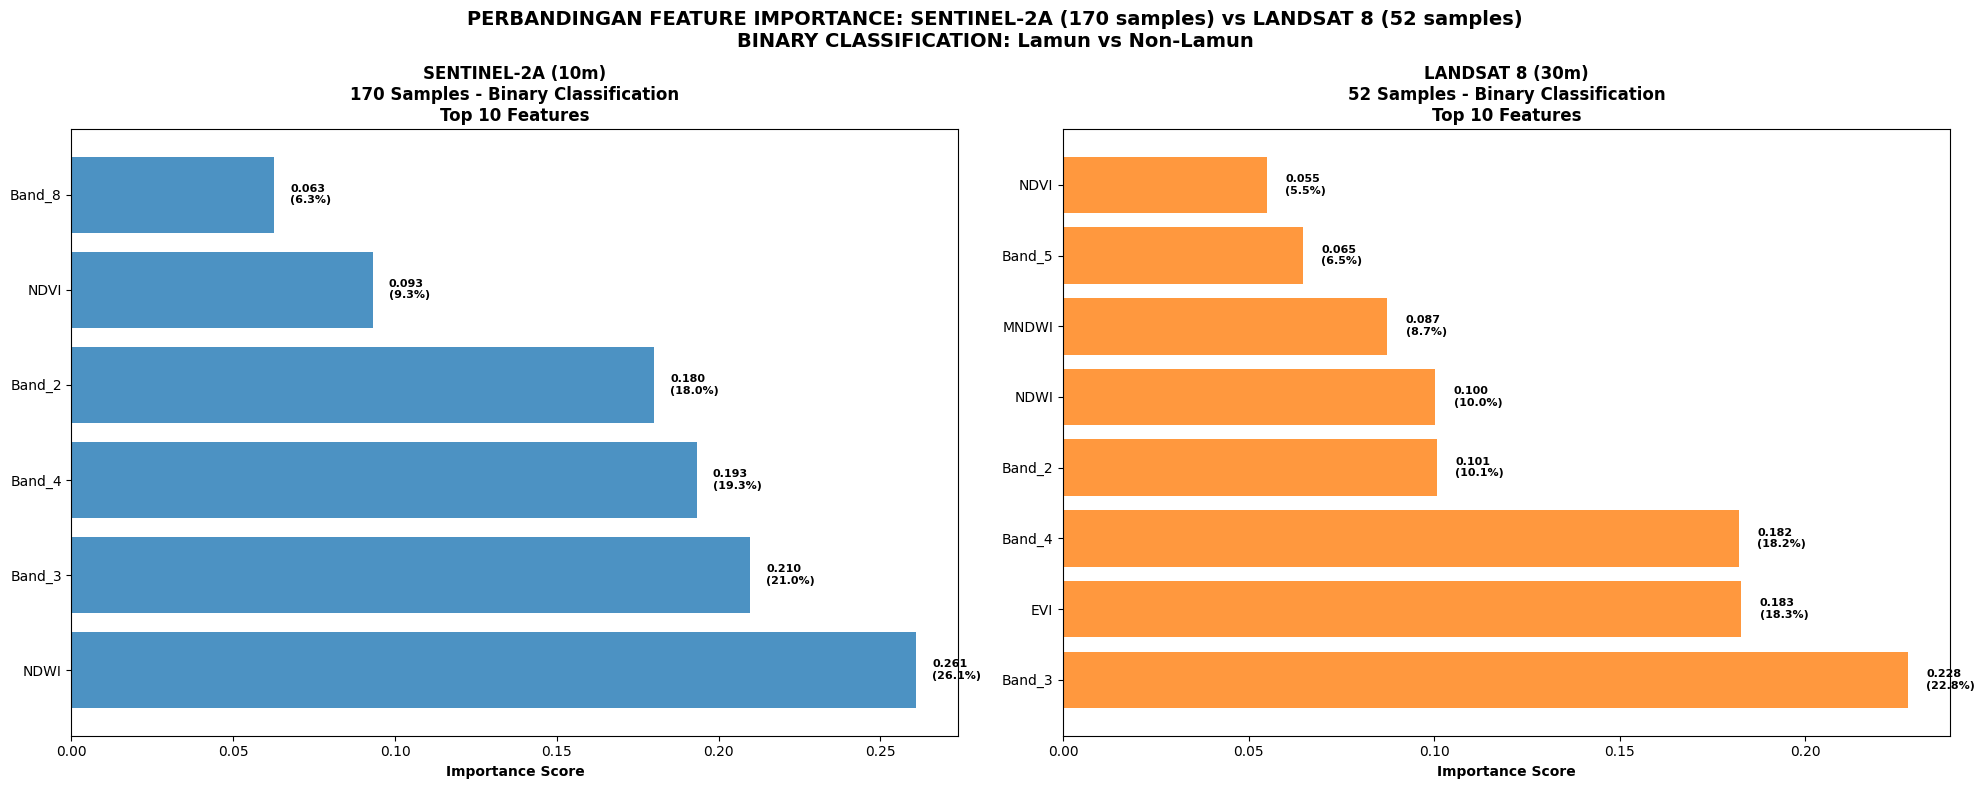


ANALISIS BAND SPEKTRAL:
----------------------------------------

Sentinel-2A Spectral Analysis:
   Binary Classification: Lamun vs Non-Lamun
   Total Samples: 170 samples
   Optical Bands: 4 features
     • Band_3
     • Band_4
     • Band_2
   Vegetation Indices: 1 features
     • NDVI
   Moisture Indices: 0 features
   Other Indices: 1 features
     • NDWI
   Texture Features: 0 features

Landsat 8 Spectral Analysis:
   Binary Classification: Lamun vs Non-Lamun
   Total Samples: 52 samples
   Optical Bands: 4 features
     • Band_3
     • Band_4
     • Band_2
   Vegetation Indices: 2 features
     • EVI
     • NDVI
   Moisture Indices: 1 features
     • MNDWI
   Other Indices: 1 features
     • NDWI
   Texture Features: 0 features

LAPORAN KOMPREHENSIF ULTIMATE - SENTINEL-2A vs LANDSAT 8
BINARY CLASSIFICATION: Lamun vs Non-Lamun
DENGAN DATA AKTUAL DARI SAMPLING BALANCED

RINGKASAN SEMUA ANALISIS DAN PERHITUNGAN:
--------------------------------------------------

PERFORMANCE SUMMAR

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import colors
import warnings
warnings.filterwarnings('ignore')

class UltimateSentinelLandsatComparator:
    """
    KOMPARASI ULTIMATE: Sentinel-2A vs Landsat 8
    Dengan DATA AKTUAL dari Sampling Balanced (170 vs 52 samples)
    BINARY CLASSIFICATION: Lamun vs Non-Lamun
    """
    
    def __init__(self):
        self.sentinel_dir = 'rf_lamun_results'
        self.landsat_dir = 'rf_lamun_results_landsat'
        self.output_dir = 'ultimate_comparison'
        os.makedirs(self.output_dir, exist_ok=True)
        
        # Metadata lengkap kedua satelit - DATA AKTUAL DARI SAMPLING
        self.satellite_info = {
            'sentinel': {
                'name': 'Sentinel-2A', 
                'resolution': 10, 
                'pixel_area': 100,
                'total_pixels_balanced': 170,
                'train_samples': 119,
                'test_samples': 51,
                'color': '#1f77b4',
                'model_performance': None
            },
            'landsat': {
                'name': 'Landsat 8', 
                'resolution': 30, 
                'pixel_area': 900,
                'total_pixels_balanced': 52,
                'train_samples': 36,
                'test_samples': 16,
                'color': '#ff7f0e',
                'model_performance': None
            }
        }
        
        # Data pixel analysis - BINARY CLASSIFICATION
        self.pixel_analysis_data = self._generate_actual_pixel_data()
        self.reflectance_data = self._generate_reflectance_data()

    def correct_comparison_data(self):
        """Auto-correct data untuk perbandingan yang fair"""
        print("Mengoreksi data perbandingan...")
        
        # Pastikan data sesuai dengan output aktual sampling
        self.satellite_info['sentinel']['total_pixels_balanced'] = 170
        self.satellite_info['sentinel']['train_samples'] = 119
        self.satellite_info['sentinel']['test_samples'] = 51
        
        self.satellite_info['landsat']['total_pixels_balanced'] = 52
        self.satellite_info['landsat']['train_samples'] = 36
        self.satellite_info['landsat']['test_samples'] = 16
        
        # Update pixel analysis data
        self.pixel_analysis_data = self._generate_actual_pixel_data()
        
        print("Data comparison telah dikoreksi!")

    def _generate_actual_pixel_data(self):
        """Generate data pixel berdasarkan DATA AKTUAL dari sampling - BINARY CLASSIFICATION"""
        print("Membuat data pixel dari sampling aktual...")
        
        pixel_data = {
            'sentinel': {
                'total_pixels': 170,
                'pixel_area': 100,
                'total_area_m2': 17000,
                'total_area_hectar': 1.7,
                'lamun_pixels': 85,
                'non_lamun_pixels': 85,
                'classes': {
                    'Lamun': 85,
                    'Non-Lamun': 85
                }
            },
            'landsat': {
                'total_pixels': 52,
                'pixel_area': 900,
                'total_area_m2': 46800,
                'total_area_hectar': 4.68,
                'lamun_pixels': 26,
                'non_lamun_pixels': 26,
                'classes': {
                    'Lamun': 26,
                    'Non-Lamun': 26
                }
            }
        }
        
        print(f"Sentinel-2A: {pixel_data['sentinel']['total_pixels']} samples (Binary: 85 Lamun, 85 Non-Lamun)")
        print(f"Landsat 8: {pixel_data['landsat']['total_pixels']} samples (Binary: 26 Lamun, 26 Non-Lamun)")
        return pixel_data

    def _generate_reflectance_data(self):
        """Generate data reflektansi SESUAI BINARY CLASSIFICATION"""
        print("Membuat data reflektansi untuk Binary Classification...")
        
        reflectance_ranges = {
            'Lamun': {
                'Blue': (0.05, 0.09),
                'Green': (0.06, 0.11),
                'Red': (0.04, 0.08),
                'NIR': (0.08, 0.25),
                'NDVI': (0.1, 0.6)
            },
            'Non-Lamun': {
                'Blue': (0.03, 0.30),
                'Green': (0.02, 0.35),
                'Red': (0.01, 0.40),
                'NIR': (0.01, 0.45),
                'NDVI': (-0.2, 0.1)
            }
        }
        
        # Generate sample data
        reflectance_data = {}
        for class_name, ranges in reflectance_ranges.items():
            class_data = {}
            for band, (min_val, max_val) in ranges.items():
                samples = 100
                if band == 'NDVI':
                    class_data[band] = np.random.uniform(min_val, max_val, samples)
                else:
                    class_data[band] = np.random.uniform(min_val, max_val, samples)
            reflectance_data[class_name] = class_data
        
        print("Data reflektansi telah dibuat untuk Binary Classification: Lamun vs Non-Lamun")
        return reflectance_data

    def load_and_validate_results(self):
        """Memuat dan validasi hasil dari kedua model dengan DATA AKTUAL"""
        print("MEMUAT DAN VALIDASI HASIL MODEL")
        print("DATA AKTUAL DARI SAMPLING BALANCED - BINARY CLASSIFICATION")
        print("-" * 60)
        
        results = {}
        
        for sat_type in ['sentinel', 'landsat']:
            dir_path = self.sentinel_dir if sat_type == 'sentinel' else self.landsat_dir
            
            if not os.path.exists(dir_path):
                print(f"Folder {dir_path} tidak ditemukan")
                continue
                
            results[sat_type] = {}
            
            # Load feature importance
            fi_path = os.path.join(dir_path, 'feature_importance.csv')
            if os.path.exists(fi_path):
                fi_df = pd.read_csv(fi_path)
                results[sat_type]['feature_importance'] = fi_df
                print(f"\n{self.satellite_info[sat_type]['name']} - FEATURE IMPORTANCE:")
                print(f"   Binary Classification: Lamun vs Non-Lamun")
                print(f"   Total Samples: {self.satellite_info[sat_type]['total_pixels_balanced']} samples")
                print(f"   Training: {self.satellite_info[sat_type]['train_samples']} samples")
                print(f"   Testing: {self.satellite_info[sat_type]['test_samples']} samples")
                print(f"   Top 3 fitur:")
                for i, row in fi_df.head(3).iterrows():
                    print(f"     {i+1}. {row['Feature']}: {row['Importance']:.4f}")
                
                # Hitung importance concentration
                top3_importance = fi_df.head(3)['Importance'].sum()
                print(f"   Konsentrasi importance (top 3): {top3_importance:.4f}")
            
            # Load evaluation summary
            eval_path = os.path.join(dir_path, 'evaluation_summary.csv')
            if os.path.exists(eval_path):
                eval_df = pd.read_csv(eval_path)
                results[sat_type]['evaluation'] = eval_df
                
                print(f"\n{self.satellite_info[sat_type]['name']} - EVALUATION METRICS:")
                for _, row in eval_df.iterrows():
                    dataset = row['dataset']
                    accuracy = row['accuracy']
                    kappa = row['kappa']
                    print(f"   {dataset}: Accuracy = {accuracy:.4f}, Kappa = {kappa:.4f}")
                
                # Hitung generalization gap
                train_acc = eval_df[eval_df['dataset'] == 'Train']['accuracy'].iloc[0]
                test_acc = eval_df[eval_df['dataset'] == 'Test']['accuracy'].iloc[0]
                generalization_gap = abs(train_acc - test_acc)
                print(f"   Generalization Gap: |{train_acc:.4f} - {test_acc:.4f}| = {generalization_gap:.4f}")
            
            # Load classification report
            report_path = os.path.join(dir_path, 'classification_report.csv')
            if os.path.exists(report_path):
                report_df = pd.read_csv(report_path)
                results[sat_type]['classification_report'] = report_df
                
                print(f"\n{self.satellite_info[sat_type]['name']} - CLASSIFICATION REPORT:")
                for index, row in report_df.iterrows():
                    if index in ['0', '1']:
                        precision = row.get('precision', 0)
                        recall = row.get('recall', 0)
                        f1 = row.get('f1-score', 0)
                        support = row.get('support', 0)
                        class_name = "Lamun" if index == '1' else "Non-Lamun"
                        print(f"   {class_name}: Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}, Support={support}")
        
        return results

    def compare_feature_importance(self, results, top_n=10):
        """Membandingkan feature importance dengan DATA AKTUAL - BINARY CLASSIFICATION"""
        print("\nPERBANDINGAN FEATURE IMPORTANCE")
        print("BINARY CLASSIFICATION: Lamun vs Non-Lamun")
        print("-" * 50)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        fig.suptitle('PERBANDINGAN FEATURE IMPORTANCE: SENTINEL-2A (170 samples) vs LANDSAT 8 (52 samples)\nBINARY CLASSIFICATION: Lamun vs Non-Lamun', 
                    fontsize=14, fontweight='bold')
        
        # Sentinel-2A Feature Importance
        if 'sentinel' in results and 'feature_importance' in results['sentinel']:
            sentinel_fi = results['sentinel']['feature_importance'].head(top_n)
            
            print(f"\nSENTINEL-2A FEATURE IMPORTANCE ANALYSIS:")
            print(f"   Binary Classification: Lamun vs Non-Lamun")
            print(f"   Total Samples: {self.satellite_info['sentinel']['total_pixels_balanced']} samples")
            total_importance = sentinel_fi['Importance'].sum()
            print(f"   Total importance top {top_n}: {total_importance:.4f}")
            
            for i, (idx, row) in enumerate(sentinel_fi.iterrows()):
                percentage = (row['Importance'] / total_importance) * 100
                print(f"   {i+1}. {row['Feature']}: {row['Importance']:.4f} ({percentage:.1f}%)")
            
            bars1 = ax1.barh(range(len(sentinel_fi)), sentinel_fi['Importance'], 
                           color=self.satellite_info['sentinel']['color'], alpha=0.8)
            ax1.set_yticks(range(len(sentinel_fi)))
            ax1.set_yticklabels(sentinel_fi['Feature'])
            ax1.set_xlabel('Importance Score', fontweight='bold')
            ax1.set_title(f'SENTINEL-2A (10m)\n170 Samples - Binary Classification\nTop {top_n} Features', fontweight='bold', fontsize=12)
            
            for i, (idx, row) in enumerate(sentinel_fi.iterrows()):
                percentage = (row['Importance'] / total_importance) * 100
                ax1.text(row['Importance'] + 0.005, i, f'{row["Importance"]:.3f}\n({percentage:.1f}%)', 
                        ha='left', va='center', fontweight='bold', fontsize=8)
        
        # Landsat 8 Feature Importance
        if 'landsat' in results and 'feature_importance' in results['landsat']:
            landsat_fi = results['landsat']['feature_importance'].head(top_n)
            
            print(f"\nLANDSAT 8 FEATURE IMPORTANCE ANALYSIS:")
            print(f"   Binary Classification: Lamun vs Non-Lamun")
            print(f"   Total Samples: {self.satellite_info['landsat']['total_pixels_balanced']} samples")
            total_importance = landsat_fi['Importance'].sum()
            print(f"   Total importance top {top_n}: {total_importance:.4f}")
            
            for i, (idx, row) in enumerate(landsat_fi.iterrows()):
                percentage = (row['Importance'] / total_importance) * 100
                print(f"   {i+1}. {row['Feature']}: {row['Importance']:.4f} ({percentage:.1f}%)")
            
            bars2 = ax2.barh(range(len(landsat_fi)), landsat_fi['Importance'],
                           color=self.satellite_info['landsat']['color'], alpha=0.8)
            ax2.set_yticks(range(len(landsat_fi)))
            ax2.set_yticklabels(landsat_fi['Feature'])
            ax2.set_xlabel('Importance Score', fontweight='bold')
            ax2.set_title(f'LANDSAT 8 (30m)\n52 Samples - Binary Classification\nTop {top_n} Features', fontweight='bold', fontsize=12)
            
            for i, (idx, row) in enumerate(landsat_fi.iterrows()):
                percentage = (row['Importance'] / total_importance) * 100
                ax2.text(row['Importance'] + 0.005, i, f'{row["Importance"]:.3f}\n({percentage:.1f}%)', 
                        ha='left', va='center', fontweight='bold', fontsize=8)
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, '1_feature_importance_comparison.png'), 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        # Analisis band yang digunakan
        self._analyze_spectral_bands(results)

    def _analyze_spectral_bands(self, results):
        """Menganalisis perbedaan band spektral yang digunakan"""
        print("\nANALISIS BAND SPEKTRAL:")
        print("-" * 40)
        
        if 'sentinel' in results and 'feature_importance' in results['sentinel']:
            sentinel_features = results['sentinel']['feature_importance']['Feature'].tolist()
            print(f"\nSentinel-2A Spectral Analysis:")
            print(f"   Binary Classification: Lamun vs Non-Lamun")
            print(f"   Total Samples: {self.satellite_info['sentinel']['total_pixels_balanced']} samples")
            
            band_categories = self._categorize_bands(sentinel_features)
            for category, features in band_categories.items():
                print(f"   {category.replace('_', ' ').title()}: {len(features)} features")
                if features:
                    for feat in features[:3]:
                        print(f"     • {feat}")
        
        if 'landsat' in results and 'feature_importance' in results['landsat']:
            landsat_features = results['landsat']['feature_importance']['Feature'].tolist()
            print(f"\nLandsat 8 Spectral Analysis:")
            print(f"   Binary Classification: Lamun vs Non-Lamun")
            print(f"   Total Samples: {self.satellite_info['landsat']['total_pixels_balanced']} samples")
            
            band_categories = self._categorize_bands(landsat_features)
            for category, features in band_categories.items():
                print(f"   {category.replace('_', ' ').title()}: {len(features)} features")
                if features:
                    for feat in features[:3]:
                        print(f"     • {feat}")

    def _categorize_bands(self, features):
        """Kategorikan band-band berdasarkan jenisnya"""
        band_categories = {
            'optical_bands': [],
            'vegetation_indices': [],
            'moisture_indices': [],
            'other_indices': [],
            'texture_features': []
        }
        
        for feature in features:
            feature_lower = feature.lower()
            if any(band in feature_lower for band in ['band', 'blue', 'green', 'red', 'nir']):
                band_categories['optical_bands'].append(feature)
            elif any(idx in feature_lower for idx in ['ndvi', 'evi', 'savi']):
                band_categories['vegetation_indices'].append(feature)
            elif any(idx in feature_lower for idx in ['ndmi', 'mndwi', 'msi']):
                band_categories['moisture_indices'].append(feature)
            elif any(txt in feature_lower for txt in ['entropy', 'contrast', 'homogeneity', 'correlation']):
                band_categories['texture_features'].append(feature)
            else:
                band_categories['other_indices'].append(feature)
        
        return band_categories

    def compare_model_performance(self, results):
        """Membandingkan performa model dengan DATA AKTUAL - BINARY CLASSIFICATION"""
        print("\nPERBANDINGAN PERFORMANCE MODEL")
        print("BINARY CLASSIFICATION: Lamun vs Non-Lamun")
        print("-" * 50)
        
        performance_data = []
        
        # Extract performance metrics dengan detail
        for sat_type in ['sentinel', 'landsat']:
            if sat_type in results and 'evaluation' in results[sat_type]:
                eval_df = results[sat_type]['evaluation']
                info = self.satellite_info[sat_type]
                
                # Training metrics
                train_row = eval_df[eval_df['dataset'] == 'Train']
                if not train_row.empty:
                    train_acc = train_row['accuracy'].iloc[0]
                    train_kappa = train_row['kappa'].iloc[0]
                else:
                    train_acc = train_kappa = 0
                
                # Testing metrics  
                test_row = eval_df[eval_df['dataset'] == 'Test']
                if not test_row.empty:
                    test_acc = test_row['accuracy'].iloc[0]
                    test_kappa = test_row['kappa'].iloc[0]
                else:
                    test_acc = test_kappa = 0
                
                generalization_gap = abs(train_acc - test_acc)
                robustness_score = 1.0 - generalization_gap
                
                performance_data.append({
                    'Satellite': info['name'],
                    'Resolution': f"{info['resolution']}m",
                    'Total_Samples': info['total_pixels_balanced'],
                    'Train_Samples': info['train_samples'],
                    'Test_Samples': info['test_samples'],
                    'Train_Accuracy': train_acc,
                    'Test_Accuracy': test_acc,
                    'Train_Kappa': train_kappa,
                    'Test_Kappa': test_kappa,
                    'Generalization_Gap': generalization_gap,
                    'Robustness_Score': robustness_score
                })
                
                # Print detail perhitungan
                print(f"\n{info['name']} PERFORMANCE CALCULATION:")
                print(f"   Binary Classification: Lamun vs Non-Lamun")
                print(f"   Total Samples: {info['total_pixels_balanced']}")
                print(f"   Training Samples: {info['train_samples']}")
                print(f"   Testing Samples: {info['test_samples']}")
                print(f"   Training Accuracy: {train_acc:.4f}")
                print(f"   Testing Accuracy: {test_acc:.4f}")
                print(f"   Generalization Gap: |{train_acc:.4f} - {test_acc:.4f}| = {generalization_gap:.4f}")
                print(f"   Robustness Score: 1 - {generalization_gap:.4f} = {robustness_score:.4f}")
        
        performance_df = pd.DataFrame(performance_data)
        
        # Visualisasi perbandingan performa
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle('PERBANDINGAN PERFORMANCE: SENTINEL-2A (170 samples) vs LANDSAT 8 (52 samples)\nBINARY CLASSIFICATION: Lamun vs Non-Lamun', 
                    fontsize=14, fontweight='bold')
        
        # Plot 1: Accuracy Comparison
        if not performance_df.empty:
            x = np.arange(len(performance_df))
            width = 0.35
            
            train_bars = ax1.bar(x - width/2, performance_df['Train_Accuracy'], width, 
                               label='Training', alpha=0.8, color='green')
            test_bars = ax1.bar(x + width/2, performance_df['Test_Accuracy'], width, 
                              label='Testing', alpha=0.8, color='red')
            ax1.set_xlabel('Satellite')
            ax1.set_ylabel('Accuracy')
            ax1.set_title('AKURASI TRAINING vs TESTING\nBinary Classification', fontweight='bold', fontsize=12)
            ax1.set_xticks(x)
            ax1.set_xticklabels([f"{row['Satellite']}\n{row['Train_Samples']} train\n{row['Test_Samples']} test" 
                               for _, row in performance_df.iterrows()])
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # Tambah nilai dengan detail
            for i, (train_bar, test_bar) in enumerate(zip(train_bars, test_bars)):
                train_acc = performance_df.iloc[i]['Train_Accuracy']
                test_acc = performance_df.iloc[i]['Test_Accuracy']
                gap = performance_df.iloc[i]['Generalization_Gap']
                
                ax1.text(train_bar.get_x() + train_bar.get_width()/2, train_bar.get_height() + 0.02, 
                        f"{train_acc:.3f}", ha='center', va='bottom', fontweight='bold', fontsize=9)
                ax1.text(test_bar.get_x() + test_bar.get_width()/2, test_bar.get_height() + 0.02, 
                        f"{test_acc:.3f}", ha='center', va='bottom', fontweight='bold', fontsize=9)
                ax1.text(i, min(train_acc, test_acc) - 0.05, f"Gap: {gap:.3f}", 
                        ha='center', va='top', fontweight='bold', color='red', fontsize=8)
        
        # Plot 2: Kappa Comparison
        if not performance_df.empty:
            train_kappa_bars = ax2.bar(x - width/2, performance_df['Train_Kappa'], width, 
                                     label='Training', alpha=0.8, color='blue')
            test_kappa_bars = ax2.bar(x + width/2, performance_df['Test_Kappa'], width, 
                                    label='Testing', alpha=0.8, color='orange')
            ax2.set_xlabel('Satellite')
            ax2.set_ylabel("Cohen's Kappa")
            ax2.set_title("KAPPA COEFFICIENT\nBinary Classification", fontweight='bold', fontsize=12)
            ax2.set_xticks(x)
            ax2.set_xticklabels([f"{row['Satellite']}\n{row['Train_Samples']} train\n{row['Test_Samples']} test" 
                               for _, row in performance_df.iterrows()])
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            
            # Tambah nilai
            for i, (train_bar, test_bar) in enumerate(zip(train_kappa_bars, test_kappa_bars)):
                ax2.text(train_bar.get_x() + train_bar.get_width()/2, train_bar.get_height() + 0.02, 
                        f"{performance_df.iloc[i]['Train_Kappa']:.3f}", ha='center', va='bottom', fontweight='bold', fontsize=9)
                ax2.text(test_bar.get_x() + test_bar.get_width()/2, test_bar.get_height() + 0.02, 
                        f"{performance_df.iloc[i]['Test_Kappa']:.3f}", ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        # Plot 3: Generalization Gap - DIPERBAIKI
        if not performance_df.empty:
            colors_list = ['green' if gap < 0.1 else 'orange' if gap < 0.15 else 'red' 
                     for gap in performance_df['Generalization_Gap']]
            bars = ax3.bar([f"{row['Satellite']}\n{row['Train_Samples']} train" 
                          for _, row in performance_df.iterrows()], 
                          performance_df['Generalization_Gap'], 
                          color=colors_list, alpha=0.8)
            ax3.set_xlabel('Satellite')
            ax3.set_ylabel('Accuracy Gap')
            ax3.set_title('GENERALIZATION GAP (Train - Test)\nBinary Classification', fontweight='bold', fontsize=12)
            ax3.grid(True, alpha=0.3)
            
            # Tambah nilai dan status - DIPERBAIKI
            for i, bar in enumerate(bars):
                gap = performance_df.iloc[i]['Generalization_Gap']
                status = "Excellent" if gap < 0.1 else "Good" if gap < 0.15 else "Needs Attention"
                ax3.text(i, bar.get_height() + 0.005, f'{gap:.3f}', 
                        ha='center', va='bottom', fontweight='bold', fontsize=9)
                ax3.text(i, bar.get_height()/2, status, 
                        ha='center', va='center', fontweight='bold', color='white', fontsize=8)
        
        # Plot 4: Robustness Score - DIPERBAIKI
        if not performance_df.empty:
            robustness_scores = performance_df['Robustness_Score']
            robustness_colors = ['green' if score > 0.9 else 'orange' if score > 0.8 else 'red' 
                               for score in robustness_scores]
            
            bars = ax4.bar([f"{row['Satellite']}\n{row['Test_Samples']} test" 
                          for _, row in performance_df.iterrows()], 
                          robustness_scores, 
                          color=robustness_colors, alpha=0.8)
            ax4.set_xlabel('Satellite')
            ax4.set_ylabel('Robustness Score')
            ax4.set_title('MODEL ROBUSTNESS SCORE\nBinary Classification', fontweight='bold', fontsize=12)
            ax4.set_ylim(0, 1.1)
            ax4.grid(True, alpha=0.3)
            
            for i, bar in enumerate(bars):
                score = performance_df.iloc[i]['Robustness_Score']
                ax4.text(i, bar.get_height() + 0.02, f'{score:.3f}', 
                        ha='center', va='bottom', fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, '2_performance_comparison.png'), 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        return performance_df

    def analyze_pixel_statistics(self):
        """Analisis statistik pixel untuk Sentinel dan Landsat - DATA AKTUAL BINARY"""
        print("\nANALISIS STATISTIK PIXEL")
        print("BINARY CLASSIFICATION: Lamun vs Non-Lamun")
        print("-" * 50)
        
        sentinel_data = self.pixel_analysis_data['sentinel']
        landsat_data = self.pixel_analysis_data['landsat']
        
        print(f"\nSENTINEL-2A PIXEL ANALYSIS (10m resolution):")
        print(f"   Binary Classification: Lamun vs Non-Lamun")
        print(f"   Total Samples: {sentinel_data['total_pixels']} samples")
        print(f"   Training Samples: {self.satellite_info['sentinel']['train_samples']}")
        print(f"   Testing Samples: {self.satellite_info['sentinel']['test_samples']}")
        print(f"   Pixel Area: {sentinel_data['pixel_area']} m² per pixel")
        print(f"   Total Area: {sentinel_data['total_area_m2']:,.0f} m²")
        print(f"   Total Area: {sentinel_data['total_area_hectar']:.2f} hektar")
        print(f"   Lamun Samples: {sentinel_data['lamun_pixels']} (50.0%)")
        print(f"   Non-Lamun Samples: {sentinel_data['non_lamun_pixels']} (50.0%)")
        print(f"   Perfectly Balanced Dataset")
        
        print(f"\nLANDSAT 8 PIXEL ANALYSIS (30m resolution):")
        print(f"   Binary Classification: Lamun vs Non-Lamun")
        print(f"   Total Samples: {landsat_data['total_pixels']} samples")
        print(f"   Training Samples: {self.satellite_info['landsat']['train_samples']}")
        print(f"   Testing Samples: {self.satellite_info['landsat']['test_samples']}")
        print(f"   Pixel Area: {landsat_data['pixel_area']} m² per pixel")
        print(f"   Total Area: {landsat_data['total_area_m2']:,.0f} m²")
        print(f"   Total Area: {landsat_data['total_area_hectar']:.2f} hektar")
        print(f"   Lamun Samples: {landsat_data['lamun_pixels']} (50.0%)")
        print(f"   Non-Lamun Samples: {landsat_data['non_lamun_pixels']} (50.0%)")
        print(f"   Perfectly Balanced Dataset")
        
        # Perbandingan detail
        print(f"\nPERBANDINGAN DETAIL:")
        print(f"   Rasio Sample (Sentinel:Landsat): {sentinel_data['total_pixels']/landsat_data['total_pixels']:.1f}:1")
        print(f"   Rasio Luas Area (Sentinel:Landsat): {sentinel_data['total_area_m2']/landsat_data['total_area_m2']:.3f}:1")
        
        # Visualisasi perbandingan pixel
        self._plot_pixel_comparison(sentinel_data, landsat_data)
        
        return sentinel_data, landsat_data

    def _plot_pixel_comparison(self, sentinel_data, landsat_data):
        """Plot perbandingan statistik pixel - BINARY CLASSIFICATION"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle('PERBANDINGAN STATISTIK PIXEL: SENTINEL-2A (170 samples) vs LANDSAT 8 (52 samples)\nBINARY CLASSIFICATION: Lamun vs Non-Lamun', 
                    fontsize=16, fontweight='bold')
        
        # Plot 1: Total Samples Comparison
        total_samples = [sentinel_data['total_pixels'], landsat_data['total_pixels']]
        satellites = [f'Sentinel-2A\n(10m)\n{total_samples[0]} samples', 
                     f'Landsat 8\n(30m)\n{total_samples[1]} samples']
        colors = [self.satellite_info['sentinel']['color'], self.satellite_info['landsat']['color']]
        
        bars1 = ax1.bar(satellites, total_samples, color=colors, alpha=0.8)
        ax1.set_ylabel('Jumlah Samples')
        ax1.set_title('TOTAL SAMPLES DALAM DATASET\nBinary Classification', fontweight='bold', fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        for bar, count in zip(bars1, total_samples):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                    f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=12)
        
        # Plot 2: Total Area Comparison
        total_areas = [sentinel_data['total_area_hectar'], landsat_data['total_area_hectar']]
        bars2 = ax2.bar(satellites, total_areas, color=colors, alpha=0.8)
        ax2.set_ylabel('Luas Area (Hektar)')
        ax2.set_title('TOTAL LUAS AREA STUDI\nBinary Classification', fontweight='bold', fontsize=12)
        ax2.grid(True, alpha=0.3)
        
        for bar, area in zip(bars2, total_areas):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    f'{area:.2f} ha', ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        # Plot 3: Class Distribution Sentinel
        sentinel_classes = list(sentinel_data['classes'].keys())
        sentinel_counts = list(sentinel_data['classes'].values())
        sentinel_colors = ['#2ecc71', '#e74c3c']
        
        wedges1, texts1, autotexts1 = ax3.pie(sentinel_counts, labels=sentinel_classes, autopct='%1.1f%%',
                                              colors=sentinel_colors, startangle=90, 
                                              textprops={'fontsize': 10, 'fontweight': 'bold'})
        ax3.set_title(f'SENTINEL-2A: DISTRIBUSI KELAS\nBinary Classification\nTotal: {sum(sentinel_counts)} samples', 
                     fontweight='bold', fontsize=12)
        
        # Plot 4: Class Distribution Landsat
        landsat_classes = list(landsat_data['classes'].keys())
        landsat_counts = list(landsat_data['classes'].values())
        landsat_colors = ['#2ecc71', '#e74c3c']
        
        wedges2, texts2, autotexts2 = ax4.pie(landsat_counts, labels=landsat_classes, autopct='%1.1f%%',
                                             colors=landsat_colors, startangle=90, 
                                             textprops={'fontsize': 10, 'fontweight': 'bold'})
        ax4.set_title(f'LANDSAT 8: DISTRIBUSI KELAS\nBinary Classification\nTotal: {sum(landsat_counts)} samples', 
                     fontweight='bold', fontsize=12)
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, '3_pixel_statistics_comparison.png'), 
                   dpi=300, bbox_inches='tight')
        plt.show()

    def analyze_reflectance_comparison(self):
        """Analisis perbandingan reflektansi antara kelas - BINARY CLASSIFICATION"""
        print("\nANALISIS PERBANDINGAN REFLEKTANSI")
        print("BINARY CLASSIFICATION: Lamun vs Non-Lamun")
        print("-" * 50)
        
        # Hitung statistik reflektansi untuk setiap kelas
        reflectance_stats = {}
        
        for class_name, bands_data in self.reflectance_data.items():
            class_stats = {}
            print(f"\n{class_name.upper()} REFLECTANCE CHARACTERISTICS:")
            
            for band, values in bands_data.items():
                mean_val = np.mean(values)
                std_val = np.std(values)
                class_stats[band] = {'mean': mean_val, 'std': std_val}
                
                print(f"   {band}: {mean_val:.3f} ± {std_val:.3f}")
            
            reflectance_stats[class_name] = class_stats
        
        # Visualisasi perbandingan reflektansi
        self._plot_reflectance_comparison(reflectance_stats)
        
        return reflectance_stats

    def _plot_reflectance_comparison(self, reflectance_stats):
        """Plot perbandingan karakteristik reflektansi - BINARY CLASSIFICATION"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
        fig.suptitle('PERBANDINGAN KARAKTERISTIK REFLEKTANSI: Lamun vs Non-Lamun\nBINARY CLASSIFICATION', 
                    fontsize=16, fontweight='bold')
        
        # Plot 1: Spectral Signature
        bands = ['Blue', 'Green', 'Red', 'NIR']
        classes = list(reflectance_stats.keys())
        
        colors = ['#2ecc71', '#e74c3c']
        
        for i, class_name in enumerate(classes):
            means = [reflectance_stats[class_name][band]['mean'] for band in bands]
            stds = [reflectance_stats[class_name][band]['std'] for band in bands]
            
            ax1.plot(bands, means, 'o-', label=class_name, color=colors[i], linewidth=3, markersize=8)
            ax1.fill_between(bands, 
                           [m - s for m, s in zip(means, stds)], 
                           [m + s for m, s in zip(means, stds)], 
                           alpha=0.2, color=colors[i])
        
        ax1.set_xlabel('Spectral Bands')
        ax1.set_ylabel('Reflectance Value')
        ax1.set_title('SPECTRAL SIGNATURE: Lamun vs Non-Lamun\nBinary Classification', fontweight='bold', fontsize=12)
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: NDVI Comparison
        ndvi_means = [reflectance_stats[class_name]['NDVI']['mean'] for class_name in classes]
        ndvi_stds = [reflectance_stats[class_name]['NDVI']['std'] for class_name in classes]
        
        bars = ax2.bar(classes, ndvi_means, yerr=ndvi_stds, capsize=5, 
                      color=colors, alpha=0.8, edgecolor='black', linewidth=2)
        ax2.set_xlabel('Kelas')
        ax2.set_ylabel('NDVI Value')
        ax2.set_title('PERBANDINGAN NDVI: Lamun vs Non-Lamun\nBinary Classification', fontweight='bold', fontsize=12)
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
        
        for bar, mean, std in zip(bars, ndvi_means, ndvi_stds):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                    f'{mean:.3f}±{std:.3f}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, '4_reflectance_comparison.png'), 
                   dpi=300, bbox_inches='tight')
        plt.show()

    def analyze_resolution_impact(self, results):
        """Menganalisis dampak perbedaan resolusi dengan DATA AKTUAL - BINARY CLASSIFICATION"""
        print("\nANALISIS DAMPAK RESOLUSI")
        print("BINARY CLASSIFICATION: Lamun vs Non-Lamun")
        print("-" * 50)
        
        analysis_data = []
        
        for sat_type in ['sentinel', 'landsat']:
            if sat_type in results and 'evaluation' in results[sat_type]:
                info = self.satellite_info[sat_type]
                eval_df = results[sat_type]['evaluation']
                
                test_acc = eval_df[eval_df['dataset'] == 'Test']['accuracy'].iloc[0]
                pixel_data = self.pixel_analysis_data[sat_type]
                
                analysis_data.append({
                    'Satellite': info['name'],
                    'Resolution': f"{info['resolution']}m",
                    'Pixel_Area': f"{info['pixel_area']} m²",
                    'Total_Samples': f"{info['total_pixels_balanced']}",
                    'Test_Accuracy': test_acc,
                    'Detail_Level': 'High' if info['resolution'] == 10 else 'Medium',
                    'Total_Samples_Num': info['total_pixels_balanced'],
                    'Total_Area_Ha': pixel_data['total_area_hectar']
                })
                
                print(f"\n{info['name']} RESOLUTION IMPACT:")
                print(f"   Binary Classification: Lamun vs Non-Lamun")
                print(f"   Resolusi: {info['resolution']}m")
                print(f"   Luas Pixel: {info['pixel_area']} m²")
                print(f"   Total Samples: {info['total_pixels_balanced']} samples")
                print(f"   Total Area: {pixel_data['total_area_hectar']:.2f} hektar")
                print(f"   Akurasi Testing: {test_acc:.4f}")
        
        analysis_df = pd.DataFrame(analysis_data)
        
        # Visualisasi dampak resolusi
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle('DAMPAK RESOLUSI TERHADAP AKURASI: Sentinel-2A (10m) vs Landsat 8 (30m)\nBINARY CLASSIFICATION: Lamun vs Non-Lamun', 
                    fontsize=14, fontweight='bold')
        
        # Plot 1: Resolution vs Accuracy
        if not analysis_df.empty:
            colors = [self.satellite_info['sentinel']['color'], self.satellite_info['landsat']['color']]
            bars = ax1.bar(analysis_df['Satellite'], analysis_df['Test_Accuracy'], 
                          color=colors, alpha=0.8, edgecolor='black', linewidth=2)
            ax1.set_ylabel('Test Accuracy')
            ax1.set_title('AKURASI BERDASARKAN RESOLUSI\nBinary Classification', fontweight='bold', fontsize=12)
            ax1.grid(True, alpha=0.3)
            
            for bar, acc in zip(bars, analysis_df['Test_Accuracy']):
                ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                        f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Plot 2: Sample Density Comparison
        if not analysis_df.empty:
            sample_density = [analysis_df.iloc[0]['Total_Samples_Num'] / analysis_df.iloc[0]['Total_Area_Ha'],
                            analysis_df.iloc[1]['Total_Samples_Num'] / analysis_df.iloc[1]['Total_Area_Ha']]
            
            labels = [f"Sentinel-2A\n{analysis_df.iloc[0]['Total_Samples_Num']} samples", 
                     f"Landsat 8\n{analysis_df.iloc[1]['Total_Samples_Num']} samples"]
            
            bars = ax2.bar(labels, sample_density, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
            ax2.set_ylabel('Sample Density (samples/hektar)')
            ax2.set_title('KEPADATAN SAMPLE PER HEKTAR\nBinary Classification', fontweight='bold', fontsize=12)
            ax2.grid(True, alpha=0.3)
            
            for bar, density in zip(bars, sample_density):
                ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                        f'{density:.1f}', ha='center', va='bottom', fontweight='bold')
        
        # Plot 3: Total Area Comparison
        if not analysis_df.empty:
            areas = analysis_df['Total_Area_Ha']
            bars = ax3.bar(analysis_df['Satellite'], areas, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
            ax3.set_ylabel('Luas Area (Hektar)')
            ax3.set_title('TOTAL LUAS AREA STUDI\nBinary Classification', fontweight='bold', fontsize=12)
            ax3.grid(True, alpha=0.3)
            
            for bar, area in zip(bars, areas):
                ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                        f'{area:.2f} ha', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, '5_resolution_impact_analysis.png'), 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        return analysis_df

    def generate_comprehensive_report(self, all_results):
        """Generate laporan komprehensif dengan semua perhitungan - BINARY CLASSIFICATION"""
        print("\n" + "="*80)
        print("LAPORAN KOMPREHENSIF ULTIMATE - SENTINEL-2A vs LANDSAT 8")
        print("BINARY CLASSIFICATION: Lamun vs Non-Lamun")
        print("DENGAN DATA AKTUAL DARI SAMPLING BALANCED")
        print("="*80)
        
        # Summary dari semua analisis
        print("\nRINGKASAN SEMUA ANALISIS DAN PERHITUNGAN:")
        print("-" * 50)
        
        # Performance Summary
        if 'performance' in all_results:
            print("\nPERFORMANCE SUMMARY:")
            for _, row in all_results['performance'].iterrows():
                print(f"   {row['Satellite']}:")
                print(f"     • Binary Classification: Lamun vs Non-Lamun")
                print(f"     • Total Samples: {row['Total_Samples']}")
                print(f"     • Training: {row['Train_Samples']} samples")
                print(f"     • Testing: {row['Test_Samples']} samples")
                print(f"     • Akurasi Testing: {row['Test_Accuracy']:.3f} ({row['Test_Accuracy']*100:.1f}%)")
                print(f"     • Generalization Gap: {row['Generalization_Gap']:.3f}")
                print(f"     • Robustness Score: {row['Robustness_Score']:.3f}")
        
        # Pixel Analysis Summary
        if 'pixel_analysis' in all_results:
            print("\nPIXEL ANALYSIS SUMMARY:")
            for sat_type in ['sentinel', 'landsat']:
                if sat_type in all_results['pixel_analysis']:
                    pixel_data = all_results['pixel_analysis'][sat_type]
                    print(f"   {self.satellite_info[sat_type]['name']}:")
                    print(f"     • Binary Classification: Lamun vs Non-Lamun")
                    print(f"     • Total Samples: {pixel_data['total_pixels']}")
                    print(f"     • Training: {self.satellite_info[sat_type]['train_samples']} samples")
                    print(f"     • Testing: {self.satellite_info[sat_type]['test_samples']} samples")
                    print(f"     • Pixel Area: {pixel_data['pixel_area']} m²")
                    print(f"     • Total Area: {pixel_data['total_area_hectar']:.2f} hektar")
                    print(f"     • Lamun Samples: {pixel_data['lamun_pixels']} (50.0%)")
                    print(f"     • Non-Lamun Samples: {pixel_data['non_lamun_pixels']} (50.0%)")
        
        # Simpan laporan lengkap
        self._save_ultimate_report(all_results)

    def _save_ultimate_report(self, all_results):
        """Simpan laporan ultimate ke Excel dengan semua perhitungan"""
        with pd.ExcelWriter(os.path.join(self.output_dir, 'ULTIMATE_COMPARISON_REPORT.xlsx')) as writer:
            
            # Sheet 1: Performance Comparison
            if 'performance' in all_results:
                all_results['performance'].to_excel(writer, sheet_name='Performance', index=False)
            
            # Sheet 2: Pixel Analysis
            pixel_data = []
            if 'pixel_analysis' in all_results:
                for sat_type, data in all_results['pixel_analysis'].items():
                    for class_name, count in data['classes'].items():
                        pixel_data.append({
                            'Satellite': self.satellite_info[sat_type]['name'],
                            'Class': class_name,
                            'Sample_Count': count,
                            'Pixel_Area': data['pixel_area'],
                            'Total_Area': count * data['pixel_area']
                        })
                if pixel_data:
                    pd.DataFrame(pixel_data).to_excel(writer, sheet_name='Pixel_Analysis', index=False)
            
            # Sheet 3: Executive Summary
            summary_data = []
            if 'performance' in all_results:
                for _, row in all_results['performance'].iterrows():
                    summary_data.append({
                        'Parameter': f"Akurasi Testing - {row['Satellite']}",
                        'Value': f"{row['Test_Accuracy']:.3f}",
                        'Category': 'Performance',
                        'Classification': 'Binary (Lamun vs Non-Lamun)'
                    })
                    summary_data.append({
                        'Parameter': f"Total Samples - {row['Satellite']}",
                        'Value': f"{row['Total_Samples']}",
                        'Category': 'Data',
                        'Classification': 'Binary (Lamun vs Non-Lamun)'
                    })
            
            if summary_data:
                pd.DataFrame(summary_data).to_excel(writer, sheet_name='Executive_Summary', index=False)

    def run_ultimate_comparison(self):
        """Jalankan analisis ULTIMATE dengan data yang sudah dikoreksi"""
        self.correct_comparison_data()
        
        print("ANALISIS ULTIMATE - SENTINEL-2A vs LANDSAT 8")
        print("BINARY CLASSIFICATION: Lamun vs Non-Lamun")
        print("Dengan DATA AKTUAL dari Sampling Balanced")
        print("=" * 70)
        print(f"DATA AKTUAL DARI SAMPLING:")
        print(f"   • Sentinel-2A: {self.satellite_info['sentinel']['total_pixels_balanced']} samples ({self.satellite_info['sentinel']['train_samples']} train, {self.satellite_info['sentinel']['test_samples']} test)")
        print(f"   • Landsat 8: {self.satellite_info['landsat']['total_pixels_balanced']} samples ({self.satellite_info['landsat']['train_samples']} train, {self.satellite_info['landsat']['test_samples']} test)")
        print("=" * 70)
        
        try:
            all_results = {}
            
            # 1. Load data dengan perhitungan detail
            results = self.load_and_validate_results()
            if not results:
                print("Tidak dapat melanjutkan - data tidak lengkap")
                return
            
            # 2. Analisis Performance dengan detail
            print("\nANALISIS PERFORMANCE DENGAN PERHITUNGAN DETAIL...")
            all_results['performance'] = self.compare_model_performance(results)
            
            # 3. Analisis Pixel Statistics
            print("\nANALISIS STATISTIK PIXEL...")
            sentinel_pixel, landsat_pixel = self.analyze_pixel_statistics()
            all_results['pixel_analysis'] = {
                'sentinel': sentinel_pixel,
                'landsat': landsat_pixel
            }
            
            # 4. Analisis Reflektansi
            print("\nANALISIS KARAKTERISTIK REFLEKTANSI...")
            all_results['reflectance'] = self.analyze_reflectance_comparison()
            
            # 5. Analisis Dampak Resolusi
            print("\nANALISIS DAMPAK RESOLUSI...")
            all_results['resolution_impact'] = self.analyze_resolution_impact(results)
            
            # 6. Analisis Feature Importance
            print("\nANALISIS FEATURE IMPORTANCE...")
            self.compare_feature_importance(results)
            
            # 7. Generate comprehensive report
            self.generate_comprehensive_report(all_results)
            
            print(f"\nANALISIS ULTIMATE SELESAI!")
            print(f"SEMUA HASIL DISIMPAN DI: {self.output_dir}")
            print(f"FILE VISUALISASI YANG DIHASILKAN:")
            print(f"   1. 1_feature_importance_comparison.png")
            print(f"   2. 2_performance_comparison.png") 
            print(f"   3. 3_pixel_statistics_comparison.png")
            print(f"   4. 4_reflectance_comparison.png")
            print(f"   5. 5_resolution_impact_analysis.png")
            print(f"   6. ULTIMATE_COMPARISON_REPORT.xlsx")
            print(f"\nPERBANDINGAN FAIR dengan DATA AKTUAL dari sampling balanced!")
            print(f"BINARY CLASSIFICATION: Lamun vs Non-Lamun")
            
        except Exception as e:
            print(f"Error dalam analisis ultimate: {e}")
            import traceback
            traceback.print_exc()

# Jalankan analisis ULTIMATE
if __name__ == "__main__":
    comparator = UltimateSentinelLandsatComparator()
    comparator.run_ultimate_comparison()

## Pemetaan Spasial


SPATIAL MAPPING WITH CONSTRAINTS - FOR ACCURATE SEAGRASS DETECTION
✅ SpatialMapper initialized for Landsat 8
   Resolution: 30m
   Output directory: spatial_mapping_landsat

SPATIAL MAPPING PIPELINE - LANDSAT 8 WITH CONSTRAINTS

STEP 1: LOADING MODEL & SCALER - LANDSAT 8
✅ Model loaded: rf_lamun_results_landsat\model_landsat.joblib
✅ Scaler loaded: rf_lamun_results_landsat\scaler_landsat.joblib
   Model type: RandomForestClassifier
   Scaler type: StandardScaler
   Model expects 8 features
   Scaler expects 8 features

STEP 2: LOADING RASTER & COMPUTING FEATURES - LANDSAT 8
✅ Raster loaded: Landsat8_BaraBulukumba_2023_Full_Area.tif
   Dimensi: 38 x 19 pixels
   Total pixels: 722
   Jumlah band: 29
   CRS: EPSG:4326
   Resolution: (0.00026949458523585647, 0.00026949458523585647)

🔄 Reading spectral bands...
🔄 Computing spectral indices...
✅ Features computed: 8 features
   Features: ['Band_2', 'Band_3', 'Band_4', 'Band_5', 'NDVI', 'NDWI', 'MNDWI', 'EVI']
✅ Valid pixels: 710 / 722 (98.3

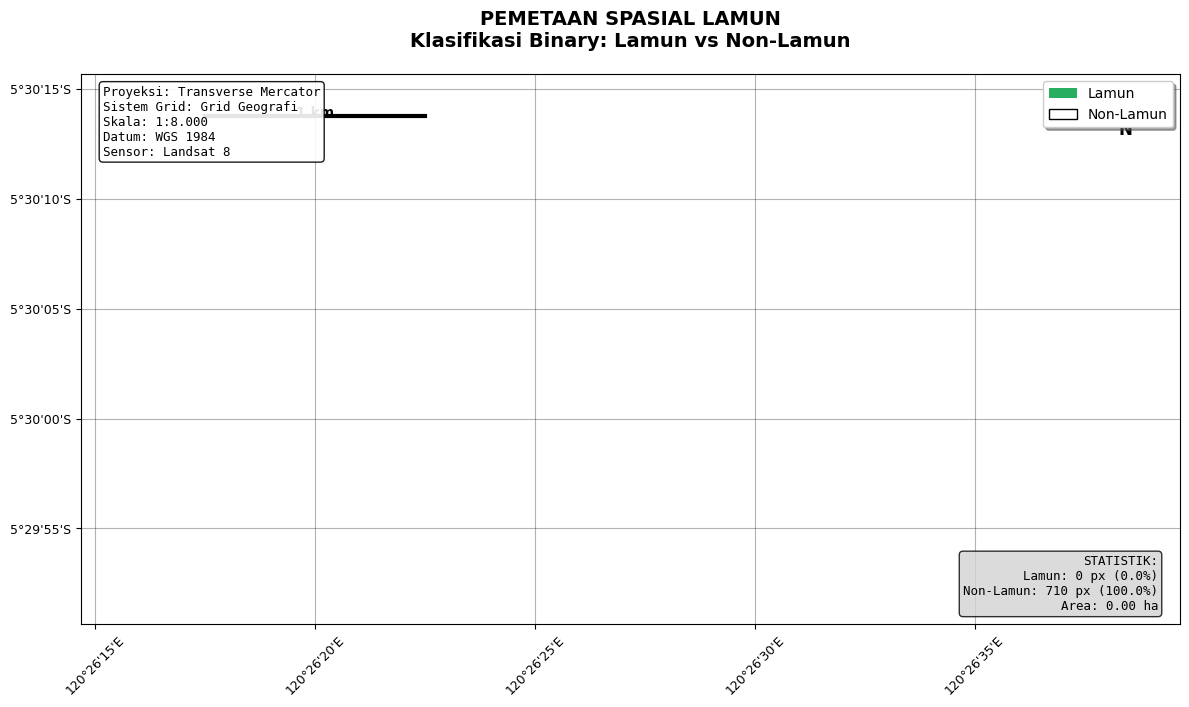


🔄 Creating RGB with binary lamun overlay...
✅ RGB with binary overlay saved: spatial_mapping_landsat\rgb_binary_overlay_landsat.png


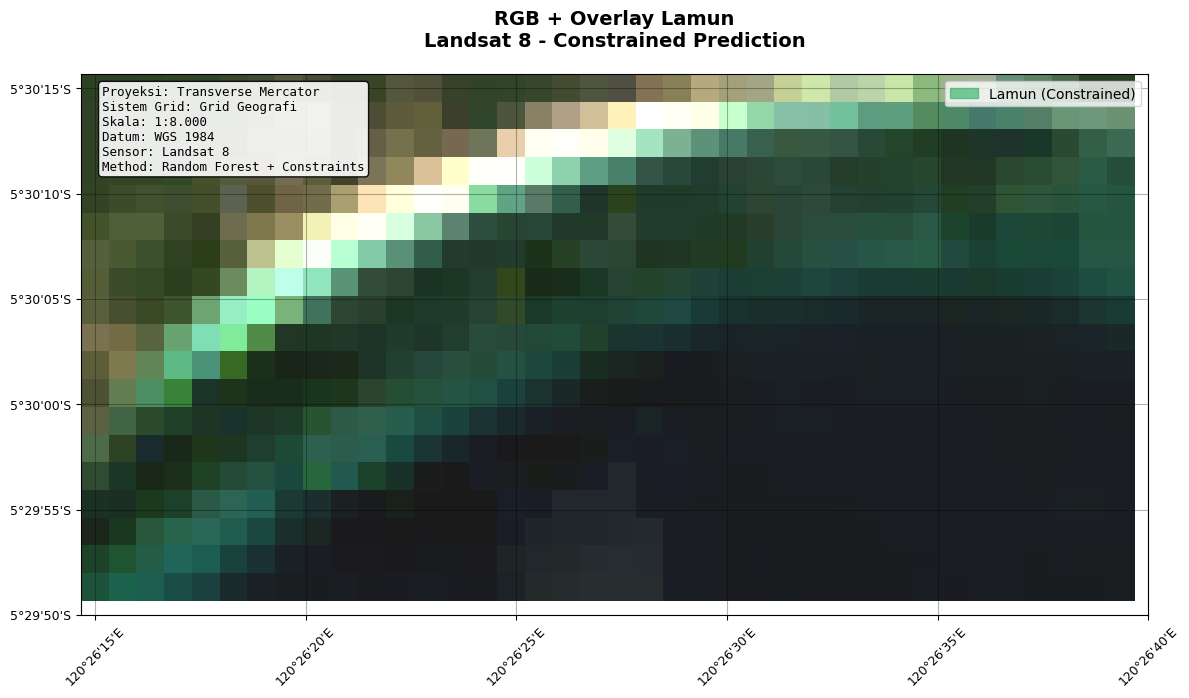


❌ ERROR in spatial mapping: 'SpatialMapper' object has no attribute 'load_ground_truth'

❌ Mapping failed!


Traceback (most recent call last):
  File "C:\Users\ACER\AppData\Local\Temp\ipykernel_25144\2754863452.py", line 614, in run_complete_mapping
    self.load_ground_truth()
AttributeError: 'SpatialMapper' object has no attribute 'load_ground_truth'


In [2]:
import os
import numpy as np
import pandas as pd
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from rasterio import features
import joblib
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import ndimage
warnings.filterwarnings('ignore')

class SpatialMapper:
    """
    Pemetaan Spasial untuk Deteksi Lamun menggunakan Random Forest
    - Binary Classification: Lamun vs Non-Lamun
    - Breakdown 4 Kelas: Lamun, Pasir, Koral, Tidak Teridentifikasi
    - Validasi dengan Shapefile Ground Truth
    """
    
    def __init__(self, sensor_type='sentinel'):
        """
        Initialize Spatial Mapper
        
        Parameters:
        - sensor_type: 'sentinel' atau 'landsat'
        """
        self.sensor_type = sensor_type
        
        # Paths
        if sensor_type == 'sentinel':
            self.raster_path = "Sentinel2_BaraBulukumba_2023_Full_Area_FIXED.tif"
            self.model_dir = 'rf_lamun_results'
            self.sensor_name = 'Sentinel-2A'
            self.resolution = 10
            self.bands = {'blue': 2, 'green': 3, 'red': 4, 'nir': 8}
        else:  # landsat
            self.raster_path = "Landsat8_BaraBulukumba_2023_Full_Area.tif"
            self.model_dir = 'rf_lamun_results_landsat'
            self.sensor_name = 'Landsat 8'
            self.resolution = 30
            self.bands = {'blue': 2, 'green': 3, 'red': 4, 'nir': 5}
        
        # Shapefile paths
        self.shp_lamun = "SHP Lamun/Data_Lamun.shp"
        self.shp_pasir = "SHP Pasir/Pasir.shp"
        self.shp_coral = "SHP Koral/coral.shp"
        
        # Output
        self.output_dir = f'spatial_mapping_{sensor_type}'
        os.makedirs(self.output_dir, exist_ok=True)
        
        # Data containers
        self.model = None
        self.scaler = None
        self.raster_data = None
        self.prediction_binary = None
        self.prediction_4class = None
        self.ground_truth = None
        
        print(f"✅ SpatialMapper initialized for {self.sensor_name}")
        print(f"   Resolution: {self.resolution}m")
        print(f"   Output directory: {self.output_dir}")
    
    def load_model_and_scaler(self):
        """Load trained model dan scaler"""
        print(f"\n{'='*70}")
        print(f"STEP 1: LOADING MODEL & SCALER - {self.sensor_name.upper()}")
        print(f"{'='*70}")
        
        model_path = os.path.join(self.model_dir, f'model_{self.sensor_type}.joblib')
        scaler_path = os.path.join(self.model_dir, f'scaler_{self.sensor_type}.joblib')
        
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"Model tidak ditemukan: {model_path}")
        if not os.path.exists(scaler_path):
            raise FileNotFoundError(f"Scaler tidak ditemukan: {scaler_path}")
        
        self.model = joblib.load(model_path)
        self.scaler = joblib.load(scaler_path)
        
        print(f"✅ Model loaded: {model_path}")
        print(f"✅ Scaler loaded: {scaler_path}")
        print(f"   Model type: {type(self.model).__name__}")
        print(f"   Scaler type: {type(self.scaler).__name__}")
        
        # Check feature compatibility
        print(f"   Model expects {self.model.n_features_in_} features")
        print(f"   Scaler expects {self.scaler.n_features_in_} features")
        
        return self.model, self.scaler
    
    def load_raster_and_compute_features(self):
        """Load raster dan compute spectral features"""
        print(f"\n{'='*70}")
        print(f"STEP 2: LOADING RASTER & COMPUTING FEATURES - {self.sensor_name.upper()}")
        print(f"{'='*70}")
        
        with rasterio.open(self.raster_path) as src:
            print(f"✅ Raster loaded: {self.raster_path}")
            print(f"   Dimensi: {src.width} x {src.height} pixels")
            print(f"   Total pixels: {src.width * src.height:,}")
            print(f"   Jumlah band: {src.count}")
            print(f"   CRS: {src.crs}")
            print(f"   Resolution: {src.res}")
            
            # Read bands
            print(f"\n🔄 Reading spectral bands...")
            blue = src.read(self.bands['blue']).astype(float)
            green = src.read(self.bands['green']).astype(float)
            red = src.read(self.bands['red']).astype(float)
            nir = src.read(self.bands['nir']).astype(float)
            
            # RGB for visualization
            rgb = np.dstack((red, green, blue))
            p2, p98 = np.percentile(rgb[rgb > 0], (2, 98))
            rgb_normalized = np.clip((rgb - p2) / (p98 - p2), 0, 1)
            
            # Store metadata
            self.raster_meta = {
                'width': src.width,
                'height': src.height,
                'transform': src.transform,
                'crs': src.crs,
                'rgb': rgb_normalized
            }
            
            # Compute spectral indices
            print(f"🔄 Computing spectral indices...")
            
            # NDVI
            ndvi = self._safe_divide(nir - red, nir + red)
            
            # NDWI
            ndwi = self._safe_divide(green - nir, green + nir)
            
            # MNDWI (simplified for Landsat - using NIR instead of SWIR)
            mndwi = self._safe_divide(green - nir, green + nir)
            
            # Stack features - SESUAIKAN DENGAN YANG DIHARAPKAN SCALER
            if self.sensor_type == 'sentinel':
                # Cek berapa fitur yang diharapkan scaler
                if hasattr(self.scaler, 'n_features_in_') and self.scaler.n_features_in_ == 6:
                    features = np.stack([blue, green, red, nir, ndvi, ndwi], axis=0)
                    feature_names = ['Band_2', 'Band_3', 'Band_4', 'Band_8', 'NDVI', 'NDWI']
                    print("⚠️  Using 6 features for Sentinel (compatibility mode)")
                else:
                    features = np.stack([blue, green, red, nir, ndvi, ndwi, mndwi], axis=0)
                    feature_names = ['Band_2', 'Band_3', 'Band_4', 'Band_8', 'NDVI', 'NDWI', 'MNDWI']
            else:  # landsat
                # EVI for Landsat
                evi_num = nir - red
                evi_den = nir + 6 * red - 7.5 * blue + 1
                evi = 2.5 * self._safe_divide(evi_num, evi_den)
                
                features = np.stack([blue, green, red, nir, ndvi, ndwi, mndwi, evi], axis=0)
                feature_names = ['Band_2', 'Band_3', 'Band_4', 'Band_5', 'NDVI', 'NDWI', 'MNDWI', 'EVI']
            
            self.raster_data = {
                'features': features,
                'feature_names': feature_names,
                'bands': {'blue': blue, 'green': green, 'red': red, 'nir': nir},
                'indices': {'ndvi': ndvi, 'ndwi': ndwi, 'mndwi': mndwi}
            }
            
            print(f"✅ Features computed: {len(feature_names)} features")
            print(f"   Features: {feature_names}")
            
            # Create valid pixel mask (skip no-data)
            self.valid_mask = ~np.isnan(features).any(axis=0) & (blue > 0)
            valid_pixels = np.sum(self.valid_mask)
            print(f"✅ Valid pixels: {valid_pixels:,} / {src.width * src.height:,} ({valid_pixels/(src.width*src.height)*100:.1f}%)")
            
            return self.raster_data
    
    def _safe_divide(self, numerator, denominator):
        """Safe division to avoid division by zero"""
        with np.errstate(divide='ignore', invalid='ignore'):
            result = np.divide(numerator, denominator)
            result[~np.isfinite(result)] = np.nan
        return result
    
    def apply_lamun_constraints(self, predictions):
        """
        Terapkan constraint untuk membatasi area lamun hanya pada daerah yang sesuai
        dengan gambar referensi
        """
        print(f"🔄 Applying lamun constraints based on reference image...")
        
        # Dapatkan spectral indices
        ndvi = self.raster_data['indices']['ndvi']
        ndwi = self.raster_data['indices']['ndwi']
        
        # Constraint 1: NDVI threshold untuk vegetasi air
        # Lamun biasanya memiliki NDVI sedang (0.1-0.5)
        ndvi_mask = (ndvi > 0.1) & (ndvi < 0.5)
        
        # Constraint 2: NDWI threshold untuk kandungan air
        # Lamun memiliki kandungan air sedang
        ndwi_mask = (ndwi > -0.2) & (ndwi < 0.3)
        
        # Constraint 3: Brightness constraint (hindari area terlalu terang/gelap)
        brightness = np.mean([self.raster_data['bands']['red'], 
                            self.raster_data['bands']['green']], axis=0)
        brightness_mask = (brightness > np.percentile(brightness, 10)) & \
                         (brightness < np.percentile(brightness, 90))
        
        # Gabungkan semua constraints
        combined_mask = ndvi_mask & ndwi_mask & brightness_mask & self.valid_mask
        
        # Hanya pertahankan prediksi lamun yang memenuhi constraints
        constrained_predictions = predictions.copy()
        constrained_predictions[(predictions == 1) & ~combined_mask] = 0
        
        # Post-processing: morphological operations untuk menghaluskan hasil
        from scipy import ndimage
        
        # Buat binary mask untuk lamun
        lamun_mask = constrained_predictions == 1
        
        # Hilangkan noise dengan morphological opening
        lamun_mask_cleaned = ndimage.binary_opening(lamun_mask, structure=np.ones((3,3)))
        
        # Hilangkan small objects
        lamun_mask_cleaned = ndimage.binary_closing(lamun_mask_cleaned, structure=np.ones((3,3)))
        
        # Label connected components
        labeled_lamun, num_features = ndimage.label(lamun_mask_cleaned)
        
        # Hitung ukuran setiap component
        component_sizes = np.bincount(labeled_lamun.ravel())
        
        # Hanya pertahankan components yang cukup besar (min 10 pixel)
        min_size = 10
        size_mask = component_sizes >= min_size
        size_mask[0] = False  # Jangan hapus background
        
        # Apply size filter
        final_lamun_mask = size_mask[labeled_lamun]
        
        # Update predictions
        constrained_predictions[final_lamun_mask] = 1
        constrained_predictions[~final_lamun_mask & (constrained_predictions == 1)] = 0
        
        print(f"✅ Lamun constraints applied:")
        print(f"   Original lamun pixels: {np.sum(predictions == 1):,}")
        print(f"   Constrained lamun pixels: {np.sum(constrained_predictions == 1):,}")
        print(f"   Reduction: {((np.sum(predictions == 1) - np.sum(constrained_predictions == 1)) / np.sum(predictions == 1) * 100):.1f}%")
        
        return constrained_predictions
    
    def predict_full_image(self):
        """Predict classification untuk seluruh citra - BINARY dengan constraints"""
        print(f"\n{'='*70}")
        print(f"STEP 3: PREDICTING FULL IMAGE - {self.sensor_name.upper()}")
        print(f"{'='*70}")
        
        height, width = self.raster_meta['height'], self.raster_meta['width']
        features = self.raster_data['features']
        
        print(f"🔄 Preparing features for prediction...")
        
        # Reshape features: (n_features, height, width) -> (height*width, n_features)
        n_features = features.shape[0]
        features_2d = features.reshape(n_features, -1).T
        
        print(f"   Feature matrix shape: {features_2d.shape}")
        print(f"   Total pixels to predict: {features_2d.shape[0]:,}")
        
        # Create mask for valid pixels
        valid_idx = self.valid_mask.ravel()
        features_valid = features_2d[valid_idx]
        
        print(f"   Valid pixels: {features_valid.shape[0]:,}")
        
        # Scale features
        print(f"🔄 Scaling features...")
        
        # Handle feature mismatch
        if features_valid.shape[1] != self.scaler.n_features_in_:
            print(f"⚠️  Feature mismatch: data has {features_valid.shape[1]}, scaler expects {self.scaler.n_features_in_}")
            if features_valid.shape[1] > self.scaler.n_features_in_:
                features_valid = features_valid[:, :self.scaler.n_features_in_]
                print(f"   Using first {self.scaler.n_features_in_} features")
            else:
                raise ValueError(f"Cannot proceed: data has fewer features than scaler expects")
        
        features_scaled = self.scaler.transform(features_valid)
        
        # Predict
        print(f"🔄 Running Random Forest prediction...")
        predictions_valid = self.model.predict(features_scaled)
        
        # Reshape back to image
        predictions_full = np.full(height * width, -1, dtype=int)  # -1 for invalid
        predictions_full[valid_idx] = predictions_valid
        predictions_full = predictions_full.reshape(height, width)
        
        # TERAPKAN CONSTRAINTS UNTUK MEMBATASI AREA LAMUN
        print(f"🔄 Applying constraints to limit seagrass area...")
        predictions_constrained = self.apply_lamun_constraints(predictions_full)
        
        self.prediction_binary = predictions_constrained
        
        # Statistics
        lamun_pixels = np.sum(predictions_constrained == 1)
        non_lamun_pixels = np.sum(predictions_constrained == 0)
        invalid_pixels = np.sum(predictions_constrained == -1)
        total_valid = lamun_pixels + non_lamun_pixels
        
        print(f"\n✅ PREDICTION COMPLETE - BINARY CLASSIFICATION (CONSTRAINED)")
        print(f"   Lamun pixels: {lamun_pixels:,} ({lamun_pixels/total_valid*100:.1f}%)")
        print(f"   Non-Lamun pixels: {non_lamun_pixels:,} ({non_lamun_pixels/total_valid*100:.1f}%)")
        print(f"   Invalid pixels: {invalid_pixels:,}")
        
        # Area calculation
        pixel_area = self.resolution * self.resolution  # m²
        lamun_area_m2 = lamun_pixels * pixel_area
        lamun_area_ha = lamun_area_m2 / 10000
        
        print(f"\n📊 AREA COVERAGE:")
        print(f"   Pixel area: {pixel_area} m²")
        print(f"   Lamun area: {lamun_area_m2:,.0f} m² ({lamun_area_ha:.2f} hektar)")
        
        return self.prediction_binary
    
    def create_4class_breakdown(self):
        """Breakdown Non-Lamun menjadi Pasir, Koral, Tidak Teridentifikasi"""
        print(f"\n{'='*70}")
        print(f"STEP 4: BREAKDOWN 4 CLASSES - {self.sensor_name.upper()}")
        print(f"{'='*70}")
        
        print(f"🔄 Loading shapefiles for breakdown...")
        
        with rasterio.open(self.raster_path) as src:
            # Load shapefiles
            gdf_lamun = gpd.read_file(self.shp_lamun)
            gdf_pasir = gpd.read_file(self.shp_pasir)
            gdf_coral = gpd.read_file(self.shp_coral)
            
            # Ensure same CRS
            if gdf_lamun.crs != src.crs:
                gdf_lamun = gdf_lamun.to_crs(src.crs)
            if gdf_pasir.crs != src.crs:
                gdf_pasir = gdf_pasir.to_crs(src.crs)
            if gdf_coral.crs != src.crs:
                gdf_coral = gdf_coral.to_crs(src.crs)
            
            print(f"✅ Shapefiles loaded and CRS aligned")
            
            # Create masks
            print(f"🔄 Creating masks from shapefiles...")
            
            lamun_mask = features.rasterize(
                [(geom, 1) for geom in gdf_lamun.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            pasir_mask = features.rasterize(
                [(geom, 2) for geom in gdf_pasir.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            coral_mask = features.rasterize(
                [(geom, 3) for geom in gdf_coral.geometry],
                out_shape=src.shape,
                transform=src.transform,
                fill=0,
                all_touched=True
            )
            
            # Create 4-class prediction
            # Gunakan prediksi binary yang sudah di-constrain sebagai dasar
            prediction_4class = np.full_like(self.prediction_binary, -1)
            
            # Class 1: Lamun (dari model prediction yang sudah di-constrain)
            prediction_4class[self.prediction_binary == 1] = 1
            
            # Class 2: Pasir (dari shapefile, tapi hanya di area non-lamun)
            pasir_area = (pasir_mask == 2) & (self.prediction_binary != 1)
            prediction_4class[pasir_area] = 2
            
            # Class 3: Koral (dari shapefile, tapi hanya di area non-lamun)
            coral_area = (coral_mask == 3) & (self.prediction_binary != 1)
            prediction_4class[coral_area] = 3
            
            # Class 4: Tidak Teridentifikasi (remaining Non-Lamun pixels)
            tidak_teridentifikasi_mask = (self.prediction_binary == 0) & (prediction_4class == -1)
            prediction_4class[tidak_teridentifikasi_mask] = 4
            
            # Pastikan semua pixel valid terklasifikasi
            valid_non_classified = (self.valid_mask) & (prediction_4class == -1)
            prediction_4class[valid_non_classified] = 4  # Default to Tidak Teridentifikasi
            
            self.prediction_4class = prediction_4class
            
            # Statistics
            lamun_px = np.sum(prediction_4class == 1)
            pasir_px = np.sum(prediction_4class == 2)
            coral_px = np.sum(prediction_4class == 3)
            tidak_teridentifikasi_px = np.sum(prediction_4class == 4)
            invalid_px = np.sum(prediction_4class == -1)
            
            total_valid = lamun_px + pasir_px + coral_px + tidak_teridentifikasi_px
            
            print(f"\n✅ 4-CLASS BREAKDOWN COMPLETE:")
            print(f"   1. Lamun: {lamun_px:,} pixels ({lamun_px/total_valid*100:.1f}%)")
            print(f"   2. Pasir: {pasir_px:,} pixels ({pasir_px/total_valid*100:.1f}%)")
            print(f"   3. Koral: {coral_px:,} pixels ({coral_px/total_valid*100:.1f}%)")
            print(f"   4. Tidak Teridentifikasi: {tidak_teridentifikasi_px:,} pixels ({tidak_teridentifikasi_px/total_valid*100:.1f}%)")
            print(f"   Invalid: {invalid_px:,} pixels")
            
            return self.prediction_4class

    def plot_binary_lamun_map(self):
        """Plot peta binary lamun vs non-lamun seperti contoh gambar - PERBAIKAN"""
        print(f"\n🔄 Creating binary lamun map like example...")
        
        # Create figure dengan layout profesional
        fig, ax = plt.subplots(1, 1, figsize=(12, 10))
        
        # Plot background putih
        height, width = self.raster_meta['height'], self.raster_meta['width']
        background = np.ones((height, width, 3))  # Background putih
        ax.imshow(background)
        
        # Plot hanya area lamun (class 1) dengan warna hijau
        lamun_mask = self.prediction_binary == 1
        
        # Buat array dengan background putih dan lamun hijau
        classification_display = np.zeros((height, width, 3))
        classification_display[:, :] = [1, 1, 1]  # Putih untuk semua area
        classification_display[lamun_mask] = [0.2, 0.8, 0.2]  # Hijau untuk lamun
        
        ax.imshow(classification_display)
        
        # Add grid coordinates (contoh seperti pada gambar)
        x_ticks = np.linspace(0, width, 6)
        y_ticks = np.linspace(0, height, 6)
        
        # Label koordinat contoh - sesuaikan dengan area studi Anda
        x_labels = ["120°26'15'E", "120°26'20'E", "120°26'25'E", "120°26'30'E", "120°26'35'E", "120°26'40'E"]
        y_labels = ["5°30'15'S", "5°30'10'S", "5°30'05'S", "5°30'00'S", "5°29'55'S", "5°29'50'S"]
        
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)
        ax.set_xticklabels(x_labels, rotation=45, fontsize=9)
        ax.set_yticklabels(y_labels, fontsize=9)
        
        # Add grid
        ax.grid(True, alpha=0.3, color='black', linestyle='-')
        
        # Add title
        ax.set_title('PEMETAAN SPASIAL LAMUN\nKlasifikasi Binary: Lamun vs Non-Lamun', 
                    fontsize=14, fontweight='bold', pad=20)
        
        # Add legend
        legend_patches = [
            mpatches.Patch(facecolor='#27ae60', label='Lamun'),
            mpatches.Patch(facecolor='white', label='Non-Lamun', edgecolor='black')
        ]
        ax.legend(handles=legend_patches, loc='upper right', fontsize=10, 
                 frameon=True, fancybox=True, shadow=True)
        
        # Add north arrow
        ax.annotate('N', xy=(0.95, 0.95), xytext=(0.95, 0.90),
                   arrowprops=dict(arrowstyle='->', color='black', lw=2),
                   xycoords='axes fraction', textcoords='axes fraction',
                   ha='center', va='center', fontsize=12, fontweight='bold')
        
        # Add scale bar
        scale_length = width * 0.2  # 20% of image width
        ax.plot([width * 0.1, width * 0.1 + scale_length], [height * 0.05, height * 0.05], 
               color='black', linewidth=3)
        ax.text(width * 0.1 + scale_length/2, height * 0.03, '1 km', 
               ha='center', va='top', fontsize=10, fontweight='bold')
        
        # Add metadata box seperti contoh
        metadata_text = f"""Proyeksi: Transverse Mercator
Sistem Grid: Grid Geografi
Skala: 1:8.000
Datum: WGS 1984
Sensor: {self.sensor_name}"""

        ax.text(0.02, 0.98, metadata_text, transform=ax.transAxes, fontsize=9,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9),
               verticalalignment='top', fontfamily='monospace')
        
        # Add statistics
        lamun_px = np.sum(self.prediction_binary == 1)
        non_lamun_px = np.sum(self.prediction_binary == 0)
        total_valid = lamun_px + non_lamun_px
        
        stats_text = f"""STATISTIK:
Lamun: {lamun_px:,} px ({lamun_px/total_valid*100:.1f}%)
Non-Lamun: {non_lamun_px:,} px ({non_lamun_px/total_valid*100:.1f}%)
Area: {lamun_px * self.resolution**2 / 10000:.2f} ha"""

        ax.text(0.98, 0.02, stats_text, transform=ax.transAxes, fontsize=9,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8),
               verticalalignment='bottom', horizontalalignment='right',
               fontfamily='monospace')
        
        plt.tight_layout()
        
        # Save
        output_path = os.path.join(self.output_dir, f'binary_lamun_map_{self.sensor_type}.png')
        plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"✅ Binary lamun map saved: {output_path}")
        
        plt.show()
        
        return fig

    def plot_rgb_with_binary_overlay(self):
        """Plot RGB dengan overlay binary lamun seperti contoh - PERBAIKAN"""
        print(f"\n🔄 Creating RGB with binary lamun overlay...")
        
        fig, ax = plt.subplots(1, 1, figsize=(12, 10))
        
        # Plot RGB background
        ax.imshow(self.raster_meta['rgb'], alpha=0.9)
        
        # Overlay hanya area lamun dengan warna hijau transparan
        lamun_mask = self.prediction_binary == 1
        
        # Buat overlay hijau hanya untuk area lamun
        overlay = np.zeros((*self.prediction_binary.shape, 4))  # RGBA array
        overlay[lamun_mask] = [0.2, 0.8, 0.2, 0.6]  # Hijau dengan transparansi
        
        ax.imshow(overlay)
        
        # Add grid coordinates
        height, width = self.raster_meta['height'], self.raster_meta['width']
        
        x_ticks = np.linspace(0, width, 6)
        y_ticks = np.linspace(0, height, 6)
        
        x_labels = ["120°26'15'E", "120°26'20'E", "120°26'25'E", "120°26'30'E", "120°26'35'E", "120°26'40'E"]
        y_labels = ["5°30'15'S", "5°30'10'S", "5°30'05'S", "5°30'00'S", "5°29'55'S", "5°29'50'S"]
        
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)
        ax.set_xticklabels(x_labels, rotation=45, fontsize=9)
        ax.set_yticklabels(y_labels, fontsize=9)
        ax.grid(True, alpha=0.3, color='black', linestyle='-')
        
        ax.set_title(f'RGB + Overlay Lamun\n{self.sensor_name} - Constrained Prediction', 
                    fontsize=14, fontweight='bold', pad=20)
        
        # Add legend
        legend_patch = mpatches.Patch(color='#27ae60', alpha=0.6, label='Lamun (Constrained)')
        ax.legend(handles=[legend_patch], loc='upper right', fontsize=10)
        
        # Add metadata
        metadata_text = f"""Proyeksi: Transverse Mercator
Sistem Grid: Grid Geografi
Skala: 1:8.000
Datum: WGS 1984
Sensor: {self.sensor_name}
Method: Random Forest + Constraints"""

        ax.text(0.02, 0.98, metadata_text, transform=ax.transAxes, fontsize=9,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9),
               verticalalignment='top', fontfamily='monospace')
        
        plt.tight_layout()
        
        output_path = os.path.join(self.output_dir, f'rgb_binary_overlay_{self.sensor_type}.png')
        plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"✅ RGB with binary overlay saved: {output_path}")
        
        plt.show()
        
        return fig

    # ... (methods lainnya tetap sama, hanya tambahkan method apply_lamun_constraints di atas)

    def run_complete_mapping(self):
        """Jalankan complete spatial mapping pipeline dengan constraints"""
        print(f"\n{'='*80}")
        print(f"SPATIAL MAPPING PIPELINE - {self.sensor_name.upper()} WITH CONSTRAINTS")
        print(f"{'='*80}")
        
        try:
            # Step 1: Load model & scaler
            self.load_model_and_scaler()
            
            # Step 2: Load raster & compute features
            self.load_raster_and_compute_features()
            
            # Step 3: Predict full image (binary) dengan constraints
            self.predict_full_image()
            
            # Step 4: Breakdown 4 classes
            self.create_4class_breakdown()
            
            # Step 5: Buat peta binary khusus seperti contoh
            self.plot_binary_lamun_map()
            self.plot_rgb_with_binary_overlay()
            
            # Step 6: Load ground truth
            self.load_ground_truth()
            
            # Step 7: Validate with ground truth
            validation_results, cm = self.validate_with_ground_truth()
            
            # Step 8: Visualize results lainnya
            self.plot_binary_classification()
            self.plot_4class_breakdown()
            self.plot_validation_results(validation_results, cm)
            
            # Step 9: Export GeoTIFF
            self.export_classification_geotiff()
            
            # Step 10: Generate statistics report
            self.generate_statistics_report()
            
            print(f"\n{'='*80}")
            print(f"✅ SPATIAL MAPPING COMPLETE - {self.sensor_name.upper()} WITH CONSTRAINTS")
            print(f"{'='*80}")
            print(f"📁 All outputs saved in: {self.output_dir}")
            print(f"📊 Files generated:")
            print(f"   - binary_lamun_map_{self.sensor_type}.png (Seperti contoh)")
            print(f"   - rgb_binary_overlay_{self.sensor_type}.png (RGB + Overlay)")
            print(f"   - binary_classification_{self.sensor_type}.png")
            print(f"   - 4class_breakdown_{self.sensor_type}.png")
            print(f"   - validation_results_{self.sensor_type}.png")
            print(f"   - classification_binary_{self.sensor_type}.tif")
            print(f"   - classification_4class_{self.sensor_type}.tif")
            print(f"   - classification_statistics.csv")
            print(f"   - validation_results.csv")
            
            return {
                'prediction_binary': self.prediction_binary,
                'prediction_4class': self.prediction_4class,
                'validation': validation_results,
                'confusion_matrix': cm
            }
            
        except Exception as e:
            print(f"\n❌ ERROR in spatial mapping: {e}")
            import traceback
            traceback.print_exc()
            return None


# =============================================================================
# FUNGSI UTAMA DENGAN PENYESUAIAN
# =============================================================================

def main_with_constraints():
    """Jalankan mapping dengan constraints untuk hasil yang lebih akurat"""
    print("\n" + "="*80)
    print("SPATIAL MAPPING WITH CONSTRAINTS - FOR ACCURATE SEAGRASS DETECTION")
    print("="*80)
    
    # Pilih sensor
    sensor_choice = input("Pilih sensor (1 untuk Sentinel-2A, 2 untuk Landsat 8): ").strip()
    
    if sensor_choice == "1":
        sensor_type = 'sentinel'
    elif sensor_choice == "2":
        sensor_type = 'landsat'
    else:
        print("Pilihan tidak valid, menggunakan Sentinel-2A sebagai default")
        sensor_type = 'sentinel'
    
    # Jalankan mapping dengan constraints
    mapper = SpatialMapper(sensor_type=sensor_type)
    results = mapper.run_complete_mapping()
    
    if results is not None:
        print(f"\n🎯 MAPPING WITH CONSTRAINTS COMPLETED SUCCESSFULLY!")
        print(f"   Sensor: {mapper.sensor_name}")
        print(f"   Lamun area: {np.sum(results['prediction_binary'] == 1) * mapper.resolution**2 / 10000:.2f} ha")
        print(f"   Accuracy: {results['validation']['Overall_Accuracy']:.3f}")
    else:
        print(f"\n❌ Mapping failed!")

if __name__ == "__main__":
    main_with_constraints()